DISTRIBUIÇÃO DE MUNICÍPIOS POR ANO VIGENTE DO VOLUME MÁXIMO NA FINALIDADE ABASTECIMENTO HUMANO


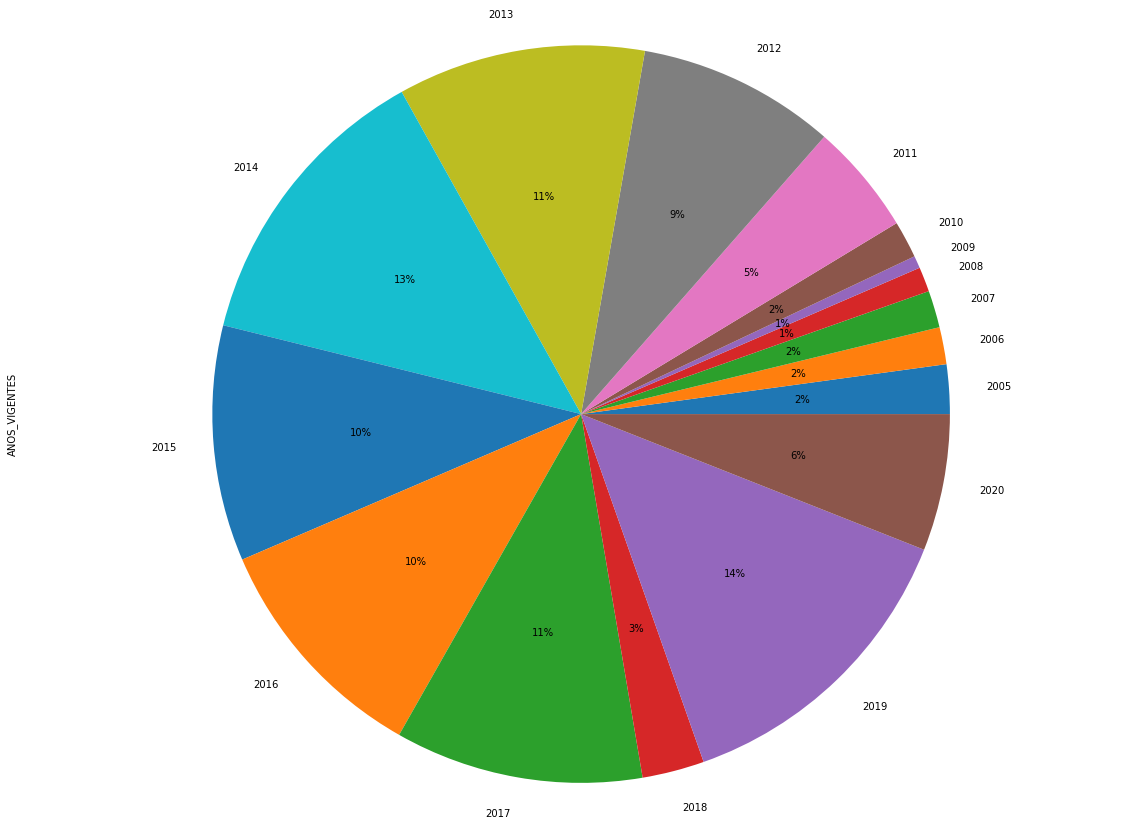

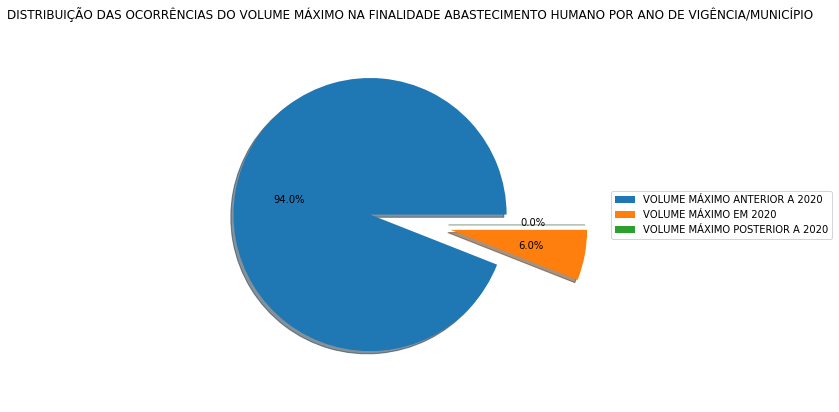

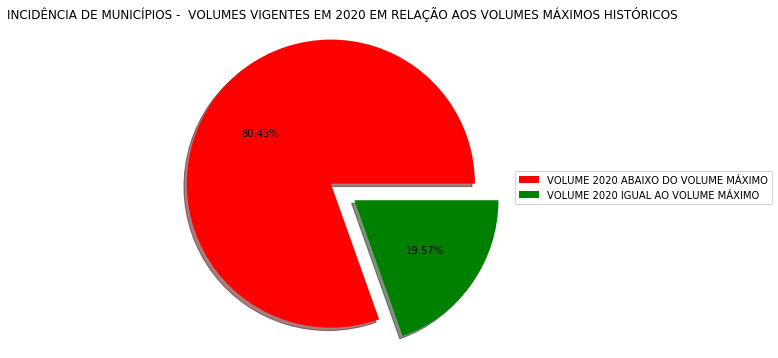

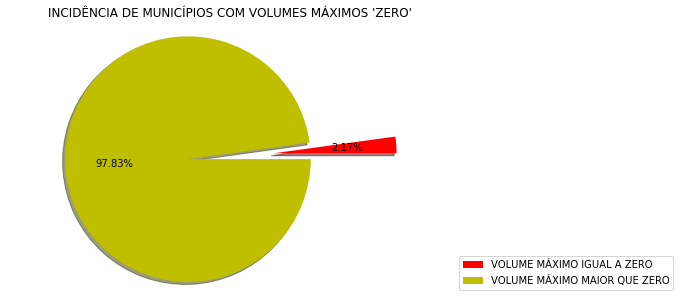

DISTRIBUIÇÃO DA INCIDÊNCIA DE MUNICÍPIOS POR FAIXA PROPORCIONAL DA DIFERENÇA ENTRE O VOLUME MÁXIMO 
E O VOLUME 2020 EM RELAÇÃO AO  VOLUME MÁXIMO HISTÓRICO


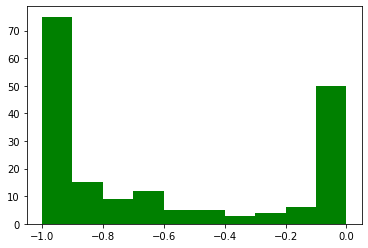

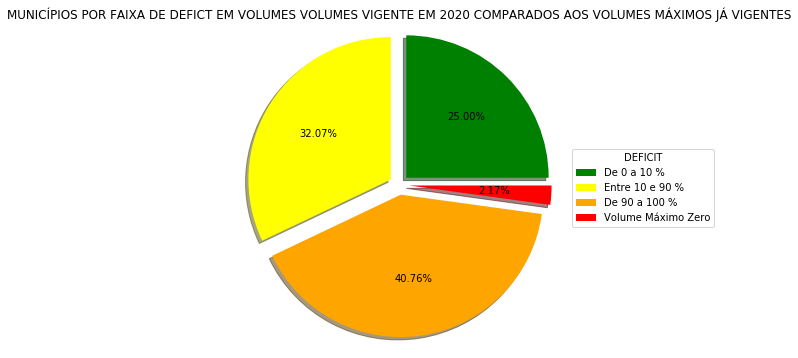

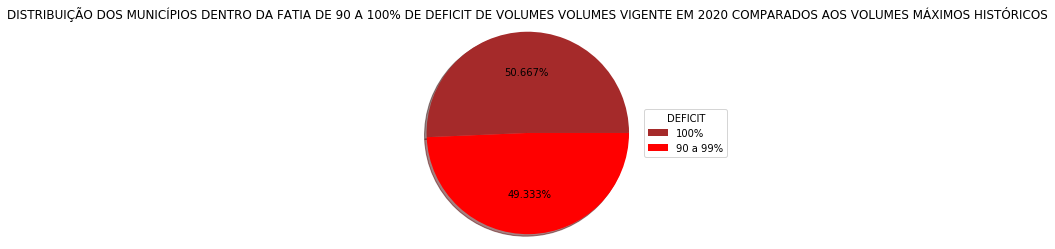

DISTRIBUIÇÃO DO CONSUMO EM LITROS DIÁRIOS POR HABITANTE NO ANO DE VOLUME MÁXIMO HISTÓRICO
OUTLIERS IDENTIFICADOS --> quantidade
32941.4406228367 --> 1
19520.235634285764 --> 1
DISTRIBUIÇÃO DO CONSUMO EM LITROS DIÁRIOS POR HABITANTE NO ANO DE VOLUME MÁXIMO HISTÓRICO SEM OS VALORES ANÔMALOS


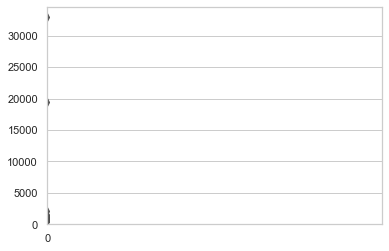

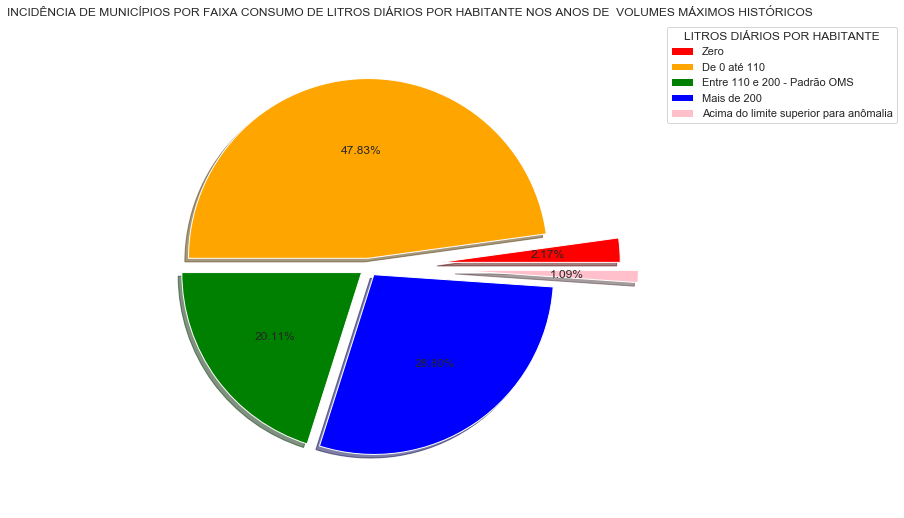

DISTRIBUIÇÃO DO CONSUMO EM LITROS DIÁRIOS POR HABITANTE NO ANO DE VOLUME VIGENTE EM 2020
DISTRIBUIÇÃO DO CONSUMO DIÁRIO POR HABITANTE NOS MUNICÍPIOS
OUTLIERS IDENTIFICADOS --> quantidade
1849.6726615083692 --> 1
928.8381348841292 --> 1
1195.674256215232 --> 1
DISTRIBUIÇÃO DO CONSUMO EM LITROS DIÁRIOS POR HABITANTE EM ANO 2020 SEM OS VALORES ANÔMALOS


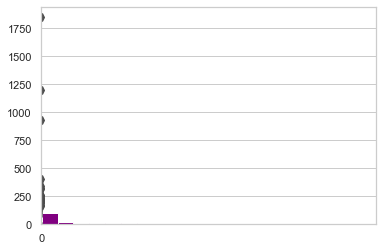

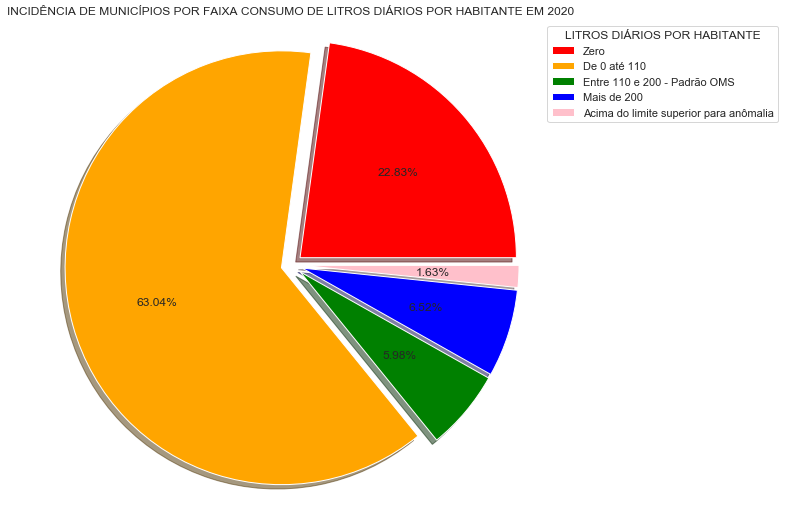

DISTRIBUIÇÃO DE MUNICÍPIOS POR ANO VIGENTE DO VOLUME MÁXIMO NA FINALIDADE OUTROS USOS


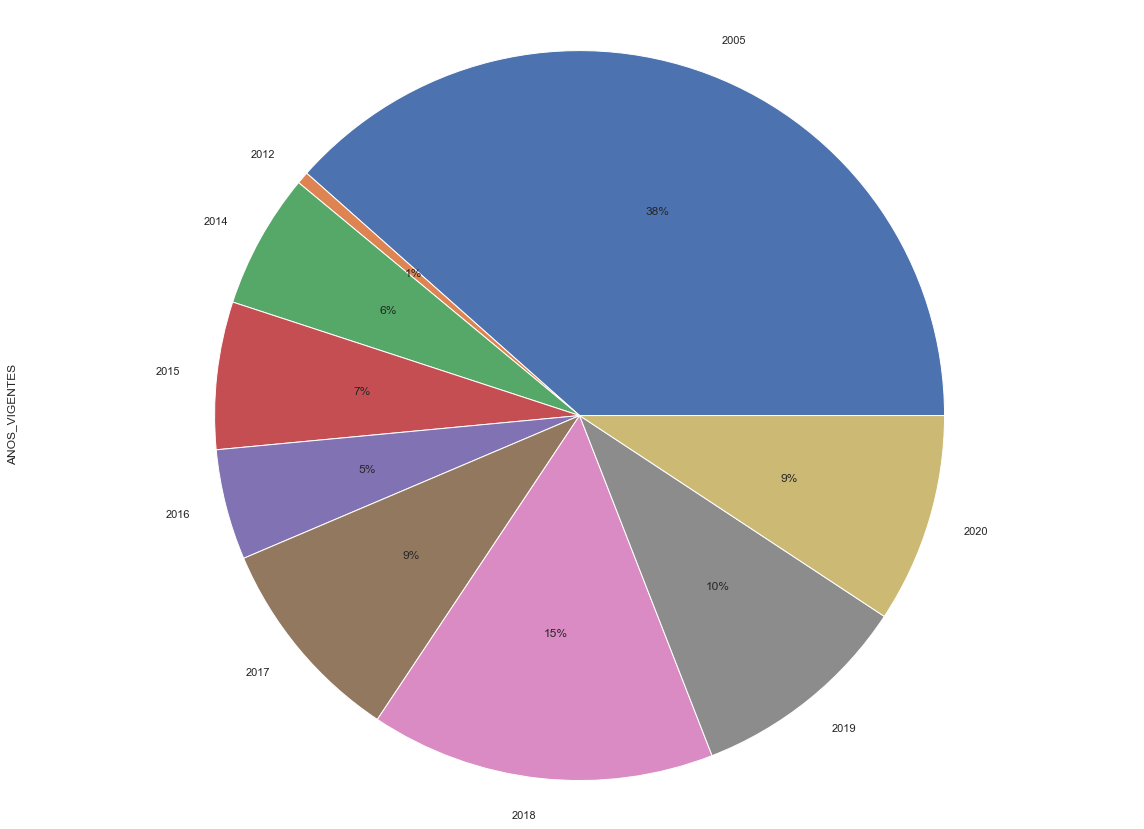

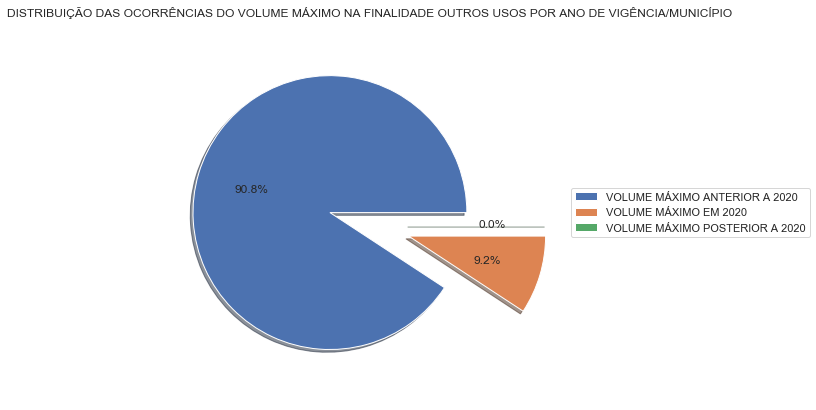

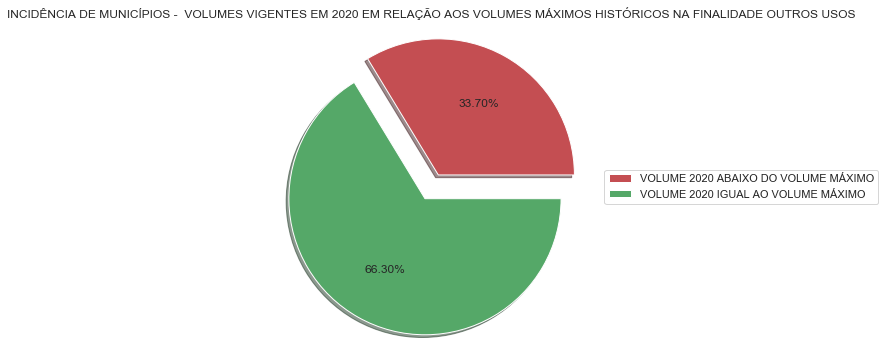

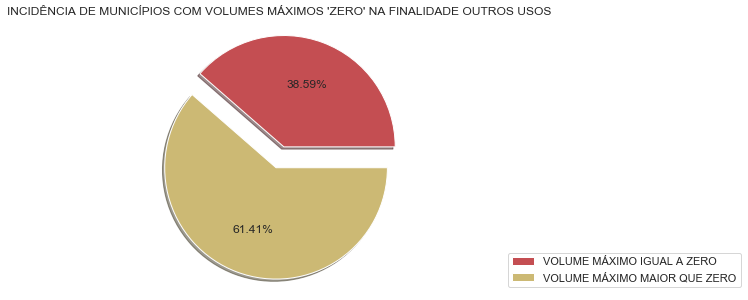

DISTRIBUIÇÃO DA INCIDÊNCIA DE MUNICÍPIOS POR FAIXA PROPORCIONAL DA DIFERENÇA ENTRE O VOLUME MÁXIMO 
E O VOLUME 2020 EM RELAÇÃO AO  VOLUME MÁXIMO HISTÓRICO NA FINALIDADE OUTROS USOS


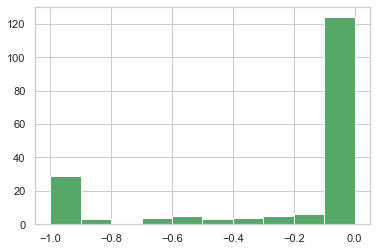

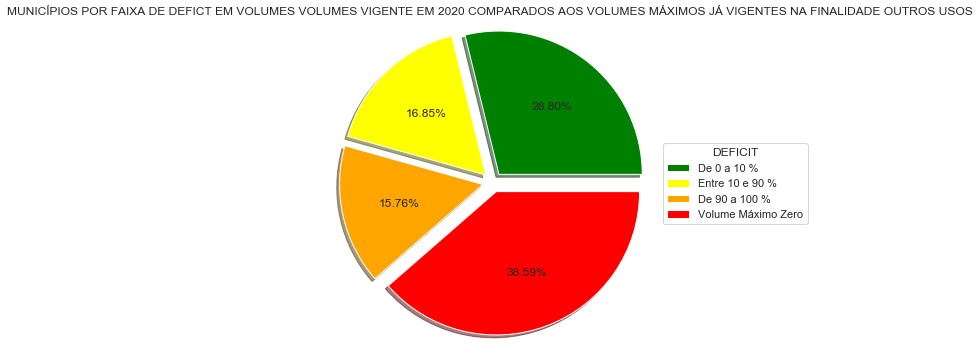

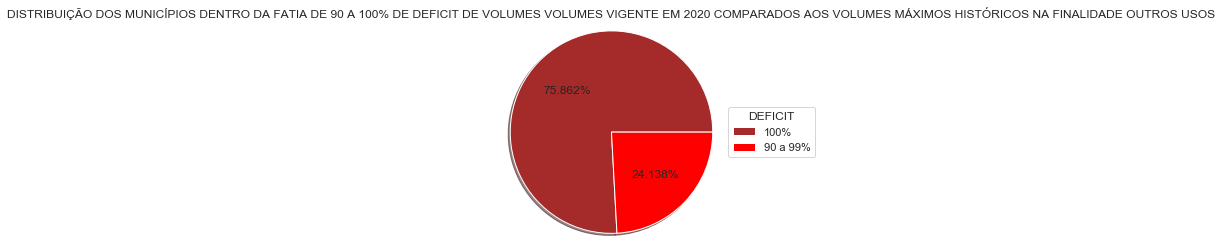

DISTRIBUIÇÃO DE MUNICÍPIOS POR ANO VIGENTE DO VOLUME MÁXIMO NA FINALIDADE INDUSTRIAL   


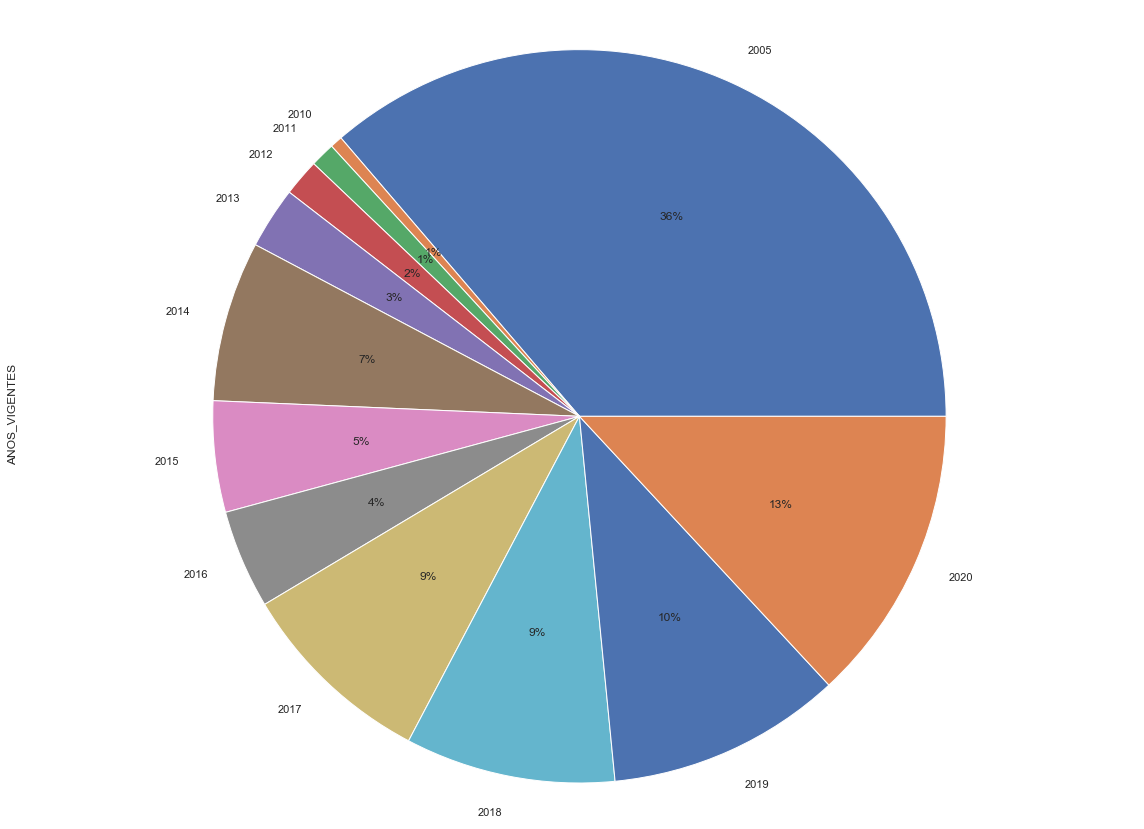

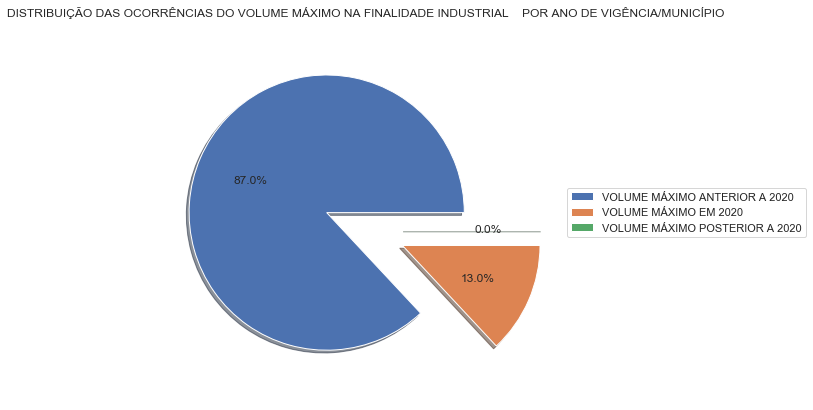

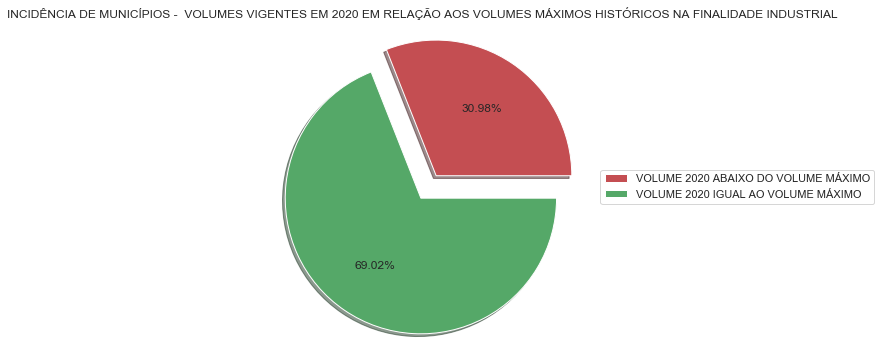

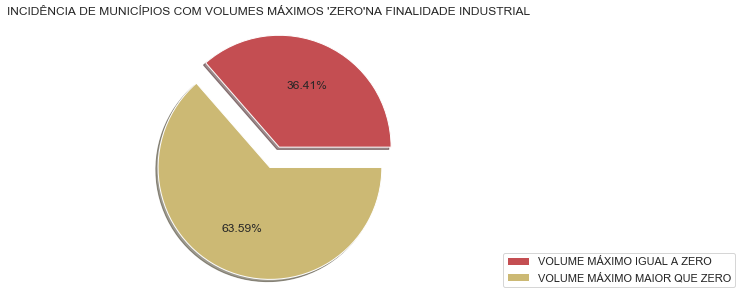

DISTRIBUIÇÃO DA INCIDÊNCIA DE MUNICÍPIOS POR FAIXA PROPORCIONAL DA DIFERENÇA ENTRE O VOLUME MÁXIMO 
E O VOLUME 2020 EM RELAÇÃO AO  VOLUME MÁXIMO HISTÓRICO NA FINALIDADE INDUSTRIAL   


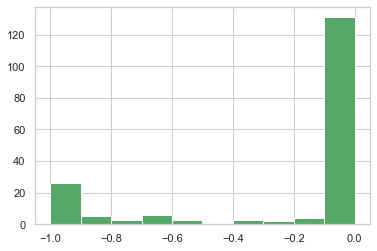

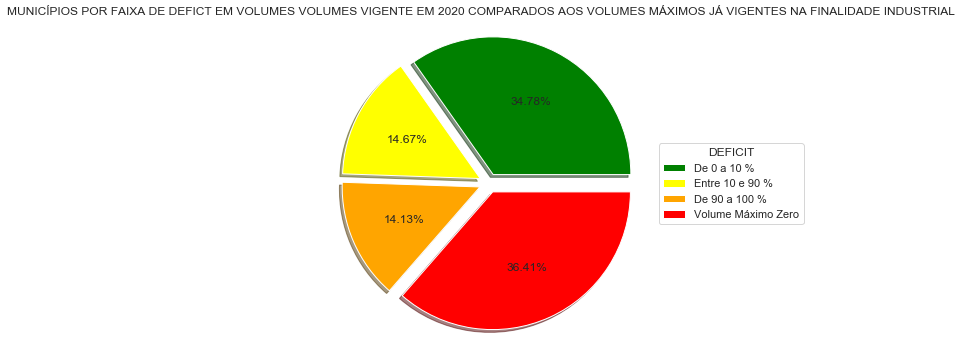

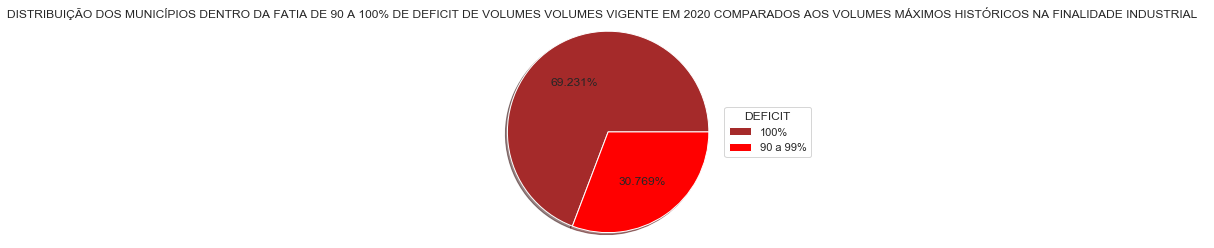

DISTRIBUIÇÃO DE MUNICÍPIOS POR ANO VIGENTE DO VOLUME MÁXIMO NA FINALIDADE AQUICULTURA


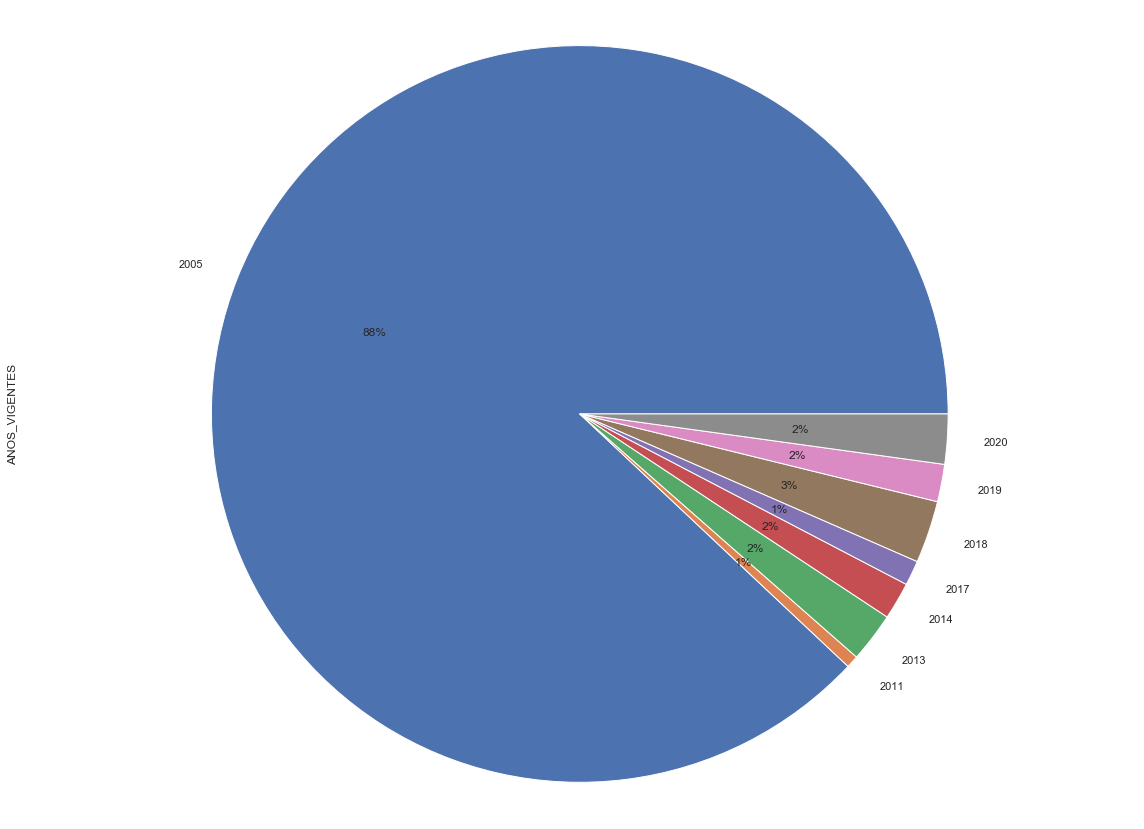

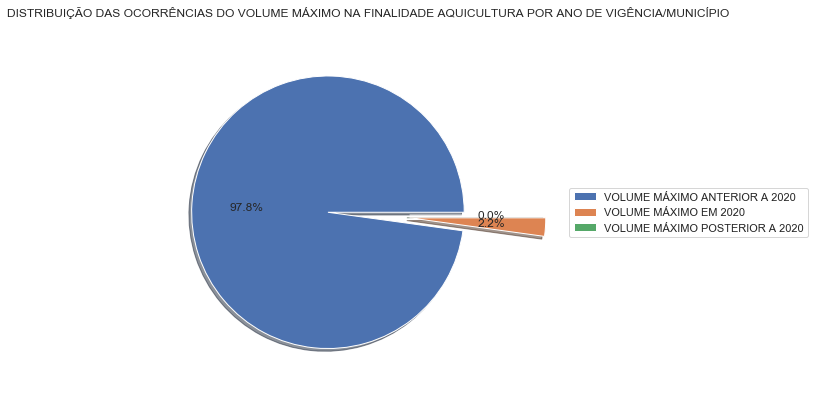

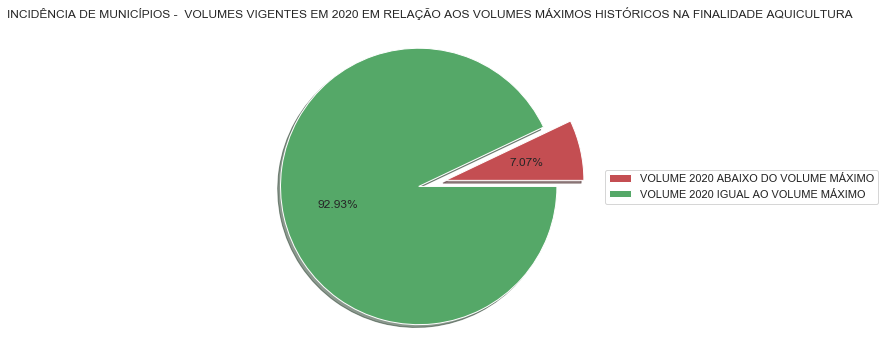

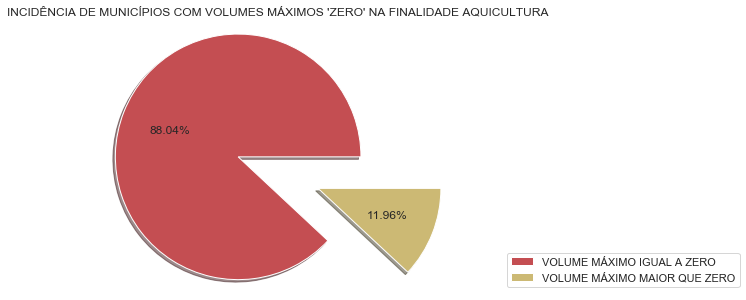

DISTRIBUIÇÃO DA INCIDÊNCIA DE MUNICÍPIOS POR FAIXA PROPORCIONAL DA DIFERENÇA ENTRE O VOLUME MÁXIMO 
E O VOLUME 2020 EM RELAÇÃO AO  VOLUME MÁXIMO HISTÓRICO NA FINALIDADE AQUICULTURA


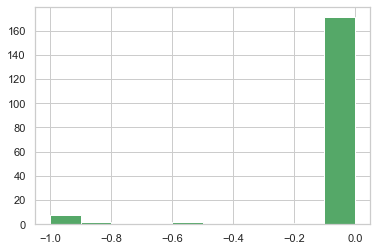

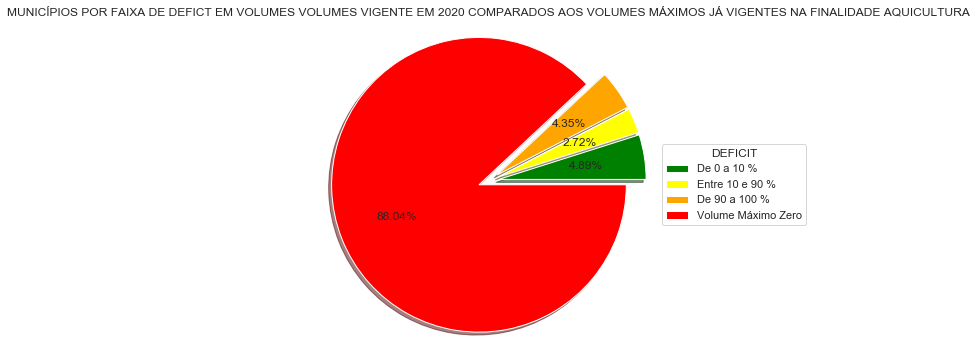

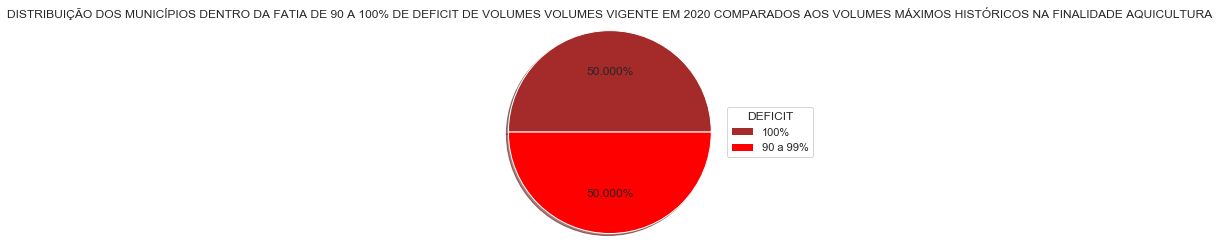

DISTRIBUIÇÃO DE MUNICÍPIOS POR ANO VIGENTE DO VOLUME MÁXIMO NA FINALIDADE SERVIÇO E COMÉRCIO


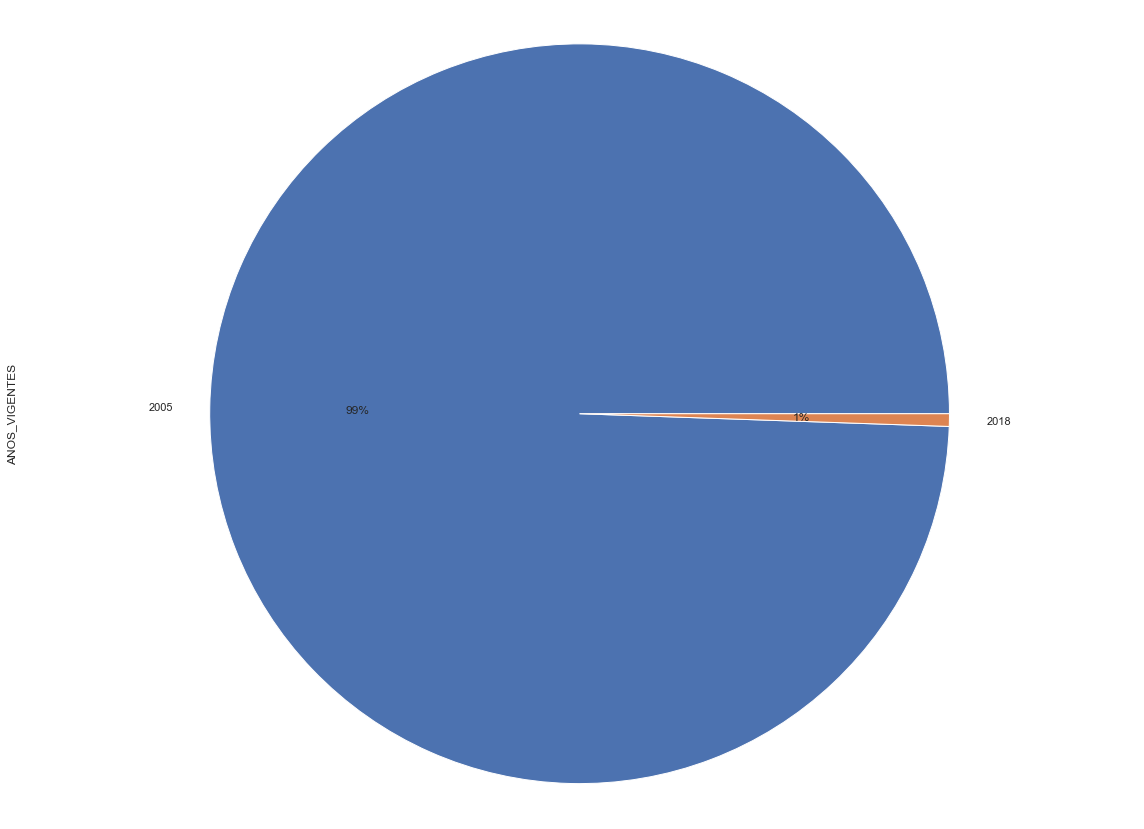

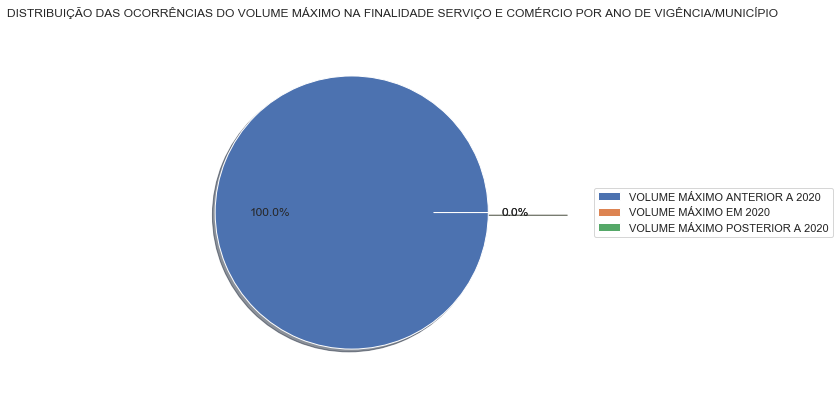

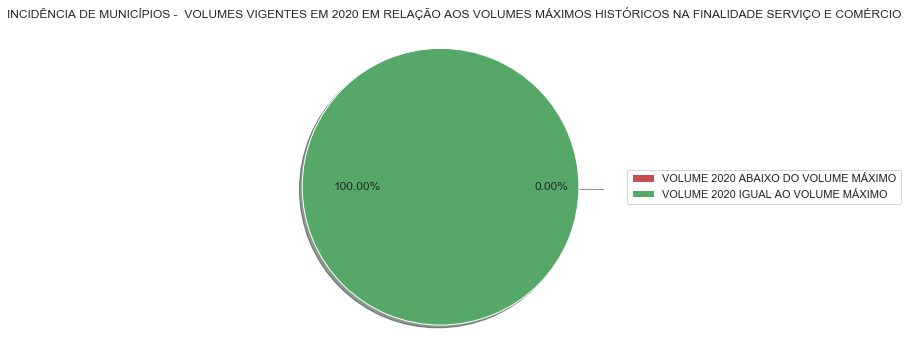

DISTRIBUIÇÃO DA INCIDÊNCIA DE MUNICÍPIOS POR FAIXA PROPORCIONAL DA DIFERENÇA ENTRE O VOLUME MÁXIMO 
E O VOLUME 2020 EM RELAÇÃO AO  VOLUME MÁXIMO HISTÓRICO NA FINALIDADE SERVIÇO E COMÉRCIO


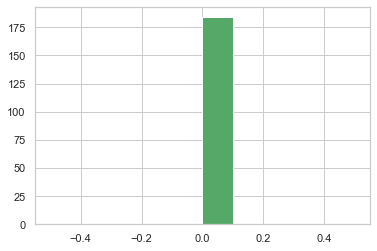

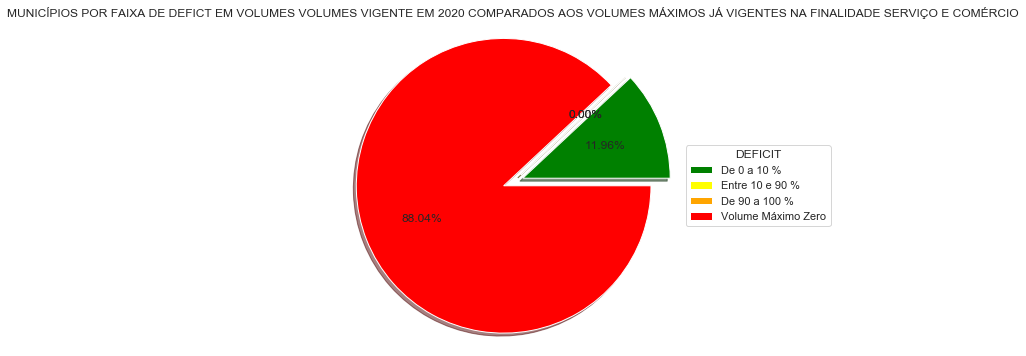

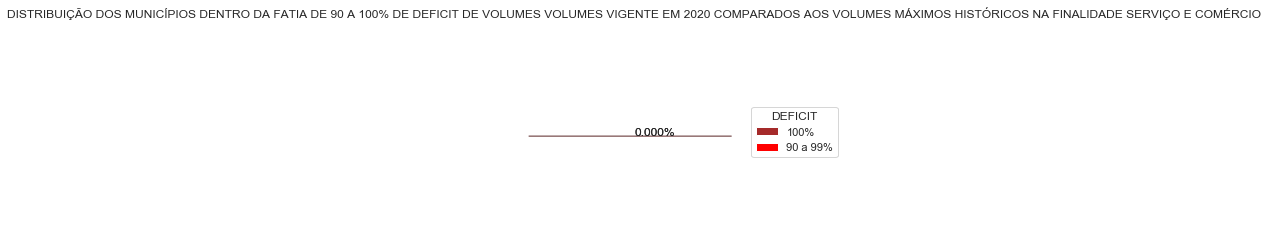

DISTRIBUIÇÃO DE MUNICÍPIOS POR ANO VIGENTE DO VOLUME MÁXIMO NA FINALIDADE IRRIGAÇÃO


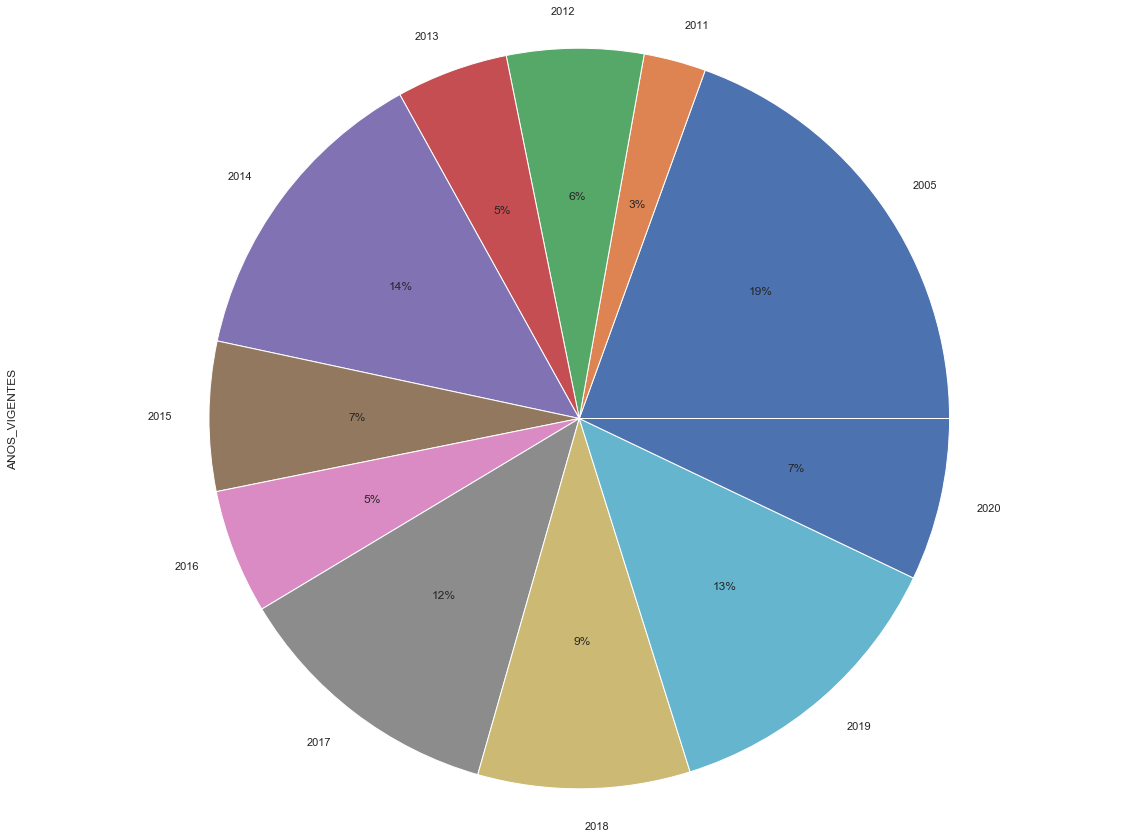

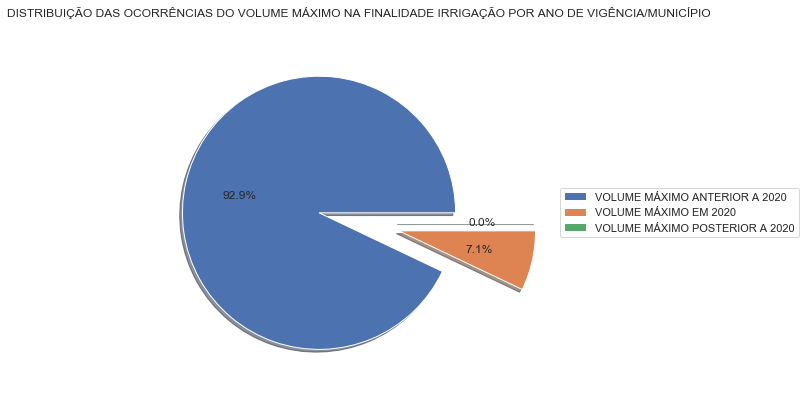

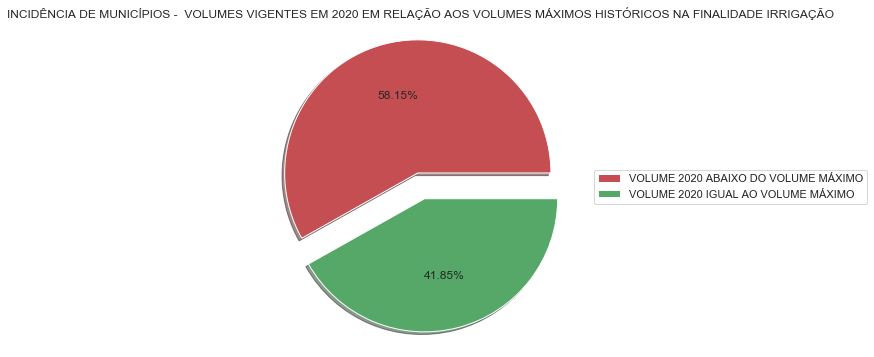

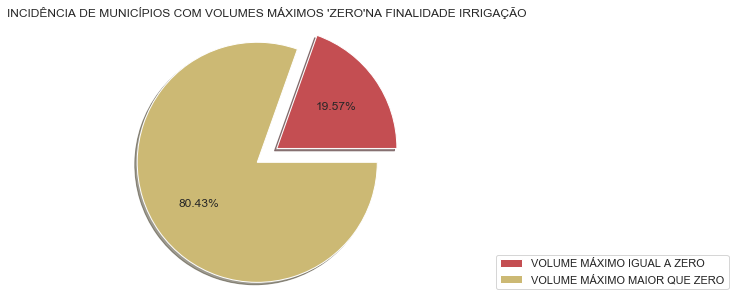

DISTRIBUIÇÃO DA INCIDÊNCIA DE MUNICÍPIOS POR FAIXA PROPORCIONAL DA DIFERENÇA ENTRE O VOLUME MÁXIMO 
E O VOLUME 2020 EM RELAÇÃO AO  VOLUME MÁXIMO HISTÓRICO NA FINALIDADE IRRIGAÇÃO


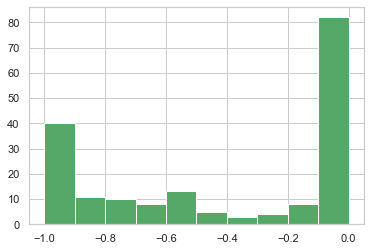

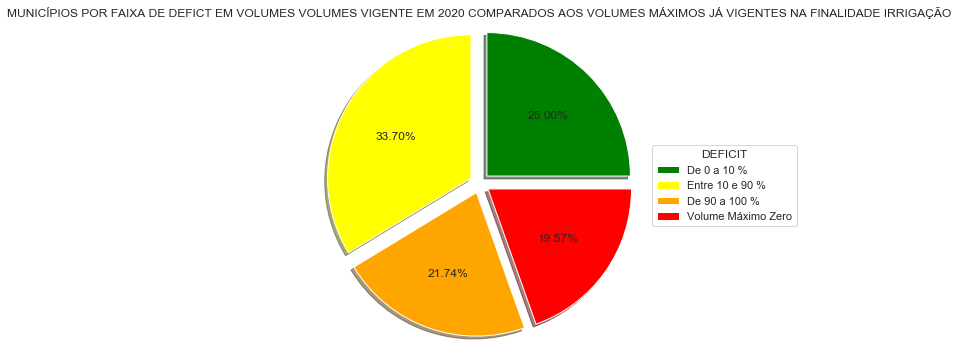

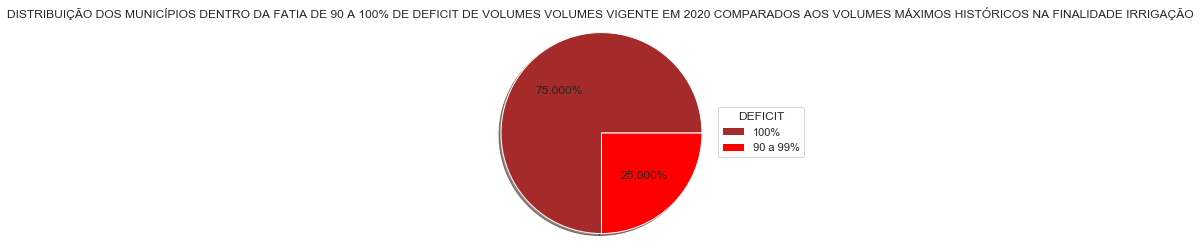

DISTRIBUIÇÃO DE MUNICÍPIOS POR ANO VIGENTE DO VOLUME MÁXIMO NA FINALIDADE DESSEDENTAÇÃO ANIMAL


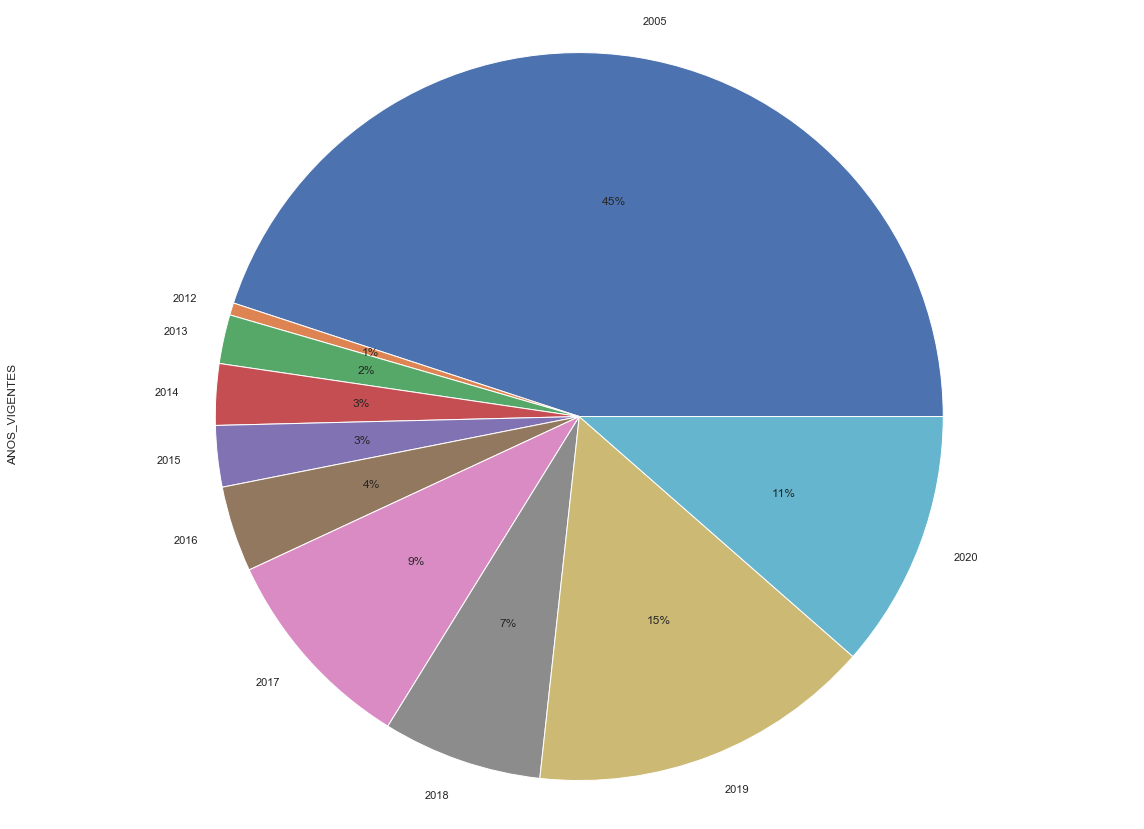

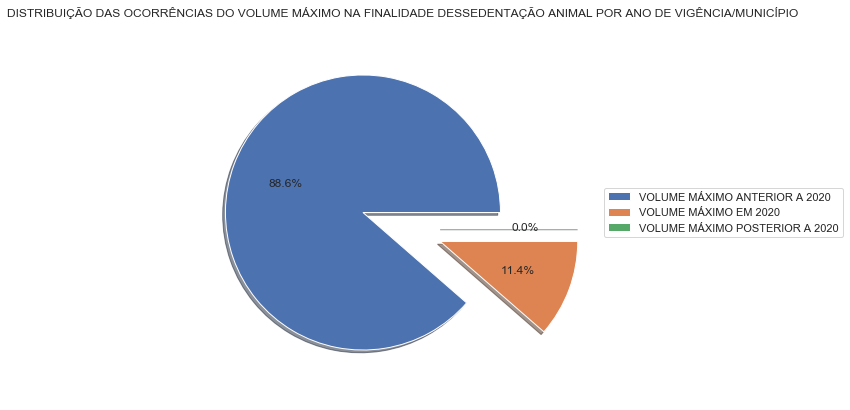

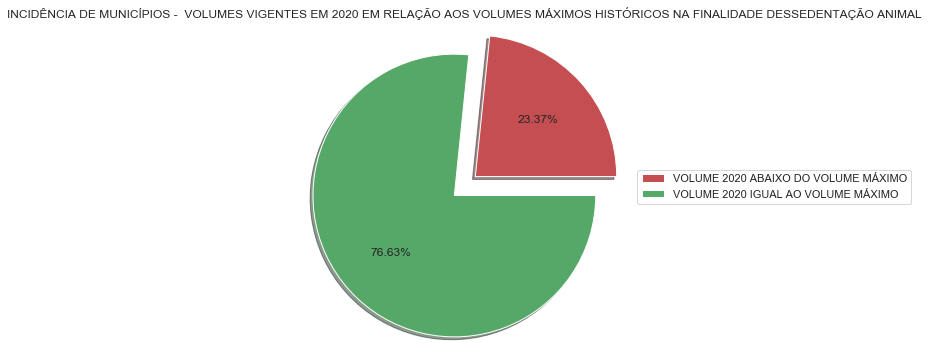

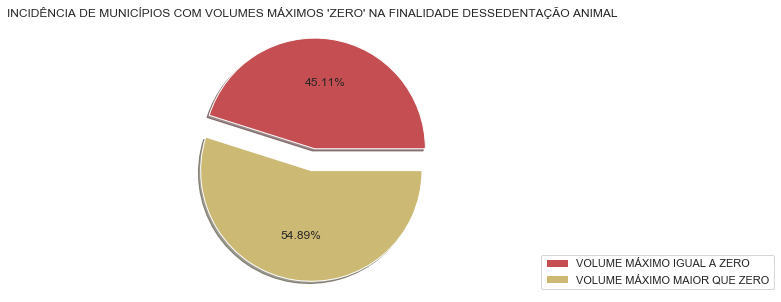

DISTRIBUIÇÃO DA INCIDÊNCIA DE MUNICÍPIOS POR FAIXA PROPORCIONAL DA DIFERENÇA ENTRE O VOLUME MÁXIMO 
E O VOLUME 2020 EM RELAÇÃO AO  VOLUME MÁXIMO HISTÓRICO NA FINALIDADE DESSEDENTAÇÃO ANIMAL


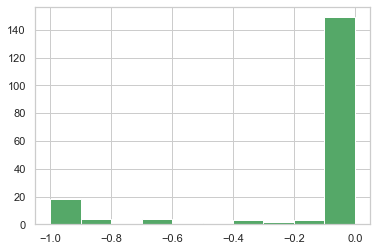

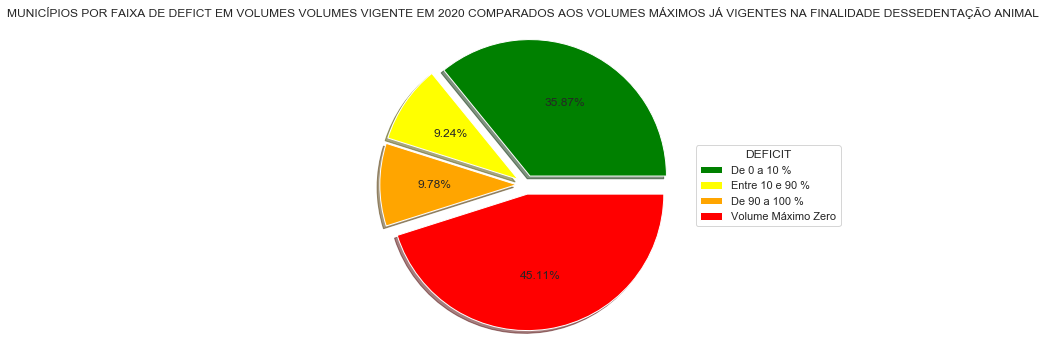

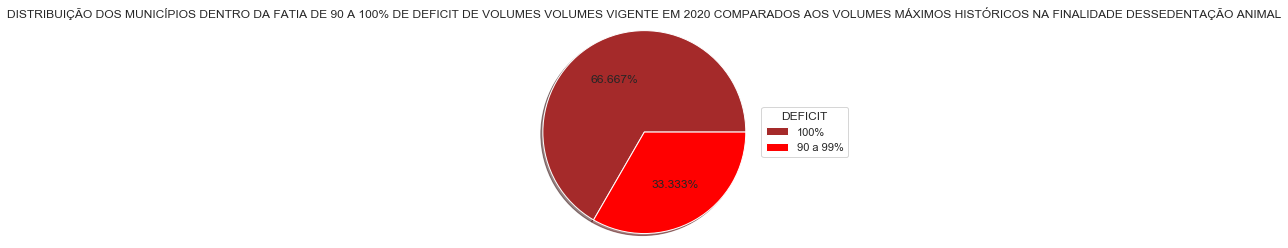

DISTRIBUIÇÃO DA INCIDÊNCIA DE MUNICÍPIOS POR DENSIDADE DE VOLUME EM RELAÇÃO A ÁREA DE IMÓVEIS RURAIS
DISTRIBUIÇÃO DA INCIDÊNCIA DE MUNICÍPIOS POR DENSIDADE DE VOLUME MÁXIMO EM RELAÇÃO A ÁREA DE IMÓVEIS RURAIS
DISTRIBUIÇÃO DA INCIDÊNCIA DE MUNICÍPIOS POR  ÁREA DE IMÓVEIS RURAIS
DISTRIBUIÇÃO DA INCIDÊNCIA DE MUNICÍPIOS POR DENSIDADE DE VOLUME 2020 EM RELAÇÃO A ÁREA DE IMÓVEIS RURAIS NA AQUICULTURA
DISTRIBUIÇÃO DA INCIDÊNCIA DE MUNICÍPIOS POR DENSIDADE DE VOLUME MÁXIMO EM RELAÇÃO A ÁREA DE IMÓVEIS RURAIS NA AQUICULTURA
DISTRIBUIÇÃO DA INCIDÊNCIA DE MUNICÍPIOS POR  ÁREA DE IMÓVEIS RURAIS NA AQUICULTURA


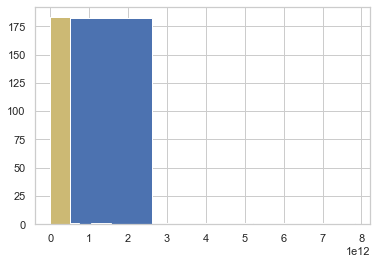

In [1]:
################# zero

#INSTALANDO PACOTES, SE AUSENTES, COM ‘pip’
!pip install dtreeviz
!pip install delayed
!pip install graphviz
!pip install imblearn
!pip install scikit-plot

#IMPORTANDO AS BIBLIOTECAS
import datetime
import glob
import graphviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import plotly.express as px
import pydot
import re
import scikitplot as skplt
import seaborn as sns
import sklearn
import os, sys
from dtreeviz.trees import *
from graphviz import Source
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from IPython.display import SVG,display
from ipywidgets import interactive
from mlxtend.plotting import plot_decision_regions
from openpyxl import load_workbook
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn import svm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.tree import plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split#for decision tree object
from unicodedata import normalize

###################### 01

#CARREGANDO DATASET 
direito_de_uso_original=pd.read_excel("exportacao_cnarh40_CE__lgpd.xlsx")

#CRIANDO CÓPIA DO DF PRESERVANDO O ORIGINAL
direito_de_uso=direito_de_uso_original.copy()

#EXCLUINDO AS LINHAS SELECIONADAS  
direito_de_uso.drop(direito_de_uso.loc[direito_de_uso['FIN_TFN_DS'].isnull()].index, inplace=True) # Finalidade de uso ausente
direito_de_uso.drop(direito_de_uso.loc[direito_de_uso['OUT_DT_OUTORGAFINAL'].isnull()].index, inplace=True) # Data final ausente
direito_de_uso.drop(direito_de_uso.loc[direito_de_uso['OUT_DT_OUTORGAINICIAL'].isnull()].index, inplace=True) # Data inical ausente
direito_de_uso.drop(direito_de_uso.loc[direito_de_uso['INT_QT_VOLUMEANUAL'].isnull()].index, inplace=True) # Data inical ausente
direito_de_uso.drop(direito_de_uso.loc[direito_de_uso['INT_QT_VOLUMEANUAL'] == 0].index, inplace=True)# Volume anual zero, pode ser apenas uso não consuntivo
direito_de_uso.drop(direito_de_uso.loc[direito_de_uso['INT_TIN_DS'] != 'Captação'].index, inplace=True)
direito_de_uso.drop(direito_de_uso.loc[direito_de_uso['OUT_TP_OUTORGA']!= 'Direito de Uso'].index, inplace=True)
direito_de_uso.drop(direito_de_uso.loc[direito_de_uso['OUT_TP_SITUACAOOUTORGA']!= 'Outorgado'].index, inplace=True)
direito_de_uso.drop(direito_de_uso.loc[direito_de_uso['INT_TSI_DS']!= 'Operação'].index, inplace=True)

#VERIFICAR A PRESENÇA DE REGISTROS  REPETIDOS NO DF DE TRABALHO
# verificar antes de excluir colunas para evitar exclusão de coincidentes
repetidos = direito_de_uso[direito_de_uso.duplicated()]

#EXCLUINDO  OS REGISTROS  REPETIDOS E DEIXANDO UM EXEMPLAR DOS REGISTRO DE CADA GRUPO DE CLONES
if (len(repetidos))>0:
    direito_de_uso.drop_duplicates(inplace=True)
    
# SIMPLIFICANDO OS CAMPOS DA COLUNA COM MUNICÍPIOS
municipios_direito_de_uso = direito_de_uso['ING_NM_MUNICIPIO']
municipios_direito_de_uso = municipios_direito_de_uso.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')#Removendo caracteres especiais (acentos, cedilhas,etc)
direito_de_uso.insert(0,'ING_NM_MUNICIPIO_clean', municipios_direito_de_uso)#Inserindo uma nova coluna na posição “1” 
    
#REMOVENDO COLUNAS QUE NÃO HÁ INTERESSE
conj_colunas_direito_de_uso=set(direito_de_uso.columns.values.tolist())#Criando uma lista com os nomes das colunas
conj_colunas_direito_de_uso_mantidas = {'INT_TSU_DS', 'INT_NU_LATITUDE', 'INT_NU_LONGITUDE', 'ING_NU_IBGEMUNICIPIO', 'ING_NM_MUNICIPIO_clean', 'OUT_DT_OUTORGAFINAL', 'OUT_DT_OUTORGAINICIAL', 'INT_QT_VOLUMEANUAL', 'FIN_TFN_DS'}# Conjunto de colunas que permanecerão
conj_colunas_remover = conj_colunas_direito_de_uso - conj_colunas_direito_de_uso_mantidas#Colunas a remover

#REMOVER COLUNAS SELECIONADAS
direito_de_uso = direito_de_uso.drop(columns=conj_colunas_remover)# Removendo as colunas 

#AGRUPANDO AS FINALIDADES DE USO CONFORME CATEGORIAS ADOTADAS NO CE
def finalidade_de_uso(item):
    if 'Abastecimento Público' in item or 'Consumo Humano' in item or 'Mineração - Extração de AreiaCascalho em Leito de Rio' in item or 'Mineração - Outros Processos Extrativos' in item or 'Outras' in item or 'Serviços' in item:
        return item.replace('Abastecimento Público','Abastecimento Humano').replace('Consumo Humano','Abastecimento Humano').replace('Mineração - Extração de AreiaCascalho em Leito de Rio','Mineração').replace('Mineração - Outros Processos Extrativos','Mineração').replace('Outras', 'Outros usos').replace('Serviços', 'Serviço e Comércio')
    else:
         return item
FINALIDADE_DE_USO = direito_de_uso.FIN_TFN_DS.apply(finalidade_de_uso)#Criando uma série, aplicando a função en todas as linhas

#SUBSTITUINDO PELA  COLUNA FINALIDADE AJUSTADAS
lista_FINALIDADE_DE_USO=list(FINALIDADE_DE_USO)#Criando uma lista com a série
direito_de_uso.insert(9,'FINALIDADE_DE_USO',lista_FINALIDADE_DE_USO,True)#Inserindo uma nova coluna

#RENOMEAR DEMAIS COLUNAS
direito_de_uso = direito_de_uso.rename(columns={'INT_TSU_DS':'TIPO_MANANCIAL','ING_NU_IBGEMUNICIPIO':'IBGE_MUNICIPIO','ING_NM_MUNICIPIO_clean':'MUNICIPIO','OUT_DT_OUTORGAFINAL': 'DATA_FINAL_OUTORGA','OUT_DT_OUTORGAINICIAL':'DATA_INICIAL_OUTORGA','INT_QT_VOLUMEANUAL':'VOLUME_ANUAL'})

#ALTERANDO DADOS NAS DATAS

#SEPARAR
def anos(item):
    if item in item:
        return item[6:10]
    else:
         return item
anof = direito_de_uso.DATA_FINAL_OUTORGA.apply(anos)#Criando uma série, aplicando a função en todas as linhas
anoi = direito_de_uso.DATA_INICIAL_OUTORGA.apply(anos)#Criando uma série, aplicando a função en todas as linhas

#INSERINDO NOVAS COLUNAS COM ANO INICIAL E FINAL
lista_anof=list(anof)#Criando uma lista com a série
direito_de_uso.insert(5,'ANO_FINAL',lista_anof,True)#Inserindo uma nova coluna
lista_anoi=list(anoi)#Criando uma lista com a série
direito_de_uso.insert(5,'ANO_INICIAL',lista_anoi,True)#Inserindo uma nova coluna

#ALTERANDO DADOS NAS COORDENADAS

#exluindo '#' DAS COORDENADAS
def valorcoord(item):
    if '#' in item:
        return item.replace('#','')
    else:
         return item
latitude = direito_de_uso.INT_NU_LATITUDE.apply(valorcoord)#Criando uma série, aplicando a função en todas as linhas
longitude = direito_de_uso.INT_NU_LONGITUDE.apply(valorcoord)#Criando uma série, aplicando a função en todas as linhas

#SUBSTITUINDO PELA  COLUNA FINALIDADE AJUSTADAS

lista_latitude=list(latitude)#Criando uma lista com a série
direito_de_uso.insert(3,'LATITUDE',lista_latitude,True)#Inserindo uma nova coluna

lista_longitude=list(longitude)#Criando uma lista com a série
direito_de_uso.insert(3,'LONGITUDE',lista_longitude,True)#Inserindo uma nova coluna

#REMOVENDO COLUNAS JÁ AJUSTADAS
direito_de_uso = direito_de_uso.drop(columns=['FIN_TFN_DS','INT_NU_LATITUDE', 'INT_NU_LONGITUDE', 'DATA_FINAL_OUTORGA', 'DATA_INICIAL_OUTORGA'], )

#REDUZINDO O CONSUMO DE MEMÓRIA COM ALTERAÇÃO PARA DO TIPO DA COLUNA PARA 'category'
direito_de_uso.TIPO_MANANCIAL = direito_de_uso.TIPO_MANANCIAL.astype('category')
direito_de_uso.FINALIDADE_DE_USO = direito_de_uso.FINALIDADE_DE_USO.astype('category')

#ALTERAÇÃO PARA DO TIPO DA COLUNA PARA DATA
direito_de_uso.ANO_FINAL = direito_de_uso.ANO_FINAL.astype('int32')
direito_de_uso.ANO_INICIAL = direito_de_uso.ANO_INICIAL.astype('int32')
direito_de_uso.IBGE_MUNICIPIO = direito_de_uso.IBGE_MUNICIPIO.astype('int32')

#EXCLUIR LINHAS COM DATA FINAL
ano_atual= datetime.datetime.today().year
ano_margem = ano_atual+35 #35 anos é a duração máxima de uma outorga

#SELEÇÃO DE LINHAS PARA EXCLUSÃO POR IRRELEVÂNCIA DO GRUPO
linhas_ANO_FINAL_MARGEM = direito_de_uso.loc[direito_de_uso['ANO_FINAL']>ano_margem] 

#EXCLUINDO AS LINHAS SELECIONADAS
direito_de_uso.drop(linhas_ANO_FINAL_MARGEM.index, inplace=True)

DF = direito_de_uso

LISTA_MUNICIPIO = []
LISTA_VOLUME = []
LISTA_VIGENCIA = []
LISTA_TIPO_MANANCIAL = []
LISTA_FINALIDADE_DE_USO = []
LISTA_LATITUDE = []
LISTA_LONGITUDE = []

for i in DF.index:
    ano_inicial = DF.loc[i,'ANO_INICIAL'] 
    ano_final = DF.loc[i,'ANO_FINAL']
    #passo_ano = 1
    vigencia = list(range(ano_inicial, ano_final,1))# Convertendo um intervalo em uma lista
    
    lista_municipio = []# Cria uma lista vazia.
    lista_volume_anual = []# Cria uma lista vazia.
    
    lista_tipo_manancial = []# Cria uma lista vazia.
    lista_finalidade_de_uso = []# Cria uma lista vazia.
    lista_latitude = []# Cria uma lista vazia.
    lista_longitude = []# Cria uma lista vazia.
    
    municipio = DF.loc[i,'MUNICIPIO']
    volume_anual = DF.loc[i,'VOLUME_ANUAL']
    
    tipo_manancial = DF.loc[i,'TIPO_MANANCIAL']
    finalidade_de_uso = DF.loc[i,'FINALIDADE_DE_USO']
    latitude = DF.loc[i,'LATITUDE']
    longitude = DF.loc[i,'LONGITUDE']
    
    anos_vigencia = vigencia
    for m in vigencia:
        ano = ano_inicial
        lista_municipio.append(municipio)
        lista_volume_anual.append(volume_anual)
        
        lista_tipo_manancial.append(tipo_manancial)
        lista_finalidade_de_uso.append(finalidade_de_uso)
        lista_latitude.append(latitude)
        lista_longitude.append(longitude)
         
    LISTA_VIGENCIA.extend(anos_vigencia)
    LISTA_MUNICIPIO.extend(lista_municipio)
    LISTA_VOLUME.extend(lista_volume_anual)
    
    LISTA_TIPO_MANANCIAL.extend(lista_tipo_manancial)
    LISTA_FINALIDADE_DE_USO.extend(lista_finalidade_de_uso)
    LISTA_LATITUDE.extend(lista_latitude)
    LISTA_LONGITUDE.extend(lista_longitude)


direito_de_uso_EXTENDIDA = pd.DataFrame(np.column_stack([LISTA_TIPO_MANANCIAL, LISTA_LATITUDE, LISTA_LONGITUDE, LISTA_MUNICIPIO, LISTA_FINALIDADE_DE_USO, LISTA_VOLUME, LISTA_VIGENCIA]), 
                               columns=['TIPO_MANANCIAL', 'LATITUDE', 'LONGITUDE', 'MUNICIPIO', 'FINALIDADE_DE_USO', 'VOLUME_M3', 'ANOS_VIGENTES'])
 
# ALTERAÇÃO DO TIPO DA COLUNA 
direito_de_uso_EXTENDIDA.TIPO_MANANCIAL = direito_de_uso_EXTENDIDA.TIPO_MANANCIAL.astype('category')
direito_de_uso_EXTENDIDA.FINALIDADE_DE_USO = direito_de_uso_EXTENDIDA.FINALIDADE_DE_USO.astype('category')
direito_de_uso_EXTENDIDA.VOLUME_M3 = direito_de_uso_EXTENDIDA.VOLUME_M3.astype('float32')
direito_de_uso_EXTENDIDA.ANOS_VIGENTES = direito_de_uso_EXTENDIDA.ANOS_VIGENTES.astype('int32')

# GUARDANDO UMA VERSÃO COM AS COORDENADAS
direito_de_uso_EXTENDIDA_coordenadas = direito_de_uso_EXTENDIDA.copy()

#RETIRAR COORDENADAS 
direito_de_uso_EXTENDIDA = direito_de_uso_EXTENDIDA.drop(columns=['LATITUDE','LONGITUDE'])# Removendo as colunas 


################## 02

################## MUNICÍPIOS ########################

#CARREGANDO DATASET 

a_IBGE=[0,1] # Ignorar linhas - cabeçalho
interv_inicio_IBGE = len(a_IBGE) +1+184 # Inìcio do intervalo a ignorar - rodapé
interv_fim_IBGE = 202 # Final do intervalo a ignorar  - rodapé
b_IBGE=list(range(interv_inicio_IBGE, interv_fim_IBGE)) # Convertendo um intervalo em uma lista - rodapé
ignorar_linhas_IBGE = a_IBGE + b_IBGE # Lista de linhas a ignorar

municipios_CE_IBGE=pd.read_excel("MUNICÍPIOS_CE_IBGE_original.xlsx", skiprows=ignorar_linhas_IBGE);

#RENOMEAR COLUNAS
municipios_CE_IBGE = municipios_CE_IBGE.rename(columns={'Município [-]':'MUNICIPIOS', 'Código [-]':'CD_IBGE', 'População estimada - pessoas [2020]':'POP_ESTIMADA_2020', 'Área Territorial - km² [2020]':'AREA_KM2_2020', 'PIB per capita - R$ [2018]': 'PIB_PER_CAPTA_REAIS_2018',})

#RESERVANDO UMA LISTA COM NOME MUNICÍPIOS SEM ALTERAÇÕES PARA REINCLUSÃO POSTERIOR
lista_nome_municipio = list(municipios_CE_IBGE['MUNICIPIOS'])#Gerando uma lista a aprtir de uma coluna do df 'MUNICIPIOS'

##################   IMÓVEIS RURAIS #############

#CARREGANDO DATASET IPECE ‘ESTRUTURA_FUNDIÁRIA.xlsx’

a_RURAL=[7,192,193] # Ignorar linhas - rodapé + CEARÁ
interv_inicio_RURAL = 0 # Inìcio do intervalo a ignorar - cabeçalho 
interv_fim_RURAL = 6 # Final do intervalo a ignorar  -cabeçalho
b_RURAL=list(range(interv_inicio_RURAL, interv_fim_RURAL)) # Convertendo um intervalo em uma lista - cabeçalho 
ignorar_linhas_RURAL = a_RURAL + b_RURAL # Lista de linhas a ignorar

imoveis_rurais_CE_IPECE= pd.read_excel("ESTRUTURA_FUNDIÁRIA.xlsx", skiprows=ignorar_linhas_RURAL);

#RENOMEAR COLUNAS
imoveis_rurais_CE_IPECE = imoveis_rurais_CE_IPECE.rename(columns={'Unnamed: 0':'MUNICIPIOS',   'Imóveis': 'QTD_IMOVEIS_2005', 'Área (ha)' :'AREA_HA_IMOVEIS_2005'})


################# REBANHOS #############################

#CARREGANDO DATASET IBGE ‘REBANHOS_IBGE.xlsx’
interv_inicio_BR_IBGE  = 0 # Inìcio do intervalo linhas BR 
interv_fim_BR_IBGE  = 5573 # Final do intervalo linhas BR
a_CE_IBGE=list(range(interv_inicio_BR_IBGE , interv_fim_BR_IBGE )) # Convertendo um intervalo em uma lista  todas as linhas BR
interv_inicio_CE_IBGE  = 896 # Inìcio do intervalo linhas CE 
interv_fim_CE_IBGE  = 1080 # Final do intervalo linhas CE 
b_CE_IBGE =list(range(interv_inicio_CE_IBGE , interv_fim_CE_IBGE )) # Convertendo um intervalo em uma lista linhas CE 
conj_c_CE_IBGE ={4}
conj_a_CE_IBGE =set(a_CE_IBGE)
conj_b_CE_IBGE =set(b_CE_IBGE)
ignorar_linhas_REBANHO = conj_a_CE_IBGE  - conj_b_CE_IBGE  - conj_c_CE_IBGE  #  linhas a ignorar
rebanhos_CE_IBGE=pd.read_excel("REBANHOS_IBGE.xlsx", skiprows=ignorar_linhas_REBANHO);

#RENOMEAR COLUNAS
rebanhos_CE_IBGE = rebanhos_CE_IBGE.rename(columns={'Unnamed: 0':'MUNICIPIO_COM_UF',})

# REMOVENDO 'UF' DO MUNICÍPIO
def remove_parenteses(item):
 if '(CE)' in item:
     return item.replace('(CE)','')
 else:
     return item
sem_uf = rebanhos_CE_IBGE.MUNICIPIO_COM_UF.apply(remove_parenteses)

rebanhos_CE_IBGE.insert(0,'MUNICIPIO_SEM_UF', sem_uf)#Inserindo uma nova coluna

#TOTALIZANDO POR ANO ATRAVÉS DA DEFINIÇÃO DE UMA FUNÇÃO
rebanhos_CE_IBGE = rebanhos_CE_IBGE.replace('-', 0) # Substituindo hífen por zero

def sum_frame_by_column(frame, new_col_name, list_of_cols_to_sum):
    frame[new_col_name] = frame[list_of_cols_to_sum].astype(int).sum(axis=1)

def sum_frame_by_column(frame, new_col_name, list_of_cols_to_sum):
    frame[new_col_name] = frame[list_of_cols_to_sum].astype(int).sum(axis=1)
    return(frame)

cabeca_2013 = ['Bovino','Bubalino','Equino','Suíno - total','Caprino','Ovino','Galináceos - total','Codornas']
cabeca_2014 = ['Bovino.1','Bubalino.1','Equino.1','Suíno - total.1','Caprino.1','Ovino.1','Galináceos - total.1','Codornas.1']
cabeca_2015 = ['Bovino.2','Bubalino.2','Equino.2','Suíno - total.2','Caprino.2','Ovino.2','Galináceos - total.2','Codornas.2']
cabeca_2016 = ['Bovino.3','Bubalino.3','Equino.3','Suíno - total.3','Caprino.3','Ovino.3','Galináceos - total.3','Codornas.3']
sum_frame_by_column(rebanhos_CE_IBGE, 'CABECAS_2014', cabeca_2014) # Somando o número de cabeças por município em 2014
sum_frame_by_column(rebanhos_CE_IBGE, 'CABECAS_2015', cabeca_2015) # Somando o número de cabeças por município em 2015
sum_frame_by_column(rebanhos_CE_IBGE, 'CABECAS_2016', cabeca_2016) # Somando o número de cabeças por município em 2016

################# COMÉRCIO ########################

#CARREGANDO DATASET IPECE COMÉRCIO_IPECE.xlsx
a_COM =[7] # Ignorar linhas  total  CEARÁ
interv_inicio_COM = 0 # Inìcio do intervalo a ignorar - cabeçalho 
interv_fim_COM = 6 # Final do intervalo a ignorar  -cabeçalho
b_COM=list(range(interv_inicio_COM, interv_fim_COM)) # Convertendo um intervalo em uma lista - cabeçalho 
c_COM=[192]# Ignorar linha rodapé
ignorar_linhas_COM = a_COM + b_COM + c_COM# Lista de linhas a ignorar
xls_COM = pd.ExcelFile('COMÉRCIO_IPECE.xlsx')
lista_abas_COM = xls_COM.sheet_names

df_COM = pd.read_excel(xls_COM, lista_abas_COM, skiprows=ignorar_linhas_COM);

#ALTERAR O NOME DAS CHAVES DO DICIONÁRIO
#criar uma classe que extenda os dicionários originais do Python e acrescente um método que faça isso. Internamente, a melhor forma ainda vai ser o uso do pop e criação da nova chave - mas o seu dicionário pode passar a ter um método "rename" que faça isso: 

class MeuDict_COM(dict): # CRIAR NOVA CLASSE
   def rename(self, old_key, new_key):
        self[new_key] = self.pop(old_key)

#E isso pode ser usado diretamente, bastando que seu objeto original seja dessa nova classe. Como os dicionários normais de Python aceitam dicionários como parâmetros para inicialização, um dicionário normal pode ser convertido neste simplestemente com:

df_COM = MeuDict_COM(df_COM)

#ALTERAR O NOME DAS CHAVES
df_COM.rename('20.1.1', 'ano2014')
df_COM.rename('continuação', 'ano2015')
df_COM.rename('conclusão', 'ano2016')

#RENOMEANANDO COLUNAS  DE INTERESSE
df_COM['ano2014'] = df_COM['ano2014'].rename(columns={'Unnamed: 0':'MUNICIPIOS', 'Total': 'QTD_COMERCIO_ANO_2014',})
df_COM['ano2015'] = df_COM['ano2015'].rename(columns={'Unnamed: 0':'MUNICIPIOS', 'Total': 'QTD_COMERCIO_ANO_2015',})
df_COM['ano2016'] = df_COM['ano2016'].rename(columns={'Unnamed: 0':'MUNICIPIOS', 'Total': 'QTD_COMERCIO_ANO_2016',})

#CONCATENANDO OS DATAFRAMES GERADOS
DF_COM = pd.concat([df_COM['ano2014'], df_COM['ano2015'],df_COM['ano2016']], axis=1)
DF_COM = DF_COM.T.drop_duplicates().T


########## SERVIÇO  ################################################

#CARREGANDO DATASET IPECE SERVICOS_POR_ATIVIDADE_IPECE.xlsx
a_SERV =[7,8] # Ignorar linhas  total  CEARÁ
interv_inicio_SERV = 0 # Inìcio do intervalo a ignorar - cabeçalho 
interv_fim_SERV = 6 # Final do intervalo a ignorar  -cabeçalho
b_SERV=list(range(interv_inicio_SERV, interv_fim_SERV)) # Convertendo um intervalo em uma lista - cabeçalho 
c_SERV=[193]# Ignorar linha rodapé
ignorar_linhas_SERV = a_SERV + b_SERV + c_SERV # Lista de linhas a ignorar
xls_SERV = pd.ExcelFile('SERVICOS_POR_ATIVIDADE_IPECE.xlsx')
lista_abas_SERV = xls_SERV.sheet_names

df_SERV = pd.read_excel(xls_SERV, lista_abas_SERV, skiprows=ignorar_linhas_SERV);

#ALTERAR O NOME DAS CHAVES DO DICIONÁRIO
#criar uma classe que estenda os dicionários originais do Python e acrescente um método que faça isso. Internamente, a melhor forma ainda vai ser o uso do pop e criação da nova chave - mas o seu dicionário pode passar a ter um método "rename" que faça isso: 

class MeuDict_SERV(dict): # CRIAR NOVA CLASSE
   def rename(self, old_key, new_key):
        self[new_key] = self.pop(old_key)

#E isso pode ser usado diretamente, bastando que seu objeto original seja dessa nova classe. Como os dicionários normais de Python aceitam dicionários como parâmetros para inicialização, um dicionário normal pode ser convertido neste simplestemente com:

df_SERV = MeuDict_SERV(df_SERV)

#ALTERAR O NOME DAS CHAVES
df_SERV.rename('21.1.1', 'ano2014')
df_SERV.rename('continuação', 'ano2015')
df_SERV.rename('conclusão', 'ano2016')

#RENOMEANANDO COLUNAS  DE INTERESSE
df_SERV['ano2014'] = df_SERV['ano2014'].rename(columns={'Unnamed: 0':'MUNICIPIOS', 'Total': 'QTD_SERVICO_ANO_2014',})
df_SERV['ano2015'] = df_SERV['ano2015'].rename(columns={'Unnamed: 0':'MUNICIPIOS', 'Total': 'QTD_SERVICO_ANO_2015',})
df_SERV['ano2016'] = df_SERV['ano2016'].rename(columns={'Unnamed: 0':'MUNICIPIOS', 'Total': 'QTD_SERVICO_ANO_2016',})

#CONCATENANDO OS DATAFRAMES GERADOS
DF_SERV = pd.concat([df_SERV['ano2014'], df_SERV['ano2015'],df_SERV['ano2016']], axis=1)

#ELIMINANDO COLUNAS REPETIDAS
#cols_SERV = [0] + list(range(1, len(DF_SERV.columns), 2))
#DF_SERV = DF_SERV.iloc[:, cols_SERV]

DF_SERV = DF_SERV.T.drop_duplicates().T

############### INDÚSTRIA #################################################################

#CARREGANDO DATASET IPECE ‘INDUSTRIAS_ATIVAS.xlsx’

a_IND =[6,191] # Ignorar linhas - rodapé + CEARÁ
interv_inicio_IND = 0 # Inìcio do intervalo a ignorar - cabeçalho 
interv_fim_IND = 5 # Final do intervalo a ignorar  -cabeçalho
b_IND=list(range(interv_inicio_IND, interv_fim_IND)) # Convertendo um intervalo em uma lista - cabeçalho 
ignorar_linhas_IND = a_IND + b_IND # Lista de linhas a ignorar
industrias_ativas_CE_IPECE= pd.read_excel("INDUSTRIAS_ATIVAS.xlsx", skiprows=ignorar_linhas_IND);

#RENOMEAR COLUNAS
industrias_ativas_CE_IPECE = industrias_ativas_CE_IPECE.rename(columns={'Unnamed: 0':'MUNICIPIOS', 2014:'QTD_INDUSTRIAS_2014', 2015:'QTD_INDUSTRIAS_2015', 2016: 'QTD_INDUSTRIAS_2016',})

############# PRODUÇÃO DE LEITE ##########    

#CARREGANDO DATASET IPECE ‘PRODUTOS_DE_ORIGEM_ANIMAL_LEITE.xlsx’

a_LEITE=[7,192] # Ignorar linhas - rodapé + CEARÁ
interv_inicio_LEITE = 0 # Inìcio do intervalo a ignorar - cabeçalho 
interv_fim_LEITE = 6 # Final do intervalo a ignorar  -cabeçalho
b_LEITE=list(range(interv_inicio_LEITE, interv_fim_LEITE)) # Convertendo um intervalo em uma lista - cabeçalho 
ignorar_linhas_LEITE = a_LEITE + b_LEITE # Lista de linhas a ignorar
producao_leite_CE_IPECE= pd.read_excel("PRODUTOS_DE_ORIGEM_ANIMAL_LEITE.xlsx", skiprows=ignorar_linhas_LEITE);

#RENOMEAR COLUNAS
producao_leite_CE_IPECE = producao_leite_CE_IPECE.rename(columns={'Unnamed: 0':'MUNICIPIOS', '2014.1':'MIL_LITROS_LEITE_2014', '2015.1' :'MIL_LITROS_LEITE_2015', '2016.1':'MIL_LITROS_LEITE_2016'})

#########################PRODUÇÃO DE OVOS DE GALINHA ###################

#CARREGANDO DATASET IPECE ‘PRODUTOS_DE-ORIGEM_ANIMAL_OVOS.xlsx’

a_OVOS=[8,193] # Ignorar linhas - rodapé + CEARÁ
interv_inicio_OVOS = 0 # Inìcio do intervalo a ignorar - cabeçalho 
interv_fim_OVOS = 7 # Final do intervalo a ignorar  -cabeçalho
b_OVOS=list(range(interv_inicio_OVOS, interv_fim_OVOS)) # Convertendo um intervalo em uma lista - cabeçalho 
ignorar_linhas_OVOS = a_OVOS + b_OVOS # Lista de linhas a ignorar
producao_ovos_galinha_CE_IPECE = pd.read_excel("PRODUTOS_DE-ORIGEM_ANIMAL_OVOS.xlsx", skiprows=ignorar_linhas_OVOS);

#RENOMEAR COLUNAS
producao_ovos_galinha_CE_IPECE = producao_ovos_galinha_CE_IPECE.rename(columns={'Unnamed: 0':'MUNICIPIOS',2014:'MIL_DZ_OVOS_GALINHA_2014', 2015:'MIL_DZ_OVOS_GALINHA_2015', 2016:'MIL_DZ_OVOS_GALINHA_2016'})

########################## UNIFICANDO OS DATASETS IPECE E IBGE  ###########################

IBGE_IPECE = pd.concat([municipios_CE_IBGE, imoveis_rurais_CE_IPECE, rebanhos_CE_IBGE, producao_leite_CE_IPECE, producao_ovos_galinha_CE_IPECE, industrias_ativas_CE_IPECE,DF_COM, DF_SERV], axis=1)

# SIMPLIFICANDO OS CAMPOS DA COLUNA COM MUNICÍPIOS
municipios_IBGE_IPECE = IBGE_IPECE.MUNICIPIO_SEM_UF.str.upper()#Alterando  para maiúsculas
municipios_IBGE_IPECE = municipios_IBGE_IPECE.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')#Removendo caracteres especiais (acentos, cedilhas,etc)

IBGE_IPECE.insert(0,'MUNICIPIO', municipios_IBGE_IPECE)#Inserindo uma nova coluna na posição “1”

#ELIMINANDO COLUNAS SEM INTERESSE
conj_colunas_IBGE_IPECE=set(IBGE_IPECE.columns.values.tolist())
conj_colunas_IBGE_IPECE_mantidas = {'MUNICIPIO', 'CD_IBGE', 'POP_ESTIMADA_2020','AREA_KM2_2020','PIB_PER_CAPTA_REAIS_2018','QTD_INDUSTRIAS_2014', 'QTD_INDUSTRIAS_2015', 'QTD_INDUSTRIAS_2016','QTD_COMERCIO_ANO_2014', 'QTD_COMERCIO_ANO_2015', 'QTD_COMERCIO_ANO_2016','QTD_SERVICO_ANO_2014', 'QTD_SERVICO_ANO_2015', 'QTD_SERVICO_ANO_2016','QTD_IMOVEIS_2005' ,'AREA_HA_IMOVEIS_2005','MIL_LITROS_LEITE_2014','MIL_LITROS_LEITE_2015', 'MIL_LITROS_LEITE_2016','MIL_DZ_OVOS_GALINHA_2014', 'MIL_DZ_OVOS_GALINHA_2015', 'MIL_DZ_OVOS_GALINHA_2016','CABECAS_2014','CABECAS_2015','CABECAS_2016',}# Conjunto de colunas que permanecerão
conj_colunas_IBGE_IPECE_remover = conj_colunas_IBGE_IPECE - conj_colunas_IBGE_IPECE_mantidas#Colunas a remover

#REMOVER COLUNAS SELECIONADAS
IBGE_IPECE = IBGE_IPECE.drop(columns=conj_colunas_IBGE_IPECE_remover)# Removendo as colunas

#ORDENANDO PELOS MUNICÍPIOS
IBGE_IPECE.sort_values(by=['MUNICIPIO'], ascending=True, inplace=True)

#####################################   03

# AGRUPANDO O VOLUME POR MUNICÍPIO, FINALIDADE , ANO E TIPO _MANANCIAL (SOMANDO)
soma_vol_ano_municipio = direito_de_uso_EXTENDIDA.groupby(['MUNICIPIO', 'FINALIDADE_DE_USO', 'ANOS_VIGENTES', 'TIPO_MANANCIAL']).VOLUME_M3.sum()
df_soma_vol_ano_municipio  = pd.DataFrame([soma_vol_ano_municipio ]) #Convertendo em DF
df_soma_vol_ano_municipio_T=df_soma_vol_ano_municipio.T # transpondo o DF
df_soma_vol_ano_municipio_T = df_soma_vol_ano_municipio_T.reset_index(level=['MUNICIPIO', 'FINALIDADE_DE_USO', 'ANOS_VIGENTES','TIPO_MANANCIAL']) # Convertendo o segundo nível de indexação em colunas

# DIVIDINDO O DF PELA COLUNA ‘TIPO_MANANCIAL’
df_soma_vol_ano_municipio_T_superf = df_soma_vol_ano_municipio_T.loc[(df_soma_vol_ano_municipio_T['TIPO_MANANCIAL']) == 'Superficial']
df_soma_vol_ano_municipio_T_subter = df_soma_vol_ano_municipio_T.loc[(df_soma_vol_ano_municipio_T['TIPO_MANANCIAL']) == 'Subterrânea']

#RENOMEAR  COLUNAS 'VOLUME_M3' DOS DATAFRAMES 'SUPERFICIAL' E 'SUBTERRÂNEO'
df_soma_vol_ano_municipio_T_subter = df_soma_vol_ano_municipio_T_subter.rename(columns={'VOLUME_M3':'VOL_SUBTER_M3'})
df_soma_vol_ano_municipio_T_superf = df_soma_vol_ano_municipio_T_superf.rename(columns={'VOLUME_M3':'VOL_SUPERF_M3'})

# REUNIFICANDO O DF
LISTA_VOL_SUBTER_M3 = list(df_soma_vol_ano_municipio_T_subter['VOL_SUBTER_M3']) # Lista com os elementos que retornarão para o DF principal
DIREITO_DE_USO = df_soma_vol_ano_municipio_T_superf.assign( VOL_SUBTER_M3 = LISTA_VOL_SUBTER_M3)

#REMOVER COLUNA SELECIONADA
DIREITO_DE_USO = DIREITO_DE_USO.drop(columns='TIPO_MANANCIAL')# Removendo as colunas 

### TESTANDO SE A NOVA COLUNA FOI ACOPLADA CORRETAMENTE
#DIREITO_DE_USO_teste = DIREITO_DE_USO.loc[76130 : 76150] # Selecionando trecho da tabela
#teste_1 = df_soma_vol_ano_municipio_T.query('FINALIDADE_DE_USO=="Abastecimento Humano" and MUNICIPIO == "VÁRZEA ALEGRE" and ANOS_VIGENTES==2009 ')
#teste_2 = df_soma_vol_ano_municipio_T.query('FINALIDADE_DE_USO=="Abastecimento Humano" and MUNICIPIO == "VÁRZEA ALEGRE" and ANOS_VIGENTES==2014 ')


# INSERINDO COLUNA COM A SOMA DOS VOLUMES DE CADA LINHA
DIREITO_DE_USO['VOLUME_MUN_M3'] = DIREITO_DE_USO['VOL_SUPERF_M3'] + DIREITO_DE_USO['VOL_SUBTER_M3']

##################################### 04

# OBTENDO O DATAFRAME COM A FINALIDADE DE USO 'ABASTECIMENTO HUMANO'
DIREITO_DE_USO_AB_HUM = DIREITO_DE_USO.loc[(DIREITO_DE_USO['FINALIDADE_DE_USO']) == 'Abastecimento Humano']

# OBTENDO O VALOR DO VOLUME MÁXIMO (SOMA) DE CADA MUNICÍPIO ENTRE OS SEUS RESPECTIVOS ANOS VIGENTES
DIREITO_DE_USO_AB_HUM_MAX = DIREITO_DE_USO_AB_HUM.loc[DIREITO_DE_USO_AB_HUM.groupby(["MUNICIPIO"])["VOLUME_MUN_M3"].idxmax()] 

#RENOMEAR  COLUNAS 'VOLUME_MUN_M3' 
DIREITO_DE_USO_AB_HUM_MAX = DIREITO_DE_USO_AB_HUM_MAX.rename(columns={'VOLUME_MUN_M3':'VOLUME_MAX_MUN_M3'})

# DISTRIBUIÇÃO DE MUNICÍPIOS POR ANO VIGENTE DO VOLUME MÁXIMO NA FINALIDADE ABASTECIMENTO HUMANO
DIREITO_DE_USO_AB_HUM_MAX.ANOS_VIGENTES.groupby(DIREITO_DE_USO_AB_HUM_MAX.ANOS_VIGENTES).sum().plot(kind='pie',figsize=(20,15), autopct ='%1.0f%%')
print("DISTRIBUIÇÃO DE MUNICÍPIOS POR ANO VIGENTE DO VOLUME MÁXIMO NA FINALIDADE ABASTECIMENTO HUMANO")
plt.axis('equal')
plt.show()

#DISTRIBUIÇÃO DAS OCORRÊNCIAS DO VOLUME MÁXIMO NA FINALIDADE ABASTECIMENTO HUMANO POR ANO DE VIGÊNCIA/MUNICÍPIO - GRÁFICO
posterior2020 = len(DIREITO_DE_USO_AB_HUM_MAX.loc[(DIREITO_DE_USO_AB_HUM_MAX['ANOS_VIGENTES']) > 2020]) # Quantifica incidências após 2020
em2020 = len(DIREITO_DE_USO_AB_HUM_MAX.loc[(DIREITO_DE_USO_AB_HUM_MAX['ANOS_VIGENTES']) == 2020])# Quantifica incidências em 2020
anterior2020 = len (DIREITO_DE_USO_AB_HUM_MAX.loc[(DIREITO_DE_USO_AB_HUM_MAX['ANOS_VIGENTES']) < 2020])# Quantifica incidências anteriores 2020
ano_volume_maximo = [anterior2020, em2020, posterior2020]
labels_ano_volume_maximo_2020 = ['VOLUME MÁXIMO ANTERIOR A 2020', 'VOLUME MÁXIMO EM 2020', 'VOLUME MÁXIMO POSTERIOR A 2020',]
fig1, ax1 = plt.subplots(figsize=(7,7),subplot_kw=dict(aspect="equal")) #Criando área para plotar o gráfico e definindo seu tamando
explode1 = (0.3, 0.3,0.3) # Define nível de separabilidade entre as partes, ordem do vetor representa as partes
plt.pie(ano_volume_maximo,  autopct='%2.1f%%', shadow=True, explode=explode1) # Define o formato de visualização com saída em 1.1%%, sombras e a separação entre as partes
ax1.legend(labels_ano_volume_maximo_2020, loc='center left', bbox_to_anchor = (1,0,0.5,1))# Insere a legenda e a localização da legenda
ax1.set_title("DISTRIBUIÇÃO DAS OCORRÊNCIAS DO VOLUME MÁXIMO NA FINALIDADE ABASTECIMENTO HUMANO POR ANO DE VIGÊNCIA/MUNICÍPIO")
plt.axis('equal')# Define que o gráfico será plotado em círculo
plt.show()

# OBTENDO O DATAFRAME COM ANO DE VIGÊNCIA '2020' 
DIREITO_DE_USO_AB_HUM_2020 = DIREITO_DE_USO_AB_HUM.loc[(DIREITO_DE_USO_AB_HUM['ANOS_VIGENTES']) == 2020]

# INSERINDO SOMA VOLUMES 2020 NO DF
lista_som_col_abhum2020 = list(DIREITO_DE_USO_AB_HUM_2020['VOLUME_MUN_M3']) # Lista com os elementos que serão inseridos no DF volumes máximos para comparação 
DIREITO_DE_USO_AB_HUM_MAX = DIREITO_DE_USO_AB_HUM_MAX.assign( VOLUME_MUN_ABHUM2020_M3 = lista_som_col_abhum2020)

# OBTENDO O PERCENTUAL EQUIVALENTE DA DIFERENÇA ABSOLUTA EM CADA MUNICÍPIO ENTRE VOLUME MÁXIMO E VOLUME VIGENTE EM 2020 EM RELAÇÃO AO VOLUME MÁXIMO RESPECTIVO
serie_dif_vol_max_2020 = DIREITO_DE_USO_AB_HUM_MAX['VOLUME_MUN_ABHUM2020_M3'] - DIREITO_DE_USO_AB_HUM_MAX['VOLUME_MAX_MUN_M3'] # Calculando a difernça absoluta
per_lista_dif_vol_max_2020 = serie_dif_vol_max_2020 / DIREITO_DE_USO_AB_HUM_MAX['VOLUME_MAX_MUN_M3']

# INSERINDO O PERCENTUAL NO DF
DIREITO_DE_USO_AB_HUM_MAX['DIF_PROP_VOL_MAX_VOL_2020'] =  per_lista_dif_vol_max_2020 
DIREITO_DE_USO_AB_HUM_MAX.DIF_PROP_VOL_MAX_VOL_2020.fillna(0, inplace=True)

#INCIDÊNCIA DE MUNICÍPIOS COMPARANDO OS VOLUMES VIGENTES EM 2020 AOS VOLUMES MÁXIMOS
vol2020_abaixo_vol_max = len(DIREITO_DE_USO_AB_HUM_MAX.loc[(DIREITO_DE_USO_AB_HUM_MAX['DIF_PROP_VOL_MAX_VOL_2020']) < 0])# Calcula a quantidade
vol2020_igual_vol_max = len(DIREITO_DE_USO_AB_HUM_MAX.loc[(DIREITO_DE_USO_AB_HUM_MAX['DIF_PROP_VOL_MAX_VOL_2020']) == 0])# Calcula a quantidade
mun_volume_2020_maximo = [vol2020_abaixo_vol_max, vol2020_igual_vol_max]
labels0 = ['VOLUME 2020 ABAIXO DO VOLUME MÁXIMO', 'VOLUME 2020 IGUAL AO VOLUME MÁXIMO',]
fig, ax0 = plt.subplots(figsize=(6,6),subplot_kw=dict(aspect="equal")) #Criando área para plotar o gráfico e definindo seu tamando
cores0 = ['r','g'] # Definindo as cores 
explode0 = (0.1,0.1) # Define nível de separabilidade entre as partes, ordem do vetor representa as partes
plt.pie(mun_volume_2020_maximo,  autopct='%1.2f%%', shadow=True, explode=explode0, colors = cores0) # Define o formato de visualização com saída em 1.2%%, sombras e a separação entre as partes
ax0.legend(labels0,loc="center left",bbox_to_anchor=(1,0,0.5,1))# Insere a legenda e a localização da legenda
ax0.set_title("INCIDÊNCIA DE MUNICÍPIOS -  VOLUMES VIGENTES EM 2020 EM RELAÇÃO AOS VOLUMES MÁXIMOS HISTÓRICOS")#Título do gráfico
plt.axis('equal')# Dzzzefine que o gráfico será plotado em círculo
plt.show()

#OBSERVANDO O COMPORTAMENTO DOS VOLUMES MÁXIMOS ZERO 
DIREITO_DE_USO_AB_HUM_MAX_zero = DIREITO_DE_USO_AB_HUM_MAX.loc[(DIREITO_DE_USO_AB_HUM_MAX['VOLUME_MAX_MUN_M3']) == 0]
DIREITO_DE_USO_AB_HUM_MAX_zero

#INCIDÊNCIA DE MUNICÍPIOS COM VOLUMES MÁXIMOS IGUAIS A ZERO
Volumes_maximo_zero = len(DIREITO_DE_USO_AB_HUM_MAX.loc[(DIREITO_DE_USO_AB_HUM_MAX['VOLUME_MAX_MUN_M3']) == 0])
Volumes_maximo_dif_zero = len(DIREITO_DE_USO_AB_HUM_MAX.loc[(DIREITO_DE_USO_AB_HUM_MAX['VOLUME_MAX_MUN_M3']) != 0])# Calcula a quantidade
volume_zero = [Volumes_maximo_zero, Volumes_maximo_dif_zero]
labels4 = ['VOLUME MÁXIMO IGUAL A ZERO', 'VOLUME MÁXIMO MAIOR QUE ZERO',]
fig, ax = plt.subplots(figsize=(8,5),subplot_kw=dict(aspect="equal")) #Criando área para plotar o gráfico e definindo seu tamando
cores4 = ['r','y',] # Definindo as cores 
explode4 = (0.3, 0.4) # Define nível de separabilidade entre as partes, ordem do vetor representa as partes
plt.pie(volume_zero,  autopct='%1.2f%%', shadow=True, explode=explode4, colors = cores4) # Define o formato de visualização com saída em 1.2%%, sombras e a separação entre as partes
ax.legend(labels4,loc=3,bbox_to_anchor=(1,0,0.5,1))# Insere a legenda e a localização da legenda
ax.set_title("INCIDÊNCIA DE MUNICÍPIOS COM VOLUMES MÁXIMOS 'ZERO'")#Título do gráfico
plt.axis('equal')# Dzzzefine que o gráfico será plotado em círculo
plt.show()

# OBSERVANDO DADOS ESTATÍSTICO REFERENTES À INCIDÊNCIA DE MUNICÍPIOS E AOS VALORES DA DIFERENÇA PERCENTUAL VOLUME MÁXIMO E VOLUME 2020
DIREITO_DE_USO_AB_HUM_MAX['DIF_PROP_VOL_MAX_VOL_2020'].describe()

# VISUALIZANDO A DISTRIBUIÇÃO DA DIFERENÇA PERCENTUAL VOLUME MÁXIMO E VOLUME 2020
print('DISTRIBUIÇÃO DA INCIDÊNCIA DE MUNICÍPIOS POR FAIXA PROPORCIONAL DA DIFERENÇA ENTRE O VOLUME MÁXIMO ') 
print('E O VOLUME 2020 EM RELAÇÃO AO  VOLUME MÁXIMO HISTÓRICO')     
plt.hist(DIREITO_DE_USO_AB_HUM_MAX['DIF_PROP_VOL_MAX_VOL_2020'], bins=10,color='g')

#INCIDÊNCIA DE MUNICÍPIOS POR FAIXA DE DEFICT EM VOLUMES  VIGENTES EM 2020 COMPARADOS AOS VOLUMES MÁXIMOS JÁ VIGENTES CONFORME REVELADO NO GRÁFICO DE BARRAS  DISTRIBUIÇÃO DA DIFERENÇA PERCENTUAL
de_0_10 = len(DIREITO_DE_USO_AB_HUM_MAX.loc[(DIREITO_DE_USO_AB_HUM_MAX['DIF_PROP_VOL_MAX_VOL_2020']) >=-0.1]) - Volumes_maximo_zero# Calcula a quantidade na faixa estabelecida
de_90_100 = len(DIREITO_DE_USO_AB_HUM_MAX.loc[(DIREITO_DE_USO_AB_HUM_MAX['DIF_PROP_VOL_MAX_VOL_2020']) <=-0.9])# Calcula a quantidade na faixa estabelecida
entre_10_90 = len(DIREITO_DE_USO_AB_HUM_MAX['DIF_PROP_VOL_MAX_VOL_2020']) - de_0_10 - de_90_100 - Volumes_maximo_zero # Calcula a quantidade na faixa estabelecida
deficit = [de_0_10, entre_10_90, de_90_100,Volumes_maximo_zero]# Faixas estabelecidas
labels3 = ['De 0 a 10 %', 'Entre 10 e 90 %', 'De 90 a 100 %','Volume Máximo Zero',] #definindo textos da legentas
fig, ax = plt.subplots(figsize=(6,6),subplot_kw=dict(aspect="equal")) #Criando área para plotar o gráfico e definindo seu tamando
cores = ['green','yellow','orange','red'] # Definindo as cores 
explode3 = (0.07,0.07, 0.07,0.07) # Define nível de separabilidade entre as partes, ordem do vetor representa as partes
plt.pie(deficit,  autopct='%1.2f%%', shadow=True, explode=explode3, colors = cores ) # Define o formato de visualização com saída em 1.2%%, sombras e a separação entre as partes
ax.legend(labels3, title = "DEFICIT",loc="center left",bbox_to_anchor=(1,0,0.5,1))# Insere a legenda e a localização da legenda
ax.set_title("MUNICÍPIOS POR FAIXA DE DEFICT EM VOLUMES VOLUMES VIGENTE EM 2020 COMPARADOS AOS VOLUMES MÁXIMOS JÁ VIGENTES")#Título do gráfico
plt.axis('equal')# Dzzzefine que o gráfico será plotado em círculo
plt.show()#Exibir o gráfico-

#DISTRIBUIÇÃO DOS MUNICÍPIOS DENTRO DA FATIA DE 90 A 100% DE DEFICIT DE VOLUMES VOLUMES VIGENTE EM 2020 COMPARADOS AOS VOLUMES MÁXIMOS HISTÓRICOS
de_cem = len(DIREITO_DE_USO_AB_HUM_MAX.loc[(DIREITO_DE_USO_AB_HUM_MAX['DIF_PROP_VOL_MAX_VOL_2020']) ==-1.0])
dif_defict_90_10 = de_90_100 - de_cem
defict_90_10_valores =[de_cem, dif_defict_90_10]
defict_90_10 = ['100%', '90 a 99%']
cores2 = ['brown','red',] # Definindo as cores 
fig2, ax2 = plt.subplots(figsize=(4,4),subplot_kw=dict(aspect="equal")) #Criando área para plotar o gráfico e definindo seu tamando
plt.pie(defict_90_10_valores,  autopct='%1.3f%%', shadow=True, colors =cores2 ) # Define o formato de visualização com saída em 1.3%%, sombras e a separação entre as partes
ax2.legend(defict_90_10, title = "DEFICIT", loc = "center left", bbox_to_anchor=(1,0,0.5,1))# Insere a legenda e a localização da legenda
ax2.set_title("DISTRIBUIÇÃO DOS MUNICÍPIOS DENTRO DA FATIA DE 90 A 100% DE DEFICIT DE VOLUMES VOLUMES VIGENTE EM 2020 COMPARADOS AOS VOLUMES MÁXIMOS HISTÓRICOS")#Título do gráfico
plt.axis('equal')# Define que o gráfico será plotado em círculo
plt.show()#Exibir o gráfico-

#ORDENANDO PELOS MUNICÍPIOS
DIREITO_DE_USO_AB_HUM_MAX.sort_values(by=['MUNICIPIO'], ascending=True, inplace=True)

#INSERINDO A POPULAÇÃO ESTIMADA PARA 2020
lista_POP_ESTIMADA_2020 = list(IBGE_IPECE['POP_ESTIMADA_2020'])#Gerando uma lista a aprtir de uma coluna do df 'IBGE_IPECE'
DIREITO_DE_USO_AB_HUM_MAX.insert(8,'POP_ESTIMADA_2020',lista_POP_ESTIMADA_2020,True)#Inserindo uma lista no df 'DIREITO_DE_USO_AB_HUM_MAX'

#ESTIMANDO O CONSUMO DA POPULAÇÃO, RETROCEDIDA A PARTIR DE 2020, NO ANO DE VOLUME MÁXIMO HISTÓRICO 
tx_aa = 0.02# taxa de crescimento 2% ao ano, retrocedendo fica negativa a 2% ao ano
dcres = 1 - tx_aa
for i in DIREITO_DE_USO_AB_HUM_MAX.index:
    anos_atras = 2020 - DIREITO_DE_USO_AB_HUM_MAX['ANOS_VIGENTES']# Quantidade de anos anteriores da ocorrência do volume máximo em relação ao ano 2020
    #dcres = 1 - tx_aa # decrésdimo anual
    pop_ano_max = DIREITO_DE_USO_AB_HUM_MAX['POP_ESTIMADA_2020'] * dcres ** anos_atras # Montante=Capital(1+taxa)^período
    vol_hab_dia_ano_max = DIREITO_DE_USO_AB_HUM_MAX['VOLUME_MAX_MUN_M3']*1000/(365*pop_ano_max)#1m³ = 1000 litros, ano = 365 dias
DIREITO_DE_USO_AB_HUM_MAX['POP_EST_ANO_VOL_MAX'] = pop_ano_max.astype('int32') #Inserindo a coluna no df
DIREITO_DE_USO_AB_HUM_MAX['L_HAB_DIA_ANO_VOL_MAX'] = vol_hab_dia_ano_max #Inserindo a coluna no df

# VISUALIZANDO A DISTRIBUIÇÃO DO CONSUMO EM LITROS DIÁRIOS POR HABITANTE NO ANO DE VOLUME MÁXIMO HISTÓRICO
print('DISTRIBUIÇÃO DO CONSUMO EM LITROS DIÁRIOS POR HABITANTE NO ANO DE VOLUME MÁXIMO HISTÓRICO') 
plt.hist(DIREITO_DE_USO_AB_HUM_MAX['L_HAB_DIA_ANO_VOL_MAX'], bins=2,color='orange')

#GERANDO BOXPLOT DA DISTRIBUIÇÃO DO CONSUMO DIÁRIO POR HABITANTE NOS MUNICÍPIOS
lista_vol_hab_dia_ano_max = list(vol_hab_dia_ano_max)# Gerando lista
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)#Definindo parâmetros
sns.boxplot(data=lista_vol_hab_dia_ano_max);#Gerando Boxplot

#IDENTIFICANDO ANÔMALOS
outliers_vol_hab_dia_ano_max =[]# Criando lista para receber outliers

#Estabelecendo um limite superior e inferior e quaisquer valores que estiverem acima ou abaixo desses limites serão considerados anômalos
#Valores acima da linha superior serão todos os valores que forem maior que o valor da média mais o valor de 02 vezes o desvio padrão.
#O limite inferior será o valor da média menos 02 vezes o valor do desvio padrão.
mean2 = np.mean(lista_vol_hab_dia_ano_max, axis=0) # Obtendo a média
sd2 = np.std(lista_vol_hab_dia_ano_max, axis=0) # Obtendo o desvio padrão
for z in lista_vol_hab_dia_ano_max:  #Listando os valores abaixo da média em 02 vezes o desvio padrão
    if (z > mean2 + 2* sd2):
        outliers_vol_hab_dia_ano_max.append(z)         
for z in lista_vol_hab_dia_ano_max: #Listando os valores acima da média em 02 vezes o desvio padrão
    if (z < mean2 - 2* sd2): 
        outliers_vol_hab_dia_ano_max.append(z)
        
#OBSERVANDO A INCIDÊNCIA DOS OUTLIERS IDENTIFICADOS
print('OUTLIERS IDENTIFICADOS --> quantidade')
tout = 0
for out in outliers_vol_hab_dia_ano_max:
    nout = outliers_vol_hab_dia_ano_max.count(out)
    tout = tout + nout
    print(out,'-->', nout)

# VISUALIZANDO A DISTRIBUIÇÃO DO CONSUMO EM LITROS DIÁRIOS POR HABITANTE NO ANO DE VOLUME MÁXIMO HISTÓRICO SEM VALORES ANÔMALOS
lista_vol_hab_dia_ano_max_clean = lista_vol_hab_dia_ano_max #gernado lista da qual serão remosvidos os outliers
for xi in outliers_vol_hab_dia_ano_max: # Iterando na lista 
    if xi in lista_vol_hab_dia_ano_max_clean: # Ativando a condicionante pertencer a lisda de outliers
        lista_vol_hab_dia_ano_max_clean.remove(xi) #Removento outliers
print('DISTRIBUIÇÃO DO CONSUMO EM LITROS DIÁRIOS POR HABITANTE NO ANO DE VOLUME MÁXIMO HISTÓRICO SEM OS VALORES ANÔMALOS') 
plt.hist(lista_vol_hab_dia_ano_max_clean, bins=20,color='blue')

#INCIDÊNCIA DE MUNICÍPIOS POR FAIXA CONSUMO NOS ANOS DE  VOLUMES MÁXIMOS HISTÓRICOS 
outmais = mean2 + 2* sd2 #Valores acima da linha superior serão todos os valores que forem maior que o valor da média mais o valor de duas vezes o desvio padrão
oms_zero = len(DIREITO_DE_USO_AB_HUM_MAX.loc[(DIREITO_DE_USO_AB_HUM_MAX['L_HAB_DIA_ANO_VOL_MAX']) == 0])
oms_de_0_110 = len(DIREITO_DE_USO_AB_HUM_MAX.loc[(DIREITO_DE_USO_AB_HUM_MAX['L_HAB_DIA_ANO_VOL_MAX']) < 110]) - oms_zero # Calcula a quantidade na faixa estabelecida
oms_out_mais = len(DIREITO_DE_USO_AB_HUM_MAX.loc[(DIREITO_DE_USO_AB_HUM_MAX['L_HAB_DIA_ANO_VOL_MAX']) > outmais])# Calcula a quantidade na faixa estabelecida
oms_mais_200 = len(DIREITO_DE_USO_AB_HUM_MAX.loc[(DIREITO_DE_USO_AB_HUM_MAX['L_HAB_DIA_ANO_VOL_MAX']) > 200])-oms_out_mais # Calcula a quantidade na faixa estabelecida
oms_entre_110_200 = len(DIREITO_DE_USO_AB_HUM_MAX['L_HAB_DIA_ANO_VOL_MAX']) - oms_zero -  oms_de_0_110 - oms_mais_200 - oms_out_mais # Calcula a quantidade na faixa estabelecida
oms = [oms_zero, oms_de_0_110, oms_entre_110_200, oms_mais_200,oms_out_mais]# Faixas estabelecidas
labels9 = ['Zero', 'De 0 até 110', 'Entre 110 e 200 - Padrão OMS','Mais de 200','Acima do limite superior para anômalia'] #definindo textos da legentas
fig9, ax9 = plt.subplots(figsize=(9,9),subplot_kw=dict(aspect="equal")) #Criando área para plotar o gráfico e definindo seu tamando
cores9 = ['red','orange','green','blue','pINK'] # Definindo as cores 
explode9 = (0.4,0.05, 0.05,0.05, 0.5) # Define nível de separabilidade entre as partes, ordem do vetor representa as partes
plt.pie(oms,  autopct='%1.2f%%', shadow=True, explode=explode9, colors = cores9 ) # Define o formato de visualização com saída em 1.2%%, sombras e a separação entre as partes
ax9.legend(labels9, title = "LITROS DIÁRIOS POR HABITANTE",loc=2,bbox_to_anchor=(1,0,0.5,1))# Insere a legenda e a localização da legenda
ax9.set_title("INCIDÊNCIA DE MUNICÍPIOS POR FAIXA CONSUMO DE LITROS DIÁRIOS POR HABITANTE NOS ANOS DE  VOLUMES MÁXIMOS HISTÓRICOS")#Título do gráfico
plt.axis('equal')# Define que o gráfico será plotado em círculo
plt.show()#Exibir o gráfico

#OBSERVANDO O CONSUMO DIÁRIO POR HABITANTE CONFORME VOLUMES VIGENTES EM 2020, EM RELAÇÃO AO PADRÃO DA OMS 
for ii in DIREITO_DE_USO_AB_HUM_MAX.index:
    pop_ano_2020 = DIREITO_DE_USO_AB_HUM_MAX['POP_ESTIMADA_2020']  # Montante=Capital(1+taxa)^período
    vol_hab_dia_ano_2020 = DIREITO_DE_USO_AB_HUM_MAX['VOLUME_MUN_ABHUM2020_M3']*1000/(365*pop_ano_2020) #1m³ = 1000 litros, ano = 365 dias
DIREITO_DE_USO_AB_HUM_MAX['L_HAB_DIA_ANO_VOL_2020'] = vol_hab_dia_ano_2020 #Inserindo a coluna no df

# VISUALIZANDO A DISTRIBUIÇÃO DO CONSUMO EM LITROS DIÁRIOS POR HABITANTE NO ANO DE 2020
print('DISTRIBUIÇÃO DO CONSUMO EM LITROS DIÁRIOS POR HABITANTE NO ANO DE VOLUME VIGENTE EM 2020') 
plt.hist(DIREITO_DE_USO_AB_HUM_MAX['L_HAB_DIA_ANO_VOL_2020'], bins=10,color='green')

#GERANDO BOXPLOT DA DISTRIBUIÇÃO DO CONSUMO DIÁRIO POR HABITANTE NOS MUNICÍPIOS
print('DISTRIBUIÇÃO DO CONSUMO DIÁRIO POR HABITANTE NOS MUNICÍPIOS')
lista_vol_hab_dia_ano_2020 = list(vol_hab_dia_ano_2020)# Gerando lista
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)#Definindo parâmetros
sns.boxplot(data=lista_vol_hab_dia_ano_2020);#Gerando Boxplot

#Estabelecendo um limite superior e inferior e quaisquer valores que estiverem acima ou abaixo desses limites serão considerados anômalos
#Valores acima da linha superior serão todos os valores que forem maior que o valor da média mais o valor de 02 vezes o desvio padrão.
#O limite inferior será o valor da média menos 02 vezes o valor do desvio padrão.
outliers_vol_hab_dia_ano_2020 =[]
mean1 = np.mean(lista_vol_hab_dia_ano_2020, axis=0) # Obtendo a média
sd1 = np.std(lista_vol_hab_dia_ano_2020, axis=0) # Obtendo o desvio padrão
for z in lista_vol_hab_dia_ano_2020:  #Listando os valores abaixo da média em 02 vezes o desvio padrão
    if (z > mean1 + 2* sd1):
        outliers_vol_hab_dia_ano_2020.append(z)         
for z in lista_vol_hab_dia_ano_2020: #Listando os valores acima da média em 02 vezes o desvio padrão
    if (z < mean1 - 2* sd1): 
        outliers_vol_hab_dia_ano_2020.append(z)
        
#OBSERVANDO A INCIDÊNCIA DOS OUTLIERS IDENTIFICADOS
print('OUTLIERS IDENTIFICADOS --> quantidade')
tout1 = 0
for out1 in outliers_vol_hab_dia_ano_2020:
    nout1 = outliers_vol_hab_dia_ano_2020.count(out1)
    tout1 = tout1 + nout1
    print(out1,'-->', nout1)
       
# VISUALIZANDO A DISTRIBUIÇÃO DO CONSUMO EM LITROS DIÁRIOS POR HABITANTE NO ANO DE VOLUME VIGENTE EM 2020 SEM VALORES ANÔMALOS
lista_vol_hab_dia_ano_2020_clean = lista_vol_hab_dia_ano_2020 #gerando lista da qual serão remosvidos os outliers
for xi1 in outliers_vol_hab_dia_ano_2020: # Iterando na lista 
    if xi1 in lista_vol_hab_dia_ano_2020_clean: # Ativando a condicionante pertencer a lisda de outliers
        lista_vol_hab_dia_ano_2020_clean.remove(xi1) #Removento outliers
print('DISTRIBUIÇÃO DO CONSUMO EM LITROS DIÁRIOS POR HABITANTE EM ANO 2020 SEM OS VALORES ANÔMALOS') 
plt.hist(lista_vol_hab_dia_ano_2020_clean, bins=20,color='purple')

#INCIDÊNCIA DE MUNICÍPIOS POR FAIXA CONSUMO NO ANO DE 2020
outmais_1 = mean1 + 2* sd1 #Valores acima da linha superior serão todos os valores que forem maior que o valor da média mais o valor de duas vezes o desvio padrão
oms_zero_1 = len(DIREITO_DE_USO_AB_HUM_MAX.loc[(DIREITO_DE_USO_AB_HUM_MAX['L_HAB_DIA_ANO_VOL_2020']) == 0])
oms_de_0_110_1 = len(DIREITO_DE_USO_AB_HUM_MAX.loc[(DIREITO_DE_USO_AB_HUM_MAX['L_HAB_DIA_ANO_VOL_2020']) < 110]) - oms_zero_1 # Calcula a quantidade na faixa estabelecida
oms_out_mais_1 = len(DIREITO_DE_USO_AB_HUM_MAX.loc[(DIREITO_DE_USO_AB_HUM_MAX['L_HAB_DIA_ANO_VOL_2020']) > outmais_1])# Calcula a quantidade na faixa estabelecida
oms_mais_200_1 = len(DIREITO_DE_USO_AB_HUM_MAX.loc[(DIREITO_DE_USO_AB_HUM_MAX['L_HAB_DIA_ANO_VOL_2020']) > 200])- oms_out_mais_1 # Calcula a quantidade na faixa estabelecida
oms_entre_110_200_1 = len(DIREITO_DE_USO_AB_HUM_MAX['L_HAB_DIA_ANO_VOL_2020']) - oms_zero_1 -  oms_de_0_110_1 - oms_mais_200_1 - oms_out_mais_1 # Calcula a quantidade na faixa estabelecida
oms1 = [oms_zero_1, oms_de_0_110_1, oms_entre_110_200_1, oms_mais_200_1,oms_out_mais_1]# Faixas estabelecidas
labels91 = ['Zero', 'De 0 até 110', 'Entre 110 e 200 - Padrão OMS','Mais de 200','Acima do limite superior para anômalia'] #definindo textos da legentas
fig91, ax91 = plt.subplots(figsize=(9,9),subplot_kw=dict(aspect="equal")) #Criando área para plotar o gráfico e definindo seu tamando
cores91 = ['red','orange','green','blue','pink'] # Definindo as cores 
explode91 = (0.05,0.05, 0.05,0.05, 0.05) # Define nível de separabilidade entre as partes, ordem do vetor representa as partes
plt.pie(oms1,  autopct='%1.2f%%', shadow=True, explode=explode91, colors = cores91 ) # Define o formato de visualização com saída em 1.2%%, sombras e a separação entre as partes
ax91.legend(labels91, title = "LITROS DIÁRIOS POR HABITANTE",loc=2,bbox_to_anchor=(1,0,0.5,1))# Insere a legenda e a localização da legenda
ax91.set_title("INCIDÊNCIA DE MUNICÍPIOS POR FAIXA CONSUMO DE LITROS DIÁRIOS POR HABITANTE EM 2020")#Título do gráfico
plt.axis('equal')# Define que o gráfico será plotado em círculo
plt.show()#Exibir o gráfico

#VOLUME VIGENTE EM 2020 CONSIDERANDO SUPONDO CONSUMO MÍNIMO DA FAIXA PADRÃO DA OMS E A POPULAÇÃO ESTIMADA PELO IBGE PARA 2020
cons_min_oms = 110/1000 #Convertendo o Limite inferior do padrão OMS para consumo por habitanteem litros diário para m³ diários,(1m³ = 1000 litros)
for iii in DIREITO_DE_USO_AB_HUM_MAX.index:
     vol_ano_2020__min_oms = cons_min_oms *365 * DIREITO_DE_USO_AB_HUM_MAX['POP_ESTIMADA_2020']# Ano = 365 dias
DIREITO_DE_USO_AB_HUM_MAX['VOL_2020_MIN_OMS'] = vol_ano_2020__min_oms #Inserindo a coluna no df

#ATRIBUINTO A PONTUAÇÃO 01 - LMAX
lista_P01 = []#Criando a lista para receber os valores p01
Lmax = DIREITO_DE_USO_AB_HUM_MAX['L_HAB_DIA_ANO_VOL_MAX']
for ip in Lmax:# Comparando os valores com as faixas definidas e atribuido a pontuação correspondente
    if (ip > 200):
        if(ip > 600):
            p01 = -1
            lista_P01.append(p01)
        else:
            p01 = 1
            lista_P01.append(p01)
    elif (ip < 110):
        if (ip < 80):
            if (ip == 0):
                p01 = -3
                lista_P01.append(p01)
            else:
                p01 = -2
                lista_P01.append(p01)
        else:
            p01 = -1
            lista_P01.append(p01)
    else:
        p01 = 0
        lista_P01.append(p01)
DIREITO_DE_USO_AB_HUM_MAX['P01_LMAX'] = lista_P01

#ATRIBUINTO A PONTUAÇÃO 03 - L2020
lista_P03 = [] #Criando a lista para receber os valores p03
L2020 = DIREITO_DE_USO_AB_HUM_MAX['L_HAB_DIA_ANO_VOL_2020']
for ipp in L2020:# Comparando os valores com as faixas definidas e atribuido a pontuação correspondente
    if (ipp > 200):
        if(ipp > 600):
            p03 = -1
            lista_P03.append(p03)
        else:
            p03 = 1
            lista_P03.append(p03)
    elif (ipp < 110):
        if (ipp < 80):
            if (ipp == 0):
                p03 = -3
                lista_P03.append(p03)
            else:
                p03 = -2
                lista_P03.append(p03)
        else:
            p03 = -1
            lista_P03.append(p03)
    else:
        p03 = 0
        lista_P03.append(p03)
DIREITO_DE_USO_AB_HUM_MAX['P03_2020'] = lista_P03

#ATRIBUINTO A PONTUAÇÃO 02 - L2020 -lMAX
LMAX_L2020 = Lmax - L2020
lista_P02 = []#Criando a lista para receber os valores p02
for ippp in LMAX_L2020:# Comparando os valores com as faixas definidas e atribuido a pontuação correspondente
    if ippp == 0:
        p02 = 1
        lista_P02.append(p02)
    else:
        p02 = 0
        lista_P02.append(p02)
DIREITO_DE_USO_AB_HUM_MAX['P02_L2020_LMAX'] = lista_P02

#TOTALIZANDO A PONTUAÇÃO PARA ABASTECIMENTO HUMANO
pontos_ab_hum = DIREITO_DE_USO_AB_HUM_MAX['P01_LMAX'] + DIREITO_DE_USO_AB_HUM_MAX['P02_L2020_LMAX'] + DIREITO_DE_USO_AB_HUM_MAX['P03_2020']
DIREITO_DE_USO_AB_HUM_MAX['PT_AB_HUM'] = pontos_ab_hum 

#ATRIBUINDO GRADUAÇÃO AOS VALORES A PONTUAÇÃO TOTAL OBTIDA
lista_nota_ab_hum= [] #Criando a lista para receber os valores ntab
nota_ab_hum = DIREITO_DE_USO_AB_HUM_MAX['PT_AB_HUM']
for ipn in nota_ab_hum:
    if (ipn == -5):
        ntab = 10
        lista_nota_ab_hum.append(ntab)
    if (ipn == -4):
        ntab = 9
        lista_nota_ab_hum.append(ntab)
    if (ipn == -3):
        ntab = 8
        lista_nota_ab_hum.append(ntab)       
    if (ipn == -2):
        ntab = 7
        lista_nota_ab_hum.append(ntab)         
    if (ipn ==-1):
        ntab = 6
        lista_nota_ab_hum.append(ntab) 
    if (ipn == 0):
        ntab = 5
        lista_nota_ab_hum.append(ntab)
    if (ipn == 1):
        ntab = 4
        lista_nota_ab_hum.append(ntab) 
    if (ipn == 2):
        ntab = 3
        lista_nota_ab_hum.append(ntab) 
    if (ipn == 3):
        ntab = 2
        lista_nota_ab_hum.append(ntab) 
    if (ipn == 4):
        ntab = 1
        lista_nota_ab_hum.append(ntab) 
DIREITO_DE_USO_AB_HUM_MAX['REG_AB_HUM'] =  lista_nota_ab_hum

#INSERINDO O CÓDIGO IBGE DO MUNICÍPIO
lista_CD_IBGE = list(IBGE_IPECE['CD_IBGE'])#Gerando uma lista a aprtir de uma coluna do df 'CD_IBGE'
DIREITO_DE_USO_AB_HUM_MAX.insert(1,'CD_IBGE',lista_CD_IBGE,True)#Inserindo uma lista no df 'DIREITO_DE_USO_AB_HUM_MAX'

#REINSERINDO NOMES DOS MUNICÍPIOS SEM AS ALTERAÇÕES A PARTIR DE LISTA RESERVADA PREVIAMENTE
DIREITO_DE_USO_AB_HUM_MAX.insert(0,'Nome Município',lista_nome_municipio ,True)#Inserindo uma lista no df 'DIREITO_DE_USO_AB_HUM_MAX'

#################################   05

# OBTENDO O DATAFRAME DE CADA FINALIDADE DE USO DE INTERESSE NA ANÁLISE - EXCETO ABASTECIMENTO HUMANO

DIREITO_DE_USO_AQUIC= DIREITO_DE_USO.loc[(DIREITO_DE_USO['FINALIDADE_DE_USO']) == 'Aquicultura em Tanque Escavado']
DIREITO_DE_USO_DESS = DIREITO_DE_USO.loc[(DIREITO_DE_USO['FINALIDADE_DE_USO']) == 'Criação Animal']
DIREITO_DE_USO_IRRIG = DIREITO_DE_USO.loc[(DIREITO_DE_USO['FINALIDADE_DE_USO']) == 'Irrigação']
DIREITO_DE_USO_IND = DIREITO_DE_USO.loc[(DIREITO_DE_USO['FINALIDADE_DE_USO']) == 'Indústria']
DIREITO_DE_USO_SERV_COM = DIREITO_DE_USO.loc[(DIREITO_DE_USO['FINALIDADE_DE_USO']) == 'Serviço e Comércio']
DIREITO_DE_USO_OUTROS = DIREITO_DE_USO.loc[(DIREITO_DE_USO['FINALIDADE_DE_USO']) == 'Outros usos']

################################# 06

# OBTENDO O VALOR DO VOLUME MÁXIMO (SOMA) DE CADA MUNICÍPIO ENTRE OS SEUS RESPECTIVOS ANOS VIGENTES
DIREITO_DE_USO_OUTROS_MAX = DIREITO_DE_USO_OUTROS.loc[DIREITO_DE_USO_OUTROS.groupby(["MUNICIPIO"])["VOLUME_MUN_M3"].idxmax()] 

#RENOMEAR  COLUNAS 'VOLUME_MUN_M3' 
DIREITO_DE_USO_OUTROS_MAX = DIREITO_DE_USO_OUTROS_MAX.rename(columns={'VOLUME_MUN_M3':'VOLUME_MAX_MUN_M3'})

# DISTRIBUIÇÃO DE MUNICÍPIOS POR ANO VIGENTE DO VOLUME MÁXIMO NA FINALIDADE OUTROS USOS
DIREITO_DE_USO_OUTROS_MAX.ANOS_VIGENTES.groupby(DIREITO_DE_USO_OUTROS_MAX.ANOS_VIGENTES).sum().plot(kind='pie',figsize=(20,15), autopct ='%1.0f%%')
print("DISTRIBUIÇÃO DE MUNICÍPIOS POR ANO VIGENTE DO VOLUME MÁXIMO NA FINALIDADE OUTROS USOS")
plt.axis('equal')
plt.show()

#DISTRIBUIÇÃO DAS OCORRÊNCIAS DO VOLUME MÁXIMO NA FINALIDADE OUTROS USOS POR ANO DE VIGÊNCIA/MUNICÍPIO - GRÁFICO
posterior2020 = len(DIREITO_DE_USO_OUTROS_MAX.loc[(DIREITO_DE_USO_OUTROS_MAX['ANOS_VIGENTES']) > 2020]) # Quantifica incidências após 2020
em2020 = len(DIREITO_DE_USO_OUTROS_MAX.loc[(DIREITO_DE_USO_OUTROS_MAX['ANOS_VIGENTES']) == 2020])# Quantifica incidências em 2020
anterior2020 = len (DIREITO_DE_USO_OUTROS_MAX.loc[(DIREITO_DE_USO_OUTROS_MAX['ANOS_VIGENTES']) < 2020])# Quantifica incidências anteriores 2020
ano_volume_maximo = [anterior2020, em2020, posterior2020]
labels_ano_volume_maximo_2020 = ['VOLUME MÁXIMO ANTERIOR A 2020', 'VOLUME MÁXIMO EM 2020', 'VOLUME MÁXIMO POSTERIOR A 2020',]
fig1, ax1 = plt.subplots(figsize=(7,7),subplot_kw=dict(aspect="equal")) #Criando área para plotar o gráfico e definindo seu tamando
explode1 = (0.3, 0.3,0.3) # Define nível de separabilidade entre as partes, ordem do vetor representa as partes
plt.pie(ano_volume_maximo,  autopct='%2.1f%%', shadow=True, explode=explode1) # Define o formato de visualização com saída em 1.1%%, sombras e a separação entre as partes
ax1.legend(labels_ano_volume_maximo_2020, loc='center left', bbox_to_anchor = (1,0,0.5,1))# Insere a legenda e a localização da legenda
ax1.set_title("DISTRIBUIÇÃO DAS OCORRÊNCIAS DO VOLUME MÁXIMO NA FINALIDADE OUTROS USOS POR ANO DE VIGÊNCIA/MUNICÍPIO")
plt.axis('equal')# Define que o gráfico será plotado em círculo
plt.show()

# OBTENDO O DATAFRAME COM ANO DE VIGÊNCIA '2020' 
DIREITO_DE_USO_OUTROS_2020 = DIREITO_DE_USO_OUTROS.loc[(DIREITO_DE_USO_OUTROS['ANOS_VIGENTES']) == 2020]

# INSERINDO SOMA VOLUMES 2020 NO DF
lista_som_col_outros2020 = list(DIREITO_DE_USO_OUTROS_2020['VOLUME_MUN_M3']) # Lista com os elementos que serão inseridos no DF volumes máximos para comparação 
DIREITO_DE_USO_OUTROS_MAX = DIREITO_DE_USO_OUTROS_MAX.assign( VOLUME_MUN_OUTROS2020_M3 = lista_som_col_outros2020)

# OBTENDO O PERCENTUAL EQUIVALENTE DA DIFERENÇA ABSOLUTA EM CADA MUNICÍPIO ENTRE VOLUME MÁXIMO E VOLUME VIGENTE EM 2020 EM RELAÇÃO AO VOLUME MÁXIMO RESPECTIVO
serie_dif_vol_max_2020 = DIREITO_DE_USO_OUTROS_MAX['VOLUME_MUN_OUTROS2020_M3'] - DIREITO_DE_USO_OUTROS_MAX['VOLUME_MAX_MUN_M3'] # Calculando a difernça absoluta
per_lista_dif_vol_max_2020 = serie_dif_vol_max_2020 / DIREITO_DE_USO_OUTROS_MAX['VOLUME_MAX_MUN_M3']

# INSERINDO O PERCENTUAL NO DF
DIREITO_DE_USO_OUTROS_MAX['DIF_PROP_VOL_MAX_VOL_2020'] =  per_lista_dif_vol_max_2020 
DIREITO_DE_USO_OUTROS_MAX.DIF_PROP_VOL_MAX_VOL_2020.fillna(0, inplace=True)

#INCIDÊNCIA DE MUNICÍPIOS COMPARANDO OS VOLUMES VIGENTES EM 2020 AOS VOLUMES MÁXIMOS
vol2020_abaixo_vol_max = len(DIREITO_DE_USO_OUTROS_MAX.loc[(DIREITO_DE_USO_OUTROS_MAX['DIF_PROP_VOL_MAX_VOL_2020']) < 0])# Calcula a quantidade
vol2020_igual_vol_max = len(DIREITO_DE_USO_OUTROS_MAX.loc[(DIREITO_DE_USO_OUTROS_MAX['DIF_PROP_VOL_MAX_VOL_2020']) == 0])# Calcula a quantidade
mun_volume_2020_maximo = [vol2020_abaixo_vol_max, vol2020_igual_vol_max]
labels0 = ['VOLUME 2020 ABAIXO DO VOLUME MÁXIMO', 'VOLUME 2020 IGUAL AO VOLUME MÁXIMO',]
fig, ax0 = plt.subplots(figsize=(6,6),subplot_kw=dict(aspect="equal")) #Criando área para plotar o gráfico e definindo seu tamando
cores0 = ['r','g'] # Definindo as cores 
explode0 = (0.1,0.1) # Define nível de separabilidade entre as partes, ordem do vetor representa as partes
plt.pie(mun_volume_2020_maximo,  autopct='%1.2f%%', shadow=True, explode=explode0, colors = cores0) # Define o formato de visualização com saída em 1.2%%, sombras e a separação entre as partes
ax0.legend(labels0,loc="center left",bbox_to_anchor=(1,0,0.5,1))# Insere a legenda e a localização da legenda
ax0.set_title("INCIDÊNCIA DE MUNICÍPIOS -  VOLUMES VIGENTES EM 2020 EM RELAÇÃO AOS VOLUMES MÁXIMOS HISTÓRICOS NA FINALIDADE OUTROS USOS")#Título do gráfico
plt.axis('equal')# Define que o gráfico será plotado em círculo
plt.show()

#INCIDÊNCIA DE MUNICÍPIOS COM VOLUMES MÁXIMOS IGUAIS A ZERO
Volumes_maximo_zero = len(DIREITO_DE_USO_OUTROS_MAX.loc[(DIREITO_DE_USO_OUTROS_MAX['VOLUME_MAX_MUN_M3']) == 0])
Volumes_maximo_dif_zero = len(DIREITO_DE_USO_OUTROS_MAX.loc[(DIREITO_DE_USO_OUTROS_MAX['VOLUME_MAX_MUN_M3']) != 0])# Calcula a quantidade
volume_zero = [Volumes_maximo_zero, Volumes_maximo_dif_zero]
labels4 = ['VOLUME MÁXIMO IGUAL A ZERO', 'VOLUME MÁXIMO MAIOR QUE ZERO',]
fig, ax = plt.subplots(figsize=(8,5),subplot_kw=dict(aspect="equal")) #Criando área para plotar o gráfico e definindo seu tamando
cores4 = ['r','y',] # Definindo as cores 
explode4 = (0.1, 0.1) # Define nível de separabilidade entre as partes, ordem do vetor representa as partes
plt.pie(volume_zero,  autopct='%1.2f%%', shadow=True, explode=explode4, colors = cores4) # Define o formato de visualização com saída em 1.2%%, sombras e a separação entre as partes
ax.legend(labels4,loc=3,bbox_to_anchor=(1,0,0.5,1))# Insere a legenda e a localização da legenda
ax.set_title("INCIDÊNCIA DE MUNICÍPIOS COM VOLUMES MÁXIMOS 'ZERO' NA FINALIDADE OUTROS USOS")#Título do gráfico
plt.axis('equal')# Define que o gráfico será plotado em círculo
plt.show()

#DISTRIBUIÇÃO DA INCIDÊNCIA DE MUNICÍPIOS POR FAIXA PROPORCIONAL DA DIFERENÇA ENTRE O VOLUME MÁXIMO E O VOLUME 2020 EM RELAÇÃO AO  VOLUME MÁXIMO HISTÓRICO NA FINALIDADE OUTROS USOS
print('DISTRIBUIÇÃO DA INCIDÊNCIA DE MUNICÍPIOS POR FAIXA PROPORCIONAL DA DIFERENÇA ENTRE O VOLUME MÁXIMO ') 
print('E O VOLUME 2020 EM RELAÇÃO AO  VOLUME MÁXIMO HISTÓRICO NA FINALIDADE OUTROS USOS')     
plt.hist(DIREITO_DE_USO_OUTROS_MAX['DIF_PROP_VOL_MAX_VOL_2020'], bins=10,color='g')

#INCIDÊNCIA DE MUNICÍPIOS POR FAIXA DE DEFICT EM VOLUMES  VIGENTES EM 2020 COMPARADOS AOS VOLUMES MÁXIMOS JÁ VIGENTES CONFORME REVELADO NO GRÁFICO DE BARRAS  DISTRIBUIÇÃO DA DIFERENÇA PERCENTUAL
de_0_10 = len(DIREITO_DE_USO_OUTROS_MAX.loc[(DIREITO_DE_USO_OUTROS_MAX['DIF_PROP_VOL_MAX_VOL_2020']) >=-0.1]) - Volumes_maximo_zero# Calcula a quantidade na faixa estabelecida
de_90_100 = len(DIREITO_DE_USO_OUTROS_MAX.loc[(DIREITO_DE_USO_OUTROS_MAX['DIF_PROP_VOL_MAX_VOL_2020']) <=-0.9])# Calcula a quantidade na faixa estabelecida
entre_10_90 = len(DIREITO_DE_USO_OUTROS_MAX['DIF_PROP_VOL_MAX_VOL_2020']) - de_0_10 - de_90_100 - Volumes_maximo_zero # Calcula a quantidade na faixa estabelecida
deficit = [de_0_10, entre_10_90, de_90_100,Volumes_maximo_zero]# Faixas estabelecidas
labels3 = ['De 0 a 10 %', 'Entre 10 e 90 %', 'De 90 a 100 %','Volume Máximo Zero',] #definindo textos da legentas
fig, ax = plt.subplots(figsize=(6,6),subplot_kw=dict(aspect="equal")) #Criando área para plotar o gráfico e definindo seu tamando
cores = ['green','yellow','orange','red'] # Definindo as cores 
explode3 = (0.07,0.07, 0.07,0.07) # Define nível de separabilidade entre as partes, ordem do vetor representa as partes
plt.pie(deficit,  autopct='%1.2f%%', shadow=True, explode=explode3, colors = cores ) # Define o formato de visualização com saída em 1.2%%, sombras e a separação entre as partes
ax.legend(labels3, title = "DEFICIT",loc="center left",bbox_to_anchor=(1,0,0.5,1))# Insere a legenda e a localização da legenda
ax.set_title("MUNICÍPIOS POR FAIXA DE DEFICT EM VOLUMES VOLUMES VIGENTE EM 2020 COMPARADOS AOS VOLUMES MÁXIMOS JÁ VIGENTES NA FINALIDADE OUTROS USOS")#Título do gráfico
plt.axis('equal')# Dzzzefine que o gráfico será plotado em círculo
plt.show()#Exibir o gráfico

#DISTRIBUIÇÃO DOS MUNICÍPIOS DENTRO DA FATIA DE 90 A 100% DE DEFICIT DE VOLUMES VOLUMES VIGENTE EM 2020 COMPARADOS AOS VOLUMES MÁXIMOS HISTÓRICOS
de_cem = len(DIREITO_DE_USO_OUTROS_MAX.loc[(DIREITO_DE_USO_OUTROS_MAX['DIF_PROP_VOL_MAX_VOL_2020']) ==-1.0])
dif_defict_90_10 = de_90_100 - de_cem
defict_90_10_valores =[de_cem, dif_defict_90_10]
defict_90_10 = ['100%', '90 a 99%']
cores2 = ['brown','red',] # Definindo as cores 
fig2, ax2 = plt.subplots(figsize=(4,4),subplot_kw=dict(aspect="equal")) #Criando área para plotar o gráfico e definindo seu tamando
plt.pie(defict_90_10_valores,  autopct='%1.3f%%', shadow=True, colors =cores2 ) # Define o formato de visualização com saída em 1.3%%, sombras e a separação entre as partes
ax2.legend(defict_90_10, title = "DEFICIT", loc = "center left", bbox_to_anchor=(1,0,0.5,1))# Insere a legenda e a localização da legenda
ax2.set_title("DISTRIBUIÇÃO DOS MUNICÍPIOS DENTRO DA FATIA DE 90 A 100% DE DEFICIT DE VOLUMES VOLUMES VIGENTE EM 2020 COMPARADOS AOS VOLUMES MÁXIMOS HISTÓRICOS NA FINALIDADE OUTROS USOS")#Título do gráfico
plt.axis('equal')# Dzzzefine que o gráfico será plotado em círculo
plt.show()#Exibir o gráfico-

#ORDENANDO PELOS MUNICÍPIOS
DIREITO_DE_USO_OUTROS_MAX.sort_values(by=['MUNICIPIO'], ascending=True, inplace=True)

########################## 04


# OBTENDO O VALOR DO VOLUME MÁXIMO (SOMA) DE CADA MUNICÍPIO ENTRE OS SEUS RESPECTIVOS ANOS VIGENTES
DIREITO_DE_USO_IND_MAX = DIREITO_DE_USO_IND.loc[DIREITO_DE_USO_IND.groupby(["MUNICIPIO"])["VOLUME_MUN_M3"].idxmax()] 

#RENOMEAR  COLUNAS 'VOLUME_MUN_M3' 
DIREITO_DE_USO_IND_MAX = DIREITO_DE_USO_IND_MAX.rename(columns={'VOLUME_MUN_M3':'VOLUME_MAX_MUN_M3'})

# DISTRIBUIÇÃO DE MUNICÍPIOS POR ANO VIGENTE DO VOLUME MÁXIMO NA FINALIDADE INDUSTRIAL   
DIREITO_DE_USO_IND_MAX.ANOS_VIGENTES.groupby(DIREITO_DE_USO_IND_MAX.ANOS_VIGENTES).sum().plot(kind='pie',figsize=(20,15), autopct ='%1.0f%%')
print("DISTRIBUIÇÃO DE MUNICÍPIOS POR ANO VIGENTE DO VOLUME MÁXIMO NA FINALIDADE INDUSTRIAL   ")
plt.axis('equal')
plt.show()

#DISTRIBUIÇÃO DAS OCORRÊNCIAS DO VOLUME MÁXIMO NA FINALIDADE INDUSTRIAL    POR ANO DE VIGÊNCIA/MUNICÍPIO - GRÁFICO
posterior2020 = len(DIREITO_DE_USO_IND_MAX.loc[(DIREITO_DE_USO_IND_MAX['ANOS_VIGENTES']) > 2020]) # Quantifica incidências após 2020
em2020 = len(DIREITO_DE_USO_IND_MAX.loc[(DIREITO_DE_USO_IND_MAX['ANOS_VIGENTES']) == 2020])# Quantifica incidências em 2020
anterior2020 = len (DIREITO_DE_USO_IND_MAX.loc[(DIREITO_DE_USO_IND_MAX['ANOS_VIGENTES']) < 2020])# Quantifica incidências anteriores 2020
ano_volume_maximo = [anterior2020, em2020, posterior2020]
labels_ano_volume_maximo_2020 = ['VOLUME MÁXIMO ANTERIOR A 2020', 'VOLUME MÁXIMO EM 2020', 'VOLUME MÁXIMO POSTERIOR A 2020',]
fig1, ax1 = plt.subplots(figsize=(7,7),subplot_kw=dict(aspect="equal")) #Criando área para plotar o gráfico e definindo seu tamando
explode1 = (0.3, 0.3,0.3) # Define nível de separabilidade entre as partes, ordem do vetor representa as partes
plt.pie(ano_volume_maximo,  autopct='%2.1f%%', shadow=True, explode=explode1) # Define o formato de visualização com saída em 1.1%%, sombras e a separação entre as partes
ax1.legend(labels_ano_volume_maximo_2020, loc='center left', bbox_to_anchor = (1,0,0.5,1))# Insere a legenda e a localização da legenda
ax1.set_title("DISTRIBUIÇÃO DAS OCORRÊNCIAS DO VOLUME MÁXIMO NA FINALIDADE INDUSTRIAL    POR ANO DE VIGÊNCIA/MUNICÍPIO")
plt.axis('equal')# Define que o gráfico será plotado em círculo
plt.show()

# OBTENDO O DATAFRAME COM ANO DE VIGÊNCIA '2020' 
DIREITO_DE_USO_IND_2020 = DIREITO_DE_USO_IND.loc[(DIREITO_DE_USO_IND['ANOS_VIGENTES']) == 2020]

# INSERINDO SOMA VOLUMES 2020 NO DF
lista_som_col_ind2020 = list(DIREITO_DE_USO_IND_2020['VOLUME_MUN_M3']) # Lista com os elementos que serão inseridos no DF volumes máximos para comparação 
DIREITO_DE_USO_IND_MAX = DIREITO_DE_USO_IND_MAX.assign( VOLUME_MUN_IND2020_M3 = lista_som_col_ind2020)

# OBTENDO O PERCENTUAL EQUIVALENTE DA DIFERENÇA ABSOLUTA EM CADA MUNICÍPIO ENTRE VOLUME MÁXIMO E VOLUME VIGENTE EM 2020 EM RELAÇÃO AO VOLUME MÁXIMO RESPECTIVO
serie_dif_vol_max_2020 = DIREITO_DE_USO_IND_MAX['VOLUME_MUN_IND2020_M3'] - DIREITO_DE_USO_IND_MAX['VOLUME_MAX_MUN_M3'] # Calculando a difernça absoluta
per_lista_dif_vol_max_2020 = serie_dif_vol_max_2020 / DIREITO_DE_USO_IND_MAX['VOLUME_MAX_MUN_M3']

# INSERINDO O PERCENTUAL NO DF
DIREITO_DE_USO_IND_MAX['DIF_PROP_VOL_MAX_VOL_2020'] =  per_lista_dif_vol_max_2020 
DIREITO_DE_USO_IND_MAX.DIF_PROP_VOL_MAX_VOL_2020.fillna(0, inplace=True)

#INCIDÊNCIA DE MUNICÍPIOS COMPARANDO OS VOLUMES VIGENTES EM 2020 AOS VOLUMES MÁXIMOS
vol2020_abaixo_vol_max = len(DIREITO_DE_USO_IND_MAX.loc[(DIREITO_DE_USO_IND_MAX['DIF_PROP_VOL_MAX_VOL_2020']) < 0])# Calcula a quantidade
vol2020_igual_vol_max = len(DIREITO_DE_USO_IND_MAX.loc[(DIREITO_DE_USO_IND_MAX['DIF_PROP_VOL_MAX_VOL_2020']) == 0])# Calcula a quantidade
mun_volume_2020_maximo = [vol2020_abaixo_vol_max, vol2020_igual_vol_max]
labels0 = ['VOLUME 2020 ABAIXO DO VOLUME MÁXIMO', 'VOLUME 2020 IGUAL AO VOLUME MÁXIMO',]
fig, ax0 = plt.subplots(figsize=(6,6),subplot_kw=dict(aspect="equal")) #Criando área para plotar o gráfico e definindo seu tamando
cores0 = ['r','g'] # Definindo as cores 
explode0 = (0.1,0.1) # Define nível de separabilidade entre as partes, ordem do vetor representa as partes
plt.pie(mun_volume_2020_maximo,  autopct='%1.2f%%', shadow=True, explode=explode0, colors = cores0) # Define o formato de visualização com saída em 1.2%%, sombras e a separação entre as partes
ax0.legend(labels0,loc="center left",bbox_to_anchor=(1,0,0.5,1))# Insere a legenda e a localização da legenda
ax0.set_title("INCIDÊNCIA DE MUNICÍPIOS -  VOLUMES VIGENTES EM 2020 EM RELAÇÃO AOS VOLUMES MÁXIMOS HISTÓRICOS NA FINALIDADE INDUSTRIAL   ")#Título do gráfico
plt.axis('equal')# Define que o gráfico será plotado em círculo
plt.show()

#INCIDÊNCIA DE MUNICÍPIOS COM VOLUMES MÁXIMOS IGUAIS A ZERO
Volumes_maximo_zero = len(DIREITO_DE_USO_IND_MAX.loc[(DIREITO_DE_USO_IND_MAX['VOLUME_MAX_MUN_M3']) == 0])
Volumes_maximo_dif_zero = len(DIREITO_DE_USO_IND_MAX.loc[(DIREITO_DE_USO_IND_MAX['VOLUME_MAX_MUN_M3']) != 0])# Calcula a quantidade
volume_zero = [Volumes_maximo_zero, Volumes_maximo_dif_zero]
labels4 = ['VOLUME MÁXIMO IGUAL A ZERO', 'VOLUME MÁXIMO MAIOR QUE ZERO',]
fig, ax = plt.subplots(figsize=(8,5),subplot_kw=dict(aspect="equal")) #Criando área para plotar o gráfico e definindo seu tamando
cores4 = ['r','y',] # Definindo as cores 
explode4 = (0.1, 0.1) # Define nível de separabilidade entre as partes, ordem do vetor representa as partes
plt.pie(volume_zero,  autopct='%1.2f%%', shadow=True, explode=explode4, colors = cores4) # Define o formato de visualização com saída em 1.2%%, sombras e a separação entre as partes
ax.legend(labels4,loc=3,bbox_to_anchor=(1,0,0.5,1))# Insere a legenda e a localização da legenda
ax.set_title("INCIDÊNCIA DE MUNICÍPIOS COM VOLUMES MÁXIMOS 'ZERO'NA FINALIDADE INDUSTRIAL   ")#Título do gráfico
plt.axis('equal')# Dzzzefine que o gráfico será plotado em círculo
plt.show()

#DISTRIBUIÇÃO DA INCIDÊNCIA DE MUNICÍPIOS POR FAIXA PROPORCIONAL DA DIFERENÇA ENTRE O VOLUME MÁXIMO E O VOLUME 2020 EM RELAÇÃO AO  VOLUME MÁXIMO HISTÓRICO NA FINALIDADE INDUSTRIAL
print('DISTRIBUIÇÃO DA INCIDÊNCIA DE MUNICÍPIOS POR FAIXA PROPORCIONAL DA DIFERENÇA ENTRE O VOLUME MÁXIMO ') 
print('E O VOLUME 2020 EM RELAÇÃO AO  VOLUME MÁXIMO HISTÓRICO NA FINALIDADE INDUSTRIAL   ')     
plt.hist(DIREITO_DE_USO_IND_MAX['DIF_PROP_VOL_MAX_VOL_2020'], bins=10,color='g')

#INCIDÊNCIA DE MUNICÍPIOS POR FAIXA DE DEFICT EM VOLUMES  VIGENTES EM 2020 COMPARADOS AOS VOLUMES MÁXIMOS JÁ VIGENTES CONFORME REVELADO NO GRÁFICO DE BARRAS  DISTRIBUIÇÃO DA DIFERENÇA PERCENTUAL
de_0_10 = len(DIREITO_DE_USO_IND_MAX.loc[(DIREITO_DE_USO_IND_MAX['DIF_PROP_VOL_MAX_VOL_2020']) >=-0.1]) - Volumes_maximo_zero# Calcula a quantidade na faixa estabelecida
de_90_100 = len(DIREITO_DE_USO_IND_MAX.loc[(DIREITO_DE_USO_IND_MAX['DIF_PROP_VOL_MAX_VOL_2020']) <=-0.9])# Calcula a quantidade na faixa estabelecida
entre_10_90 = len(DIREITO_DE_USO_IND_MAX['DIF_PROP_VOL_MAX_VOL_2020']) - de_0_10 - de_90_100 - Volumes_maximo_zero # Calcula a quantidade na faixa estabelecida
deficit = [de_0_10, entre_10_90, de_90_100,Volumes_maximo_zero]# Faixas estabelecidas
labels3 = ['De 0 a 10 %', 'Entre 10 e 90 %', 'De 90 a 100 %','Volume Máximo Zero',] #definindo textos da legentas
fig, ax = plt.subplots(figsize=(6,6),subplot_kw=dict(aspect="equal")) #Criando área para plotar o gráfico e definindo seu tamando
cores = ['green','yellow','orange','red'] # Definindo as cores 
explode3 = (0.07,0.07, 0.07,0.07) # Define nível de separabilidade entre as partes, ordem do vetor representa as partes
plt.pie(deficit,  autopct='%1.2f%%', shadow=True, explode=explode3, colors = cores ) # Define o formato de visualização com saída em 1.2%%, sombras e a separação entre as partes
ax.legend(labels3, title = "DEFICIT",loc="center left",bbox_to_anchor=(1,0,0.5,1))# Insere a legenda e a localização da legenda
ax.set_title("MUNICÍPIOS POR FAIXA DE DEFICT EM VOLUMES VOLUMES VIGENTE EM 2020 COMPARADOS AOS VOLUMES MÁXIMOS JÁ VIGENTES NA FINALIDADE INDUSTRIAL   ")#Título do gráfico
plt.axis('equal')# Define que o gráfico será plotado em círculo
plt.show()#Exibir o gráfico

#DISTRIBUIÇÃO DOS MUNICÍPIOS DENTRO DA FATIA DE 90 A 100% DE DEFICIT DE VOLUMES VOLUMES VIGENTE EM 2020 COMPARADOS AOS VOLUMES MÁXIMOS HISTÓRICOS
de_cem = len(DIREITO_DE_USO_IND_MAX.loc[(DIREITO_DE_USO_IND_MAX['DIF_PROP_VOL_MAX_VOL_2020']) ==-1.0])
dif_defict_90_10 = de_90_100 - de_cem
defict_90_10_valores =[de_cem, dif_defict_90_10]
defict_90_10 = ['100%', '90 a 99%']
cores2 = ['brown','red',] # Definindo as cores 
fig2, ax2 = plt.subplots(figsize=(4,4),subplot_kw=dict(aspect="equal")) #Criando área para plotar o gráfico e definindo seu tamando
plt.pie(defict_90_10_valores,  autopct='%1.3f%%', shadow=True, colors =cores2 ) # Define o formato de visualização com saída em 1.3%%, sombras e a separação entre as partes
ax2.legend(defict_90_10, title = "DEFICIT", loc = "center left", bbox_to_anchor=(1,0,0.5,1))# Insere a legenda e a localização da legenda
ax2.set_title("DISTRIBUIÇÃO DOS MUNICÍPIOS DENTRO DA FATIA DE 90 A 100% DE DEFICIT DE VOLUMES VOLUMES VIGENTE EM 2020 COMPARADOS AOS VOLUMES MÁXIMOS HISTÓRICOS NA FINALIDADE INDUSTRIAL   ")#Título do gráfico
plt.axis('equal')# Dzzzefine que o gráfico será plotado em círculo
plt.show()#Exibir o gráfico-

#ORDENANDO PELOS MUNICÍPIOS
DIREITO_DE_USO_IND_MAX.sort_values(by=['MUNICIPIO'], ascending=True, inplace=True)

#RENOMEAR  COLUNAS CONFORME FINALIDADE
DIREITO_DE_USO_IND_MAX = DIREITO_DE_USO_IND_MAX.rename(columns={'VOLUME_MUN_M3':'VOLUME_MAX_MUN_IND_M3'})
DIREITO_DE_USO_IND_MAX = DIREITO_DE_USO_IND_MAX.rename(columns={'VOL_SUPERF_M3':'VOL_SUPERF_IND_M3'})
DIREITO_DE_USO_IND_MAX = DIREITO_DE_USO_IND_MAX.rename(columns={'VOL_SUBTER_M3':'VOL_SUBTER_IND_M3'})
DIREITO_DE_USO_IND_MAX = DIREITO_DE_USO_IND_MAX.rename(columns={'ANOS_VIGENTES':'ANO_VOL_MAX_VIGENTE_IND'})
DIREITO_DE_USO_IND_MAX = DIREITO_DE_USO_IND_MAX.rename(columns={'DIF_PROP_VOL_MAX_VOL_2020':'DIF_PROP_VOL_MAX_VOL_2020_IND'})
DIREITO_DE_USO_IND_MAX=DIREITO_DE_USO_IND_MAX.rename(columns={'VOLUME_MAX_MUN_M3':'VOLUME_MAX_IND_MUN_M3'})

#REMOVER COLUNAS SELECIONADAS
DIREITO_DE_USO_IND_MAX= DIREITO_DE_USO_IND_MAX.drop(columns='FINALIDADE_DE_USO')# Removendo as colunas 

#############################   08

# OBTENDO O VALOR DO VOLUME MÁXIMO (SOMA) DE CADA MUNICÍPIO ENTRE OS SEUS RESPECTIVOS ANOS VIGENTES
DIREITO_DE_USO_AQUIC_MAX = DIREITO_DE_USO_AQUIC.loc[DIREITO_DE_USO_AQUIC.groupby(["MUNICIPIO"])["VOLUME_MUN_M3"].idxmax()] 

#RENOMEAR  COLUNAS 'VOLUME_MUN_M3' 
DIREITO_DE_USO_AQUIC_MAX = DIREITO_DE_USO_AQUIC_MAX.rename(columns={'VOLUME_MUN_M3':'VOLUME_MAX_MUN_M3'})

# DISTRIBUIÇÃO DE MUNICÍPIOS POR ANO VIGENTE DO VOLUME MÁXIMO NA FINALIDADE AQUICULTURA
DIREITO_DE_USO_AQUIC_MAX.ANOS_VIGENTES.groupby(DIREITO_DE_USO_AQUIC_MAX.ANOS_VIGENTES).sum().plot(kind='pie',figsize=(20,15), autopct ='%1.0f%%')
print("DISTRIBUIÇÃO DE MUNICÍPIOS POR ANO VIGENTE DO VOLUME MÁXIMO NA FINALIDADE AQUICULTURA")
plt.axis('equal')
plt.show()

#DISTRIBUIÇÃO DAS OCORRÊNCIAS DO VOLUME MÁXIMO NA FINALIDADE AQUICULTURA POR ANO DE VIGÊNCIA/MUNICÍPIO - GRÁFICO
posterior2020 = len(DIREITO_DE_USO_AQUIC_MAX.loc[(DIREITO_DE_USO_AQUIC_MAX['ANOS_VIGENTES']) > 2020]) # Quantifica incidências após 2020
em2020 = len(DIREITO_DE_USO_AQUIC_MAX.loc[(DIREITO_DE_USO_AQUIC_MAX['ANOS_VIGENTES']) == 2020])# Quantifica incidências em 2020
anterior2020 = len (DIREITO_DE_USO_AQUIC_MAX.loc[(DIREITO_DE_USO_AQUIC_MAX['ANOS_VIGENTES']) < 2020])# Quantifica incidências anteriores 2020
ano_volume_maximo = [anterior2020, em2020, posterior2020]
labels_ano_volume_maximo_2020 = ['VOLUME MÁXIMO ANTERIOR A 2020', 'VOLUME MÁXIMO EM 2020', 'VOLUME MÁXIMO POSTERIOR A 2020',]
fig1, ax1 = plt.subplots(figsize=(7,7),subplot_kw=dict(aspect="equal")) #Criando área para plotar o gráfico e definindo seu tamando
explode1 = (0.3, 0.3,0.3) # Define nível de separabilidade entre as partes, ordem do vetor representa as partes
plt.pie(ano_volume_maximo,  autopct='%2.1f%%', shadow=True, explode=explode1) # Define o formato de visualização com saída em 1.1%%, sombras e a separação entre as partes
ax1.legend(labels_ano_volume_maximo_2020, loc='center left', bbox_to_anchor = (1,0,0.5,1))# Insere a legenda e a localização da legenda
ax1.set_title("DISTRIBUIÇÃO DAS OCORRÊNCIAS DO VOLUME MÁXIMO NA FINALIDADE AQUICULTURA POR ANO DE VIGÊNCIA/MUNICÍPIO")
plt.axis('equal')# Define que o gráfico será plotado em círculo
plt.show()

# OBTENDO O DATAFRAME COM ANO DE VIGÊNCIA '2020' 
DIREITO_DE_USO_AQUIC_2020 = DIREITO_DE_USO_AQUIC.loc[(DIREITO_DE_USO_AQUIC['ANOS_VIGENTES']) == 2020]

# INSERINDO SOMA VOLUMES 2020 NO DF
lista_som_col_aquic2020 = list(DIREITO_DE_USO_AQUIC_2020['VOLUME_MUN_M3']) # Lista com os elementos que serão inseridos no DF volumes máximos para comparação 
DIREITO_DE_USO_AQUIC_MAX = DIREITO_DE_USO_AQUIC_MAX.assign( VOLUME_MUN_AQUIC2020_M3 = lista_som_col_aquic2020)

# OBTENDO O PERCENTUAL EQUIVALENTE DA DIFERENÇA ABSOLUTA EM CADA MUNICÍPIO ENTRE VOLUME MÁXIMO E VOLUME VIGENTE EM 2020 EM RELAÇÃO AO VOLUME MÁXIMO RESPECTIVO
serie_dif_vol_max_2020 = DIREITO_DE_USO_AQUIC_MAX['VOLUME_MUN_AQUIC2020_M3'] - DIREITO_DE_USO_AQUIC_MAX['VOLUME_MAX_MUN_M3'] # Calculando a difernça absoluta
per_lista_dif_vol_max_2020 = serie_dif_vol_max_2020 / DIREITO_DE_USO_AQUIC_MAX['VOLUME_MAX_MUN_M3']

# INSERINDO O PERCENTUAL NO DF
DIREITO_DE_USO_AQUIC_MAX['DIF_PROP_VOL_MAX_VOL_2020'] =  per_lista_dif_vol_max_2020 
DIREITO_DE_USO_AQUIC_MAX.DIF_PROP_VOL_MAX_VOL_2020.fillna(0, inplace=True)

#INCIDÊNCIA DE MUNICÍPIOS COMPARANDO OS VOLUMES VIGENTES EM 2020 AOS VOLUMES MÁXIMOS
vol2020_abaixo_vol_max = len(DIREITO_DE_USO_AQUIC_MAX.loc[(DIREITO_DE_USO_AQUIC_MAX['DIF_PROP_VOL_MAX_VOL_2020']) < 0])# Calcula a quantidade
vol2020_igual_vol_max = len(DIREITO_DE_USO_AQUIC_MAX.loc[(DIREITO_DE_USO_AQUIC_MAX['DIF_PROP_VOL_MAX_VOL_2020']) == 0])# Calcula a quantidade
mun_volume_2020_maximo = [vol2020_abaixo_vol_max, vol2020_igual_vol_max]
labels0 = ['VOLUME 2020 ABAIXO DO VOLUME MÁXIMO', 'VOLUME 2020 IGUAL AO VOLUME MÁXIMO',]
fig, ax0 = plt.subplots(figsize=(6,6),subplot_kw=dict(aspect="equal")) #Criando área para plotar o gráfico e definindo seu tamando
cores0 = ['r','g'] # Definindo as cores 
explode0 = (0.1,0.1) # Define nível de separabilidade entre as partes, ordem do vetor representa as partes
plt.pie(mun_volume_2020_maximo,  autopct='%1.2f%%', shadow=True, explode=explode0, colors = cores0) # Define o formato de visualização com saída em 1.2%%, sombras e a separação entre as partes
ax0.legend(labels0,loc="center left",bbox_to_anchor=(1,0,0.5,1))# Insere a legenda e a localização da legenda
ax0.set_title("INCIDÊNCIA DE MUNICÍPIOS -  VOLUMES VIGENTES EM 2020 EM RELAÇÃO AOS VOLUMES MÁXIMOS HISTÓRICOS NA FINALIDADE AQUICULTURA ")#Título do gráfico
plt.axis('equal')# Dzzzefine que o gráfico será plotado em círculo
plt.show()

# MUNICÍPIOS COM VOLUME MÁXIMO IGUAL A ZERO
DIREITO_DE_USO_AQUIC_MAX_zero = DIREITO_DE_USO_AQUIC_MAX.loc[(DIREITO_DE_USO_AQUIC_MAX['VOLUME_MAX_MUN_M3']) == 0]

#INCIDÊNCIA DE MUNICÍPIOS COM VOLUMES MÁXIMOS IGUAIS A ZERO
Volumes_maximo_zero = len(DIREITO_DE_USO_AQUIC_MAX.loc[(DIREITO_DE_USO_AQUIC_MAX['VOLUME_MAX_MUN_M3']) == 0])
Volumes_maximo_dif_zero = len(DIREITO_DE_USO_AQUIC_MAX.loc[(DIREITO_DE_USO_AQUIC_MAX['VOLUME_MAX_MUN_M3']) != 0])# Calcula a quantidade
volume_zero = [Volumes_maximo_zero, Volumes_maximo_dif_zero]
labels4 = ['VOLUME MÁXIMO IGUAL A ZERO', 'VOLUME MÁXIMO MAIOR QUE ZERO',]
fig, ax = plt.subplots(figsize=(8,5),subplot_kw=dict(aspect="equal")) #Criando área para plotar o gráfico e definindo seu tamando
cores4 = ['r','y',] # Definindo as cores 
explode4 = (0.3, 0.4) # Define nível de separabilidade entre as partes, ordem do vetor representa as partes
plt.pie(volume_zero,  autopct='%1.2f%%', shadow=True, explode=explode4, colors = cores4) # Define o formato de visualização com saída em 1.2%%, sombras e a separação entre as partes

ax.legend(labels4,loc=3,bbox_to_anchor=(1,0,0.5,1))# Insere a legenda e a localização da legenda
ax.set_title("INCIDÊNCIA DE MUNICÍPIOS COM VOLUMES MÁXIMOS 'ZERO' NA FINALIDADE AQUICULTURA")#Título do gráfico
plt.axis('equal')# Define que o gráfico será plotado em círculo
plt.show()

# MUNICÍPIOS COM VOLUME MÁXIMO IGUAL A ZERO
DIREITO_DE_USO_AQUIC_MAX_zero = DIREITO_DE_USO_AQUIC_MAX.loc[(DIREITO_DE_USO_AQUIC_MAX['VOLUME_MAX_MUN_M3']) == 0]
DIREITO_DE_USO_AQUIC_MAX_zero

# OBSERVANDO DADOS ESTATÍSTICO REFERENTES À INCIDÊNCIA DE MUNICÍPIOS E AOS VALORES DA DIFERENÇA PERCENTUAL VOLUME MÁXIMO E VOLUME 2020
DIREITO_DE_USO_AQUIC_MAX['DIF_PROP_VOL_MAX_VOL_2020'].describe()

# VISUALIZANDO A DISTRIBUIÇÃO DA DIFERENÇA PERCENTUAL VOLUME MÁXIMO E VOLUME 2020
print('DISTRIBUIÇÃO DA INCIDÊNCIA DE MUNICÍPIOS POR FAIXA PROPORCIONAL DA DIFERENÇA ENTRE O VOLUME MÁXIMO ') 
print('E O VOLUME 2020 EM RELAÇÃO AO  VOLUME MÁXIMO HISTÓRICO NA FINALIDADE AQUICULTURA')     
plt.hist(DIREITO_DE_USO_AQUIC_MAX['DIF_PROP_VOL_MAX_VOL_2020'], bins=10,color='g')

#INCIDÊNCIA DE MUNICÍPIOS POR FAIXA DE DEFICT EM VOLUMES  VIGENTES EM 2020 COMPARADOS AOS VOLUMES MÁXIMOS JÁ VIGENTES CONFORME REVELADO NO GRÁFICO DE BARRAS  DISTRIBUIÇÃO DA DIFERENÇA PERCENTUAL
de_0_10 = len(DIREITO_DE_USO_AQUIC_MAX.loc[(DIREITO_DE_USO_AQUIC_MAX['DIF_PROP_VOL_MAX_VOL_2020']) >=-0.1]) - Volumes_maximo_zero# Calcula a quantidade na faixa estabelecida
de_90_100 = len(DIREITO_DE_USO_AQUIC_MAX.loc[(DIREITO_DE_USO_AQUIC_MAX['DIF_PROP_VOL_MAX_VOL_2020']) <=-0.9])# Calcula a quantidade na faixa estabelecida
entre_10_90 = len(DIREITO_DE_USO_AQUIC_MAX['DIF_PROP_VOL_MAX_VOL_2020']) - de_0_10 - de_90_100 - Volumes_maximo_zero # Calcula a quantidade na faixa estabelecida
deficit = [de_0_10, entre_10_90, de_90_100,Volumes_maximo_zero]# Faixas estabelecidas
labels3 = ['De 0 a 10 %', 'Entre 10 e 90 %', 'De 90 a 100 %','Volume Máximo Zero',] #definindo textos da legentas
fig, ax = plt.subplots(figsize=(6,6),subplot_kw=dict(aspect="equal")) #Criando área para plotar o gráfico e definindo seu tamando
cores = ['green','yellow','orange','red'] # Definindo as cores 
explode3 = (0.07,0.07, 0.07,0.07) # Define nível de separabilidade entre as partes, ordem do vetor representa as partes
plt.pie(deficit,  autopct='%1.2f%%', shadow=True, explode=explode3, colors = cores ) # Define o formato de visualização com saída em 1.2%%, sombras e a separação entre as partes
ax.legend(labels3, title = "DEFICIT",loc="center left",bbox_to_anchor=(1,0,0.5,1))# Insere a legenda e a localização da legenda
ax.set_title("MUNICÍPIOS POR FAIXA DE DEFICT EM VOLUMES VOLUMES VIGENTE EM 2020 COMPARADOS AOS VOLUMES MÁXIMOS JÁ VIGENTES NA FINALIDADE AQUICULTURA")#Título do gráfico
plt.axis('equal')# Define que o gráfico será plotado em círculo
plt.show()#Exibir o gráfico-

#DISTRIBUIÇÃO DOS MUNICÍPIOS DENTRO DA FATIA DE 90 A 100% DE DEFICIT DE VOLUMES VOLUMES VIGENTE EM 2020 COMPARADOS AOS VOLUMES MÁXIMOS HISTÓRICOS
de_cem = len(DIREITO_DE_USO_AQUIC_MAX.loc[(DIREITO_DE_USO_AQUIC_MAX['DIF_PROP_VOL_MAX_VOL_2020']) ==-1.0])
dif_defict_90_10 = de_90_100 - de_cem
defict_90_10_valores =[de_cem, dif_defict_90_10]
defict_90_10 = ['100%', '90 a 99%']
cores2 = ['brown','red',] # Definindo as cores 
fig2, ax2 = plt.subplots(figsize=(4,4),subplot_kw=dict(aspect="equal")) #Criando área para plotar o gráfico e definindo seu tamando
plt.pie(defict_90_10_valores,  autopct='%1.3f%%', shadow=True, colors =cores2 ) # Define o formato de visualização com saída em 1.3%%, sombras e a separação entre as partes
ax2.legend(defict_90_10, title = "DEFICIT", loc = "center left", bbox_to_anchor=(1,0,0.5,1))# Insere a legenda e a localização da legenda
ax2.set_title("DISTRIBUIÇÃO DOS MUNICÍPIOS DENTRO DA FATIA DE 90 A 100% DE DEFICIT DE VOLUMES VOLUMES VIGENTE EM 2020 COMPARADOS AOS VOLUMES MÁXIMOS HISTÓRICOS NA FINALIDADE AQUICULTURA")#Título do gráfico
plt.axis('equal')# Define que o gráfico será plotado em círculo
plt.show()#Exibir o gráfico-

#RENOMEAR  COLUNAS CONFORME FINALIDADE
DIREITO_DE_USO_AQUIC_MAX = DIREITO_DE_USO_AQUIC_MAX.rename(columns={'VOLUME_MUN_M3':'VOLUME_MAX_MUN_AQUIC_M3'})
DIREITO_DE_USO_AQUIC_MAX = DIREITO_DE_USO_AQUIC_MAX.rename(columns={'VOL_SUPERF_M3':'VOL_SUPERF_AQUIC_M3'})
DIREITO_DE_USO_AQUIC_MAX = DIREITO_DE_USO_AQUIC_MAX.rename(columns={'VOL_SUBTER_M3':'VOL_SUBTER_AQUIC_M3'})
DIREITO_DE_USO_AQUIC_MAX = DIREITO_DE_USO_AQUIC_MAX.rename(columns={'ANOS_VIGENTES':'ANO_VOL_MAX_VIGENTE_AQUIC'})
DIREITO_DE_USO_AQUIC_MAX = DIREITO_DE_USO_AQUIC_MAX.rename(columns={'DIF_PROP_VOL_MAX_VOL_2020':'DIF_PROP_VOL_MAX_VOL_2020_AQUIC'})
DIREITO_DE_USO_AQUIC_MAX=DIREITO_DE_USO_AQUIC_MAX.rename(columns={'VOLUME_MAX_MUN_M3':'VOLUME_MAX_AQUIC_MUN_M3'})

#REMOVER COLUNAS SELECIONADAS
DIREITO_DE_USO_AQUIC_MAX= DIREITO_DE_USO_AQUIC_MAX.drop(columns='FINALIDADE_DE_USO')# Removendo as colunas 

#ORDENANDO PELOS MUNICÍPIOS
DIREITO_DE_USO_AQUIC_MAX.sort_values(by=['MUNICIPIO'], ascending=True, inplace=True)

####################### 09

# OBTENDO O VALOR DO VOLUME MÁXIMO (SOMA) DE CADA MUNICÍPIO ENTRE OS SEUS RESPECTIVOS ANOS VIGENTES
DIREITO_DE_USO_SERV_COM_MAX = DIREITO_DE_USO_SERV_COM.loc[DIREITO_DE_USO_SERV_COM.groupby(["MUNICIPIO"])["VOLUME_MUN_M3"].idxmax()] 

#RENOMEAR  COLUNAS 'VOLUME_MUN_M3' 
DIREITO_DE_USO_SERV_COM_MAX = DIREITO_DE_USO_SERV_COM_MAX.rename(columns={'VOLUME_MUN_M3':'VOLUME_MAX_MUN_M3'})

# DISTRIBUIÇÃO DE MUNICÍPIOS POR ANO VIGENTE DO VOLUME MÁXIMO NA FINALIDADE SERVIÇO E COMÉRCIO
DIREITO_DE_USO_SERV_COM_MAX.ANOS_VIGENTES.groupby(DIREITO_DE_USO_SERV_COM_MAX.ANOS_VIGENTES).sum().plot(kind='pie',figsize=(20,15), autopct ='%1.0f%%')
print("DISTRIBUIÇÃO DE MUNICÍPIOS POR ANO VIGENTE DO VOLUME MÁXIMO NA FINALIDADE SERVIÇO E COMÉRCIO")
plt.axis('equal')
plt.show()

#DISTRIBUIÇÃO DAS OCORRÊNCIAS DO VOLUME MÁXIMO NA FINALIDADE SERVIÇO E COMÉRCIO POR ANO DE VIGÊNCIA/MUNICÍPIO - GRÁFICO
posterior2020 = len(DIREITO_DE_USO_SERV_COM_MAX.loc[(DIREITO_DE_USO_SERV_COM_MAX['ANOS_VIGENTES']) > 2020]) # Quantifica incidências após 2020
em2020 = len(DIREITO_DE_USO_SERV_COM_MAX.loc[(DIREITO_DE_USO_SERV_COM_MAX['ANOS_VIGENTES']) == 2020])# Quantifica incidências em 2020
anterior2020 = len (DIREITO_DE_USO_SERV_COM_MAX.loc[(DIREITO_DE_USO_SERV_COM_MAX['ANOS_VIGENTES']) < 2020])# Quantifica incidências anteriores 2020
ano_volume_maximo = [anterior2020, em2020, posterior2020]
labels_ano_volume_maximo_2020 = ['VOLUME MÁXIMO ANTERIOR A 2020', 'VOLUME MÁXIMO EM 2020', 'VOLUME MÁXIMO POSTERIOR A 2020',]
fig1, ax1 = plt.subplots(figsize=(7,7),subplot_kw=dict(aspect="equal")) #Criando área para plotar o gráfico e definindo seu tamando
explode1 = (0.3, 0.3,0.3) # Define nível de separabilidade entre as partes, ordem do vetor representa as partes
plt.pie(ano_volume_maximo,  autopct='%2.1f%%', shadow=True, explode=explode1) # Define o formato de visualização com saída em 1.1%%, sombras e a separação entre as partes
ax1.legend(labels_ano_volume_maximo_2020, loc='center left', bbox_to_anchor = (1,0,0.5,1))# Insere a legenda e a localização da legenda
ax1.set_title("DISTRIBUIÇÃO DAS OCORRÊNCIAS DO VOLUME MÁXIMO NA FINALIDADE SERVIÇO E COMÉRCIO POR ANO DE VIGÊNCIA/MUNICÍPIO")
plt.axis('equal')# Define que o gráfico será plotado em círculo
plt.show()

# OBTENDO O DATAFRAME COM ANO DE VIGÊNCIA '2020' 
DIREITO_DE_USO_SERV_COM_2020 = DIREITO_DE_USO_SERV_COM.loc[(DIREITO_DE_USO_SERV_COM['ANOS_VIGENTES']) == 2020]

# INSERINDO SOMA VOLUMES 2020 NO DF
lista_som_col_serv_com2020 = list(DIREITO_DE_USO_SERV_COM_2020['VOLUME_MUN_M3']) # Lista com os elementos que serão inseridos no DF volumes máximos para comparação 
DIREITO_DE_USO_SERV_COM_MAX = DIREITO_DE_USO_SERV_COM_MAX.assign( VOLUME_MUN_SERV_COM2020_M3 = lista_som_col_serv_com2020)

# OBTENDO O PERCENTUAL EQUIVALENTE DA DIFERENÇA ABSOLUTA EM CADA MUNICÍPIO ENTRE VOLUME MÁXIMO E VOLUME VIGENTE EM 2020 EM RELAÇÃO AO VOLUME MÁXIMO RESPECTIVO
serie_dif_vol_max_2020 = DIREITO_DE_USO_SERV_COM_MAX['VOLUME_MUN_SERV_COM2020_M3'] - DIREITO_DE_USO_SERV_COM_MAX['VOLUME_MAX_MUN_M3'] # Calculando a difernça absoluta
per_lista_dif_vol_max_2020 = serie_dif_vol_max_2020 / DIREITO_DE_USO_SERV_COM_MAX['VOLUME_MAX_MUN_M3']

# INSERINDO O PERCENTUAL NO DF
DIREITO_DE_USO_SERV_COM_MAX['DIF_PROP_VOL_MAX_VOL_2020'] =  per_lista_dif_vol_max_2020 
DIREITO_DE_USO_SERV_COM_MAX.DIF_PROP_VOL_MAX_VOL_2020.fillna(0, inplace=True)

#INCIDÊNCIA DE MUNICÍPIOS COMPARANDO OS VOLUMES VIGENTES EM 2020 AOS VOLUMES MÁXIMOS
vol2020_abaixo_vol_max = len(DIREITO_DE_USO_SERV_COM_MAX.loc[(DIREITO_DE_USO_SERV_COM_MAX['DIF_PROP_VOL_MAX_VOL_2020']) < 0])# Calcula a quantidade
vol2020_igual_vol_max = len(DIREITO_DE_USO_SERV_COM_MAX.loc[(DIREITO_DE_USO_SERV_COM_MAX['DIF_PROP_VOL_MAX_VOL_2020']) == 0])# Calcula a quantidade
mun_volume_2020_maximo = [vol2020_abaixo_vol_max, vol2020_igual_vol_max]
labels0 = ['VOLUME 2020 ABAIXO DO VOLUME MÁXIMO', 'VOLUME 2020 IGUAL AO VOLUME MÁXIMO',]
fig, ax0 = plt.subplots(figsize=(6,6),subplot_kw=dict(aspect="equal")) #Criando área para plotar o gráfico e definindo seu tamando
cores0 = ['r','g'] # Definindo as cores 
explode0 = (0.1,0.1) # Define nível de separabilidade entre as partes, ordem do vetor representa as partes
plt.pie(mun_volume_2020_maximo,  autopct='%1.2f%%', shadow=True, explode=explode0, colors = cores0) # Define o formato de visualização com saída em 1.2%%, sombras e a separação entre as partes
ax0.legend(labels0,loc="center left",bbox_to_anchor=(1,0,0.5,1))# Insere a legenda e a localização da legenda
ax0.set_title("INCIDÊNCIA DE MUNICÍPIOS -  VOLUMES VIGENTES EM 2020 EM RELAÇÃO AOS VOLUMES MÁXIMOS HISTÓRICOS NA FINALIDADE SERVIÇO E COMÉRCIO")#Título do gráfico
plt.axis('equal')# Define que o gráfico será plotado em círculo
plt.show()

#DISTRIBUIÇÃO DA INCIDÊNCIA DE MUNICÍPIOS POR FAIXA PROPORCIONAL DA DIFERENÇA ENTRE O VOLUME MÁXIMO E O VOLUME 2020 EM RELAÇÃO AO  VOLUME MÁXIMO HISTÓRICO NA FINALIDADE SERVIÇO E COMÉRCIO
print('DISTRIBUIÇÃO DA INCIDÊNCIA DE MUNICÍPIOS POR FAIXA PROPORCIONAL DA DIFERENÇA ENTRE O VOLUME MÁXIMO ') 
print('E O VOLUME 2020 EM RELAÇÃO AO  VOLUME MÁXIMO HISTÓRICO NA FINALIDADE SERVIÇO E COMÉRCIO')     
plt.hist(DIREITO_DE_USO_SERV_COM_MAX['DIF_PROP_VOL_MAX_VOL_2020'], bins=10,color='g')

#INCIDÊNCIA DE MUNICÍPIOS POR FAIXA DE DEFICT EM VOLUMES  VIGENTES EM 2020 COMPARADOS AOS VOLUMES MÁXIMOS JÁ VIGENTES CONFORME REVELADO NO GRÁFICO DE BARRAS  DISTRIBUIÇÃO DA DIFERENÇA PERCENTUAL
de_0_10 = len(DIREITO_DE_USO_SERV_COM_MAX.loc[(DIREITO_DE_USO_SERV_COM_MAX['DIF_PROP_VOL_MAX_VOL_2020']) >=-0.1]) - Volumes_maximo_zero# Calcula a quantidade na faixa estabelecida
de_90_100 = len(DIREITO_DE_USO_SERV_COM_MAX.loc[(DIREITO_DE_USO_SERV_COM_MAX['DIF_PROP_VOL_MAX_VOL_2020']) <=-0.9])# Calcula a quantidade na faixa estabelecida
entre_10_90 = len(DIREITO_DE_USO_SERV_COM_MAX['DIF_PROP_VOL_MAX_VOL_2020']) - de_0_10 - de_90_100 - Volumes_maximo_zero # Calcula a quantidade na faixa estabelecida
deficit = [de_0_10, entre_10_90, de_90_100,Volumes_maximo_zero]# Faixas estabelecidas
labels3 = ['De 0 a 10 %', 'Entre 10 e 90 %', 'De 90 a 100 %','Volume Máximo Zero',] #definindo textos da legentas
fig, ax = plt.subplots(figsize=(6,6),subplot_kw=dict(aspect="equal")) #Criando área para plotar o gráfico e definindo seu tamando
cores = ['green','yellow','orange','red'] # Definindo as cores 
explode3 = (0.07,0.07, 0.07,0.07) # Define nível de separabilidade entre as partes, ordem do vetor representa as partes
plt.pie(deficit,  autopct='%1.2f%%', shadow=True, explode=explode3, colors = cores ) # Define o formato de visualização com saída em 1.2%%, sombras e a separação entre as partes
ax.legend(labels3, title = "DEFICIT",loc="center left",bbox_to_anchor=(1,0,0.5,1))# Insere a legenda e a localização da legenda
ax.set_title("MUNICÍPIOS POR FAIXA DE DEFICT EM VOLUMES VOLUMES VIGENTE EM 2020 COMPARADOS AOS VOLUMES MÁXIMOS JÁ VIGENTES NA FINALIDADE SERVIÇO E COMÉRCIO")#Título do gráfico
plt.axis('equal')# Define que o gráfico será plotado em círculo
plt.show()#Exibir o gráfico

#DISTRIBUIÇÃO DOS MUNICÍPIOS DENTRO DA FATIA DE 90 A 100% DE DEFICIT DE VOLUMES VOLUMES VIGENTE EM 2020 COMPARADOS AOS VOLUMES MÁXIMOS HISTÓRICOS
de_cem = len(DIREITO_DE_USO_SERV_COM_MAX.loc[(DIREITO_DE_USO_SERV_COM_MAX['DIF_PROP_VOL_MAX_VOL_2020']) ==-1.0])
dif_defict_90_10 = de_90_100 - de_cem
defict_90_10_valores =[de_cem, dif_defict_90_10]
defict_90_10 = ['100%', '90 a 99%']
cores2 = ['brown','red',] # Definindo as cores 
fig2, ax2 = plt.subplots(figsize=(4,4),subplot_kw=dict(aspect="equal")) #Criando área para plotar o gráfico e definindo seu tamando
plt.pie(defict_90_10_valores,  autopct='%1.3f%%', shadow=True, colors =cores2 ) # Define o formato de visualização com saída em 1.3%%, sombras e a separação entre as partes
ax2.legend(defict_90_10, title = "DEFICIT", loc = "center left", bbox_to_anchor=(1,0,0.5,1))# Insere a legenda e a localização da legenda
ax2.set_title("DISTRIBUIÇÃO DOS MUNICÍPIOS DENTRO DA FATIA DE 90 A 100% DE DEFICIT DE VOLUMES VOLUMES VIGENTE EM 2020 COMPARADOS AOS VOLUMES MÁXIMOS HISTÓRICOS NA FINALIDADE SERVIÇO E COMÉRCIO")#Título do gráfico
plt.axis('equal')# Dzzzefine que o gráfico será plotado em círculo
plt.show()#Exibir o gráfico-

#RENOMEAR  COLUNAS CONFORME FINALIDADE
DIREITO_DE_USO_SERV_COM_MAX = DIREITO_DE_USO_SERV_COM_MAX.rename(columns={'VOLUME_MUN_M3':'VOLUME_MAX_MUN_SERV_COM_M3'})
DIREITO_DE_USO_SERV_COM_MAX = DIREITO_DE_USO_SERV_COM_MAX.rename(columns={'VOL_SUPERF_M3':'VOL_SUPERF_SERV_COM_M3'})
DIREITO_DE_USO_SERV_COM_MAX = DIREITO_DE_USO_SERV_COM_MAX.rename(columns={'VOL_SUBTER_M3':'VOL_SUBTER_SERV_COM_M3'})
DIREITO_DE_USO_SERV_COM_MAX = DIREITO_DE_USO_SERV_COM_MAX.rename(columns={'ANOS_VIGENTES':'ANO_VOL_MAX_VIGENTE_SERV_COM'})
DIREITO_DE_USO_SERV_COM_MAX = DIREITO_DE_USO_SERV_COM_MAX.rename(columns={'DIF_PROP_VOL_MAX_VOL_2020':'DIF_PROP_VOL_MAX_VOL_2020_SERV_COM'})
DIREITO_DE_USO_SERV_COM_MAX=DIREITO_DE_USO_SERV_COM_MAX.rename(columns={'VOLUME_MAX_MUN_M3':'VOLUME_MAX_SERV_COM_MUN_M3'})

#REMOVER COLUNAS SELECIONADAS
DIREITO_DE_USO_SERV_COM_MAX= DIREITO_DE_USO_SERV_COM_MAX.drop(columns='FINALIDADE_DE_USO')# Removendo as colunas 

#ORDENANDO PELOS MUNICÍPIOS
DIREITO_DE_USO_SERV_COM_MAX.sort_values(by=['MUNICIPIO'], ascending=True, inplace=True)


######################  10

# OBTENDO O VALOR DO VOLUME MÁXIMO (SOMA) DE CADA MUNICÍPIO ENTRE OS SEUS RESPECTIVOS ANOS VIGENTES
DIREITO_DE_USO_IRRIG_MAX = DIREITO_DE_USO_IRRIG.loc[DIREITO_DE_USO_IRRIG.groupby(["MUNICIPIO"])["VOLUME_MUN_M3"].idxmax()] 

#RENOMEAR  COLUNAS 'VOLUME_MUN_M3' 
DIREITO_DE_USO_IRRIG_MAX = DIREITO_DE_USO_IRRIG_MAX.rename(columns={'VOLUME_MUN_M3':'VOLUME_MAX_MUN_M3'})

# DISTRIBUIÇÃO DE MUNICÍPIOS POR ANO VIGENTE DO VOLUME MÁXIMO NA FINALIDADE IRRIGAÇÃO
DIREITO_DE_USO_IRRIG_MAX.ANOS_VIGENTES.groupby(DIREITO_DE_USO_IRRIG_MAX.ANOS_VIGENTES).sum().plot(kind='pie',figsize=(20,15), autopct ='%1.0f%%')
print("DISTRIBUIÇÃO DE MUNICÍPIOS POR ANO VIGENTE DO VOLUME MÁXIMO NA FINALIDADE IRRIGAÇÃO")
plt.axis('equal')
plt.show()

#DISTRIBUIÇÃO DAS OCORRÊNCIAS DO VOLUME MÁXIMO NA FINALIDADE IRRIGAÇÃO POR ANO DE VIGÊNCIA/MUNICÍPIO - GRÁFICO
posterior2020 = len(DIREITO_DE_USO_IRRIG_MAX.loc[(DIREITO_DE_USO_IRRIG_MAX['ANOS_VIGENTES']) > 2020]) # Quantifica incidências após 2020
em2020 = len(DIREITO_DE_USO_IRRIG_MAX.loc[(DIREITO_DE_USO_IRRIG_MAX['ANOS_VIGENTES']) == 2020])# Quantifica incidências em 2020
anterior2020 = len (DIREITO_DE_USO_IRRIG_MAX.loc[(DIREITO_DE_USO_IRRIG_MAX['ANOS_VIGENTES']) < 2020])# Quantifica incidências anteriores 2020
ano_volume_maximo = [anterior2020, em2020, posterior2020]
labels_ano_volume_maximo_2020 = ['VOLUME MÁXIMO ANTERIOR A 2020', 'VOLUME MÁXIMO EM 2020', 'VOLUME MÁXIMO POSTERIOR A 2020',]
fig1, ax1 = plt.subplots(figsize=(7,7),subplot_kw=dict(aspect="equal")) #Criando área para plotar o gráfico e definindo seu tamando
explode1 = (0.3, 0.3,0.3) # Define nível de separabilidade entre as partes, ordem do vetor representa as partes
plt.pie(ano_volume_maximo,  autopct='%2.1f%%', shadow=True, explode=explode1) # Define o formato de visualização com saída em 1.1%%, sombras e a separação entre as partes
ax1.legend(labels_ano_volume_maximo_2020, loc='center left', bbox_to_anchor = (1,0,0.5,1))# Insere a legenda e a localização da legenda
ax1.set_title("DISTRIBUIÇÃO DAS OCORRÊNCIAS DO VOLUME MÁXIMO NA FINALIDADE IRRIGAÇÃO POR ANO DE VIGÊNCIA/MUNICÍPIO")
plt.axis('equal')# Define que o gráfico será plotado em círculo
plt.show()

#OBTENDO O DATAFRAME COM ANO DE VIGÊNCIA '2020' 
DIREITO_DE_USO_IRRIG_2020 = DIREITO_DE_USO_IRRIG.loc[(DIREITO_DE_USO_IRRIG['ANOS_VIGENTES']) == 2020]

# INSERINDO SOMA VOLUMES 2020 NO DF
lista_som_col_irrig2020 = list(DIREITO_DE_USO_IRRIG_2020['VOLUME_MUN_M3']) # Lista com os elementos que serão inseridos no DF volumes máximos para comparação 
DIREITO_DE_USO_IRRIG_MAX = DIREITO_DE_USO_IRRIG_MAX.assign( VOLUME_MUN_IRRIG2020_M3 = lista_som_col_irrig2020)

# OBTENDO O PERCENTUAL EQUIVALENTE DA DIFERENÇA ABSOLUTA EM CADA MUNICÍPIO ENTRE VOLUME MÁXIMO E VOLUME VIGENTE EM 2020 EM RELAÇÃO AO VOLUME MÁXIMO RESPECTIVO
serie_dif_vol_max_2020 = DIREITO_DE_USO_IRRIG_MAX['VOLUME_MUN_IRRIG2020_M3'] - DIREITO_DE_USO_IRRIG_MAX['VOLUME_MAX_MUN_M3'] # Calculando a difernça absoluta
per_lista_dif_vol_max_2020 = serie_dif_vol_max_2020 / DIREITO_DE_USO_IRRIG_MAX['VOLUME_MAX_MUN_M3']

# INSERINDO O PERCENTUAL NO DF
DIREITO_DE_USO_IRRIG_MAX['DIF_PROP_VOL_MAX_VOL_2020'] =  per_lista_dif_vol_max_2020 
DIREITO_DE_USO_IRRIG_MAX.DIF_PROP_VOL_MAX_VOL_2020.fillna(0, inplace=True)

#INCIDÊNCIA DE MUNICÍPIOS COMPARANDO OS VOLUMES VIGENTES EM 2020 AOS VOLUMES MÁXIMOS
vol2020_abaixo_vol_max = len(DIREITO_DE_USO_IRRIG_MAX.loc[(DIREITO_DE_USO_IRRIG_MAX['DIF_PROP_VOL_MAX_VOL_2020']) < 0])# Calcula a quantidade
vol2020_igual_vol_max = len(DIREITO_DE_USO_IRRIG_MAX.loc[(DIREITO_DE_USO_IRRIG_MAX['DIF_PROP_VOL_MAX_VOL_2020']) == 0])# Calcula a quantidade
mun_volume_2020_maximo = [vol2020_abaixo_vol_max, vol2020_igual_vol_max]
labels0 = ['VOLUME 2020 ABAIXO DO VOLUME MÁXIMO', 'VOLUME 2020 IGUAL AO VOLUME MÁXIMO',]
fig, ax0 = plt.subplots(figsize=(6,6),subplot_kw=dict(aspect="equal")) #Criando área para plotar o gráfico e definindo seu tamando
cores0 = ['r','g'] # Definindo as cores 
explode0 = (0.1,0.1) # Define nível de separabilidade entre as partes, ordem do vetor representa as partes
plt.pie(mun_volume_2020_maximo,  autopct='%1.2f%%', shadow=True, explode=explode0, colors = cores0) # Define o formato de visualização com saída em 1.2%%, sombras e a separação entre as partes
ax0.legend(labels0,loc="center left",bbox_to_anchor=(1,0,0.5,1))# Insere a legenda e a localização da legenda
ax0.set_title("INCIDÊNCIA DE MUNICÍPIOS -  VOLUMES VIGENTES EM 2020 EM RELAÇÃO AOS VOLUMES MÁXIMOS HISTÓRICOS NA FINALIDADE IRRIGAÇÃO")#Título do gráfico
plt.axis('equal')# Define que o gráfico será plotado em círculo
plt.show()

#INCIDÊNCIA DE MUNICÍPIOS COM VOLUMES MÁXIMOS IGUAIS A ZERO
Volumes_maximo_zero = len(DIREITO_DE_USO_IRRIG_MAX.loc[(DIREITO_DE_USO_IRRIG_MAX['VOLUME_MAX_MUN_M3']) == 0])
Volumes_maximo_dif_zero = len(DIREITO_DE_USO_IRRIG_MAX.loc[(DIREITO_DE_USO_IRRIG_MAX['VOLUME_MAX_MUN_M3']) != 0])# Calcula a quantidade
volume_zero = [Volumes_maximo_zero, Volumes_maximo_dif_zero]
labels4 = ['VOLUME MÁXIMO IGUAL A ZERO', 'VOLUME MÁXIMO MAIOR QUE ZERO',]
fig, ax = plt.subplots(figsize=(8,5),subplot_kw=dict(aspect="equal")) #Criando área para plotar o gráfico e definindo seu tamando
cores4 = ['r','y',] # Definindo as cores 
explode4 = (0.1, 0.1) # Define nível de separabilidade entre as partes, ordem do vetor representa as partes
plt.pie(volume_zero,  autopct='%1.2f%%', shadow=True, explode=explode4, colors = cores4) # Define o formato de visualização com saída em 1.2%%, sombras e a separação entre as partes
ax.legend(labels4,loc=3,bbox_to_anchor=(1,0,0.5,1))# Insere a legenda e a localização da legenda
ax.set_title("INCIDÊNCIA DE MUNICÍPIOS COM VOLUMES MÁXIMOS 'ZERO'NA FINALIDADE IRRIGAÇÃO")#Título do gráfico
plt.axis('equal')# Dzzzefine que o gráfico será plotado em círculo
plt.show()

#DISTRIBUIÇÃO DA INCIDÊNCIA DE MUNICÍPIOS POR FAIXA PROPORCIONAL DA DIFERENÇA ENTRE O VOLUME MÁXIMO E O VOLUME 2020 EM RELAÇÃO AO  VOLUME MÁXIMO HISTÓRICO NA FINALIDADE IRRIGAÇÃO
print('DISTRIBUIÇÃO DA INCIDÊNCIA DE MUNICÍPIOS POR FAIXA PROPORCIONAL DA DIFERENÇA ENTRE O VOLUME MÁXIMO ') 
print('E O VOLUME 2020 EM RELAÇÃO AO  VOLUME MÁXIMO HISTÓRICO NA FINALIDADE IRRIGAÇÃO')     
plt.hist(DIREITO_DE_USO_IRRIG_MAX['DIF_PROP_VOL_MAX_VOL_2020'], bins=10,color='g')

#INCIDÊNCIA DE MUNICÍPIOS POR FAIXA DE DEFICT EM VOLUMES  VIGENTES EM 2020 COMPARADOS AOS VOLUMES MÁXIMOS JÁ VIGENTES CONFORME REVELADO NO GRÁFICO DE BARRAS  DISTRIBUIÇÃO DA DIFERENÇA PERCENTUAL
de_0_10 = len(DIREITO_DE_USO_IRRIG_MAX.loc[(DIREITO_DE_USO_IRRIG_MAX['DIF_PROP_VOL_MAX_VOL_2020']) >=-0.1]) - Volumes_maximo_zero# Calcula a quantidade na faixa estabelecida
de_90_100 = len(DIREITO_DE_USO_IRRIG_MAX.loc[(DIREITO_DE_USO_IRRIG_MAX['DIF_PROP_VOL_MAX_VOL_2020']) <=-0.9])# Calcula a quantidade na faixa estabelecida
entre_10_90 = len(DIREITO_DE_USO_IRRIG_MAX['DIF_PROP_VOL_MAX_VOL_2020']) - de_0_10 - de_90_100 - Volumes_maximo_zero # Calcula a quantidade na faixa estabelecida
deficit = [de_0_10, entre_10_90, de_90_100,Volumes_maximo_zero]# Faixas estabelecidas
labels3 = ['De 0 a 10 %', 'Entre 10 e 90 %', 'De 90 a 100 %','Volume Máximo Zero',] #definindo textos da legentas
fig, ax = plt.subplots(figsize=(6,6),subplot_kw=dict(aspect="equal")) #Criando área para plotar o gráfico e definindo seu tamando
cores = ['green','yellow','orange','red'] # Definindo as cores 
explode3 = (0.07,0.07, 0.07,0.07) # Define nível de separabilidade entre as partes, ordem do vetor representa as partes
plt.pie(deficit,  autopct='%1.2f%%', shadow=True, explode=explode3, colors = cores ) # Define o formato de visualização com saída em 1.2%%, sombras e a separação entre as partes
ax.legend(labels3, title = "DEFICIT",loc="center left",bbox_to_anchor=(1,0,0.5,1))# Insere a legenda e a localização da legenda
ax.set_title("MUNICÍPIOS POR FAIXA DE DEFICT EM VOLUMES VOLUMES VIGENTE EM 2020 COMPARADOS AOS VOLUMES MÁXIMOS JÁ VIGENTES NA FINALIDADE IRRIGAÇÃO")#Título do gráfico
plt.axis('equal')# Dzzzefine que o gráfico será plotado em círculo
plt.show()#Exibir o gráfico

#DISTRIBUIÇÃO DOS MUNICÍPIOS DENTRO DA FATIA DE 90 A 100% DE DEFICIT DE VOLUMES VOLUMES VIGENTE EM 2020 COMPARADOS AOS VOLUMES MÁXIMOS HISTÓRICOS
de_cem = len(DIREITO_DE_USO_IRRIG_MAX.loc[(DIREITO_DE_USO_IRRIG_MAX['DIF_PROP_VOL_MAX_VOL_2020']) ==-1.0])
dif_defict_90_10 = de_90_100 - de_cem
defict_90_10_valores =[de_cem, dif_defict_90_10]
defict_90_10 = ['100%', '90 a 99%']
cores2 = ['brown','red',] # Definindo as cores 
fig2, ax2 = plt.subplots(figsize=(4,4),subplot_kw=dict(aspect="equal")) #Criando área para plotar o gráfico e definindo seu tamando
plt.pie(defict_90_10_valores,  autopct='%1.3f%%', shadow=True, colors =cores2 ) # Define o formato de visualização com saída em 1.3%%, sombras e a separação entre as partes
ax2.legend(defict_90_10, title = "DEFICIT", loc = "center left", bbox_to_anchor=(1,0,0.5,1))# Insere a legenda e a localização da legenda
ax2.set_title("DISTRIBUIÇÃO DOS MUNICÍPIOS DENTRO DA FATIA DE 90 A 100% DE DEFICIT DE VOLUMES VOLUMES VIGENTE EM 2020 COMPARADOS AOS VOLUMES MÁXIMOS HISTÓRICOS NA FINALIDADE IRRIGAÇÃO")#Título do gráfico
plt.axis('equal')# Define que o gráfico será plotado em círculo
plt.show()#Exibir o gráfico-

#RENOMEAR  COLUNAS CONFORME FINALIDADE
DIREITO_DE_USO_IRRIG_MAX = DIREITO_DE_USO_IRRIG_MAX.rename(columns={'VOLUME_MUN_M3':'VOLUME_MAX_MUN_IRRIG_M3'})
DIREITO_DE_USO_IRRIG_MAX = DIREITO_DE_USO_IRRIG_MAX.rename(columns={'VOL_SUPERF_M3':'VOL_SUPERF_IRRIG_M3'})
DIREITO_DE_USO_IRRIG_MAX = DIREITO_DE_USO_IRRIG_MAX.rename(columns={'VOL_SUBTER_M3':'VOL_SUBTER_IRRIG_M3'})
DIREITO_DE_USO_IRRIG_MAX = DIREITO_DE_USO_IRRIG_MAX.rename(columns={'ANOS_VIGENTES':'ANO_VOL_MAX_VIGENTE_IRRIG'})
DIREITO_DE_USO_IRRIG_MAX = DIREITO_DE_USO_IRRIG_MAX.rename(columns={'DIF_PROP_VOL_MAX_VOL_2020':'DIF_PROP_VOL_MAX_VOL_2020_IRRIG'})

#ORDENANDO PELOS MUNICÍPIOS
DIREITO_DE_USO_OUTROS_MAX.sort_values(by=['MUNICIPIO'], ascending=True, inplace=True)

#REMOVER COLUNAS SELECIONADAS
DIREITO_DE_USO_IRRIG_MAX= DIREITO_DE_USO_IRRIG_MAX.drop(columns='FINALIDADE_DE_USO')# Removendo as colunas 
DIREITO_DE_USO_IRRIG_MAX=DIREITO_DE_USO_IRRIG_MAX.rename(columns={'VOLUME_MAX_MUN_M3':'VOLUME_MAX_IRRIG_MUN_M3'})

#ORDENANDO PELOS MUNICÍPIOS
DIREITO_DE_USO_IRRIG_MAX.sort_values(by=['MUNICIPIO'], ascending=True, inplace=True)

####################################   11

# OBTENDO O VALOR DO VOLUME MÁXIMO (SOMA) DE CADA MUNICÍPIO ENTRE OS SEUS RESPECTIVOS ANOS VIGENTES
DIREITO_DE_USO_DESS_MAX = DIREITO_DE_USO_DESS.loc[DIREITO_DE_USO_DESS.groupby(["MUNICIPIO"])["VOLUME_MUN_M3"].idxmax()] 

#RENOMEAR  COLUNAS 'VOLUME_MUN_M3' 
DIREITO_DE_USO_DESS_MAX = DIREITO_DE_USO_DESS_MAX.rename(columns={'VOLUME_MUN_M3':'VOLUME_MAX_MUN_M3'})

# DISTRIBUIÇÃO DE MUNICÍPIOS POR ANO VIGENTE DO VOLUME MÁXIMO NA FINALIDADE DESSEDENTAÇÃO ANIMAL
DIREITO_DE_USO_DESS_MAX.ANOS_VIGENTES.groupby(DIREITO_DE_USO_DESS_MAX.ANOS_VIGENTES).sum().plot(kind='pie',figsize=(20,15), autopct ='%1.0f%%')
print("DISTRIBUIÇÃO DE MUNICÍPIOS POR ANO VIGENTE DO VOLUME MÁXIMO NA FINALIDADE DESSEDENTAÇÃO ANIMAL")
plt.axis('equal')
plt.show()

#DISTRIBUIÇÃO DAS OCORRÊNCIAS DO VOLUME MÁXIMO NA FINALIDADE DESSEDENTAÇÃO ANIMAL POR ANO DE VIGÊNCIA/MUNICÍPIO - GRÁFICO
posterior2020 = len(DIREITO_DE_USO_DESS_MAX.loc[(DIREITO_DE_USO_DESS_MAX['ANOS_VIGENTES']) > 2020]) # Quantifica incidências após 2020
em2020 = len(DIREITO_DE_USO_DESS_MAX.loc[(DIREITO_DE_USO_DESS_MAX['ANOS_VIGENTES']) == 2020])# Quantifica incidências em 2020
anterior2020 = len (DIREITO_DE_USO_DESS_MAX.loc[(DIREITO_DE_USO_DESS_MAX['ANOS_VIGENTES']) < 2020])# Quantifica incidências anteriores 2020
ano_volume_maximo = [anterior2020, em2020, posterior2020]
labels_ano_volume_maximo_2020 = ['VOLUME MÁXIMO ANTERIOR A 2020', 'VOLUME MÁXIMO EM 2020', 'VOLUME MÁXIMO POSTERIOR A 2020',]
fig1, ax1 = plt.subplots(figsize=(7,7),subplot_kw=dict(aspect="equal")) #Criando área para plotar o gráfico e definindo seu tamando
explode1 = (0.3, 0.3,0.3) # Define nível de separabilidade entre as partes, ordem do vetor representa as partes
plt.pie(ano_volume_maximo,  autopct='%2.1f%%', shadow=True, explode=explode1) # Define o formato de visualização com saída em 1.1%%, sombras e a separação entre as partes
ax1.legend(labels_ano_volume_maximo_2020, loc='center left', bbox_to_anchor = (1,0,0.5,1))# Insere a legenda e a localização da legenda
ax1.set_title("DISTRIBUIÇÃO DAS OCORRÊNCIAS DO VOLUME MÁXIMO NA FINALIDADE DESSEDENTAÇÃO ANIMAL POR ANO DE VIGÊNCIA/MUNICÍPIO")
plt.axis('equal')# Define que o gráfico será plotado em círculo
plt.show()

# OBTENDO O DATAFRAME COM ANO DE VIGÊNCIA '2020' 
DIREITO_DE_USO_DESS_2020 = DIREITO_DE_USO_DESS.loc[(DIREITO_DE_USO_DESS['ANOS_VIGENTES']) == 2020]

# INSERINDO SOMA VOLUMES 2020 NO DF
lista_som_col_dess2020 = list(DIREITO_DE_USO_DESS_2020['VOLUME_MUN_M3']) # Lista com os elementos que serão inseridos no DF volumes máximos para comparação 
DIREITO_DE_USO_DESS_MAX = DIREITO_DE_USO_DESS_MAX.assign( VOLUME_MUN_DESS2020_M3 = lista_som_col_dess2020)

# OBTENDO O PERCENTUAL EQUIVALENTE DA DIFERENÇA ABSOLUTA EM CADA MUNICÍPIO ENTRE VOLUME MÁXIMO E VOLUME VIGENTE EM 2020 EM RELAÇÃO AO VOLUME MÁXIMO RESPECTIVO
serie_dif_vol_max_2020 = DIREITO_DE_USO_DESS_MAX['VOLUME_MUN_DESS2020_M3'] - DIREITO_DE_USO_DESS_MAX['VOLUME_MAX_MUN_M3'] # Calculando a difernça absoluta
per_lista_dif_vol_max_2020 = serie_dif_vol_max_2020 / DIREITO_DE_USO_DESS_MAX['VOLUME_MAX_MUN_M3']

# INSERINDO O PERCENTUAL NO DF
DIREITO_DE_USO_DESS_MAX['DIF_PROP_VOL_MAX_VOL_2020'] =  per_lista_dif_vol_max_2020 
DIREITO_DE_USO_DESS_MAX.DIF_PROP_VOL_MAX_VOL_2020.fillna(0, inplace=True)

#INCIDÊNCIA DE MUNICÍPIOS COMPARANDO OS VOLUMES VIGENTES EM 2020 AOS VOLUMES MÁXIMOS
vol2020_abaixo_vol_max = len(DIREITO_DE_USO_DESS_MAX.loc[(DIREITO_DE_USO_DESS_MAX['DIF_PROP_VOL_MAX_VOL_2020']) < 0])# Calcula a quantidade
vol2020_igual_vol_max = len(DIREITO_DE_USO_DESS_MAX.loc[(DIREITO_DE_USO_DESS_MAX['DIF_PROP_VOL_MAX_VOL_2020']) == 0])# Calcula a quantidade
mun_volume_2020_maximo = [vol2020_abaixo_vol_max, vol2020_igual_vol_max]
labels0 = ['VOLUME 2020 ABAIXO DO VOLUME MÁXIMO', 'VOLUME 2020 IGUAL AO VOLUME MÁXIMO',]
fig, ax0 = plt.subplots(figsize=(6,6),subplot_kw=dict(aspect="equal")) #Criando área para plotar o gráfico e definindo seu tamando
cores0 = ['r','g'] # Definindo as cores 
explode0 = (0.1,0.1) # Define nível de separabilidade entre as partes, ordem do vetor representa as partes
plt.pie(mun_volume_2020_maximo,  autopct='%1.2f%%', shadow=True, explode=explode0, colors = cores0) # Define o formato de visualização com saída em 1.2%%, sombras e a separação entre as partes
ax0.legend(labels0,loc="center left",bbox_to_anchor=(1,0,0.5,1))# Insere a legenda e a localização da legenda
ax0.set_title("INCIDÊNCIA DE MUNICÍPIOS -  VOLUMES VIGENTES EM 2020 EM RELAÇÃO AOS VOLUMES MÁXIMOS HISTÓRICOS NA FINALIDADE DESSEDENTAÇÃO ANIMAL")#Título do gráfico
plt.axis('equal')# Define que o gráfico será plotado em círculo
plt.show()

#INCIDÊNCIA DE MUNICÍPIOS COM VOLUMES MÁXIMOS IGUAIS A ZERO
Volumes_maximo_zero = len(DIREITO_DE_USO_DESS_MAX.loc[(DIREITO_DE_USO_DESS_MAX['VOLUME_MAX_MUN_M3']) == 0])
Volumes_maximo_dif_zero = len(DIREITO_DE_USO_DESS_MAX.loc[(DIREITO_DE_USO_DESS_MAX['VOLUME_MAX_MUN_M3']) != 0])# Calcula a quantidade
volume_zero = [Volumes_maximo_zero, Volumes_maximo_dif_zero]
labels4 = ['VOLUME MÁXIMO IGUAL A ZERO', 'VOLUME MÁXIMO MAIOR QUE ZERO',]
fig, ax = plt.subplots(figsize=(8,5),subplot_kw=dict(aspect="equal")) #Criando área para plotar o gráfico e definindo seu tamando
cores4 = ['r','y',] # Definindo as cores 
explode4 = (0.1, 0.1) # Define nível de separabilidade entre as partes, ordem do vetor representa as partes
plt.pie(volume_zero,  autopct='%1.2f%%', shadow=True, explode=explode4, colors = cores4) # Define o formato de visualização com saída em 1.2%%, sombras e a separação entre as partes
ax.legend(labels4,loc=3,bbox_to_anchor=(1,0,0.5,1))# Insere a legenda e a localização da legenda
ax.set_title("INCIDÊNCIA DE MUNICÍPIOS COM VOLUMES MÁXIMOS 'ZERO' NA FINALIDADE DESSEDENTAÇÃO ANIMAL")#Título do gráfico
plt.axis('equal')# Define que o gráfico será plotado em círculo
plt.show()

#DISTRIBUIÇÃO DA INCIDÊNCIA DE MUNICÍPIOS POR FAIXA PROPORCIONAL DA DIFERENÇA ENTRE O VOLUME MÁXIMO E O VOLUME 2020 EM RELAÇÃO AO  VOLUME MÁXIMO HISTÓRICO NA FINALIDADE DESSEDENTAÇÃO ANIMAL
print('DISTRIBUIÇÃO DA INCIDÊNCIA DE MUNICÍPIOS POR FAIXA PROPORCIONAL DA DIFERENÇA ENTRE O VOLUME MÁXIMO ') 
print('E O VOLUME 2020 EM RELAÇÃO AO  VOLUME MÁXIMO HISTÓRICO NA FINALIDADE DESSEDENTAÇÃO ANIMAL')     
plt.hist(DIREITO_DE_USO_DESS_MAX['DIF_PROP_VOL_MAX_VOL_2020'], bins=10,color='g')

#INCIDÊNCIA DE MUNICÍPIOS POR FAIXA DE DEFICT EM VOLUMES  VIGENTES EM 2020 COMPARADOS AOS VOLUMES MÁXIMOS JÁ VIGENTES CONFORME REVELADO NO GRÁFICO DE BARRAS  DISTRIBUIÇÃO DA DIFERENÇA PERCENTUAL
de_0_10 = len(DIREITO_DE_USO_DESS_MAX.loc[(DIREITO_DE_USO_DESS_MAX['DIF_PROP_VOL_MAX_VOL_2020']) >=-0.1]) - Volumes_maximo_zero# Calcula a quantidade na faixa estabelecida
de_90_100 = len(DIREITO_DE_USO_DESS_MAX.loc[(DIREITO_DE_USO_DESS_MAX['DIF_PROP_VOL_MAX_VOL_2020']) <=-0.9])# Calcula a quantidade na faixa estabelecida
entre_10_90 = len(DIREITO_DE_USO_DESS_MAX['DIF_PROP_VOL_MAX_VOL_2020']) - de_0_10 - de_90_100 - Volumes_maximo_zero # Calcula a quantidade na faixa estabelecida
deficit = [de_0_10, entre_10_90, de_90_100,Volumes_maximo_zero]# Faixas estabelecidas
labels3 = ['De 0 a 10 %', 'Entre 10 e 90 %', 'De 90 a 100 %','Volume Máximo Zero',] #definindo textos da legentas
fig, ax = plt.subplots(figsize=(6,6),subplot_kw=dict(aspect="equal")) #Criando área para plotar o gráfico e definindo seu tamando
cores = ['green','yellow','orange','red'] # Definindo as cores 
explode3 = (0.07,0.07, 0.07,0.07) # Define nível de separabilidade entre as partes, ordem do vetor representa as partes
plt.pie(deficit,  autopct='%1.2f%%', shadow=True, explode=explode3, colors = cores ) # Define o formato de visualização com saída em 1.2%%, sombras e a separação entre as partes
ax.legend(labels3, title = "DEFICIT",loc="center left",bbox_to_anchor=(1,0,0.5,1))# Insere a legenda e a localização da legenda
ax.set_title("MUNICÍPIOS POR FAIXA DE DEFICT EM VOLUMES VOLUMES VIGENTE EM 2020 COMPARADOS AOS VOLUMES MÁXIMOS JÁ VIGENTES NA FINALIDADE DESSEDENTAÇÃO ANIMAL")#Título do gráfico
plt.axis('equal')# Dzzzefine que o gráfico será plotado em círculo
plt.show()#Exibir o gráfico

#DISTRIBUIÇÃO DOS MUNICÍPIOS DENTRO DA FATIA DE 90 A 100% DE DEFICIT DE VOLUMES VOLUMES VIGENTE EM 2020 COMPARADOS AOS VOLUMES MÁXIMOS HISTÓRICOS
de_cem = len(DIREITO_DE_USO_DESS_MAX.loc[(DIREITO_DE_USO_DESS_MAX['DIF_PROP_VOL_MAX_VOL_2020']) ==-1.0])
dif_defict_90_10 = de_90_100 - de_cem
defict_90_10_valores =[de_cem, dif_defict_90_10]
defict_90_10 = ['100%', '90 a 99%']
cores2 = ['brown','red',] # Definindo as cores 
fig2, ax2 = plt.subplots(figsize=(4,4),subplot_kw=dict(aspect="equal")) #Criando área para plotar o gráfico e definindo seu tamando
plt.pie(defict_90_10_valores,  autopct='%1.3f%%', shadow=True, colors =cores2 ) # Define o formato de visualização com saída em 1.3%%, sombras e a separação entre as partes
ax2.legend(defict_90_10, title = "DEFICIT", loc = "center left", bbox_to_anchor=(1,0,0.5,1))# Insere a legenda e a localização da legenda
ax2.set_title("DISTRIBUIÇÃO DOS MUNICÍPIOS DENTRO DA FATIA DE 90 A 100% DE DEFICIT DE VOLUMES VOLUMES VIGENTE EM 2020 COMPARADOS AOS VOLUMES MÁXIMOS HISTÓRICOS NA FINALIDADE DESSEDENTAÇÃO ANIMAL")#Título do gráfico
plt.axis('equal')# Define que o gráfico será plotado em círculo
plt.show()#Exibir o gráfico-

#RENOMEAR  COLUNAS CONFORME FINALIDADE
DIREITO_DE_USO_DESS_MAX = DIREITO_DE_USO_DESS_MAX.rename(columns={'VOLUME_MUN_M3':'VOLUME_MAX_MUN_DESS_M3'})
DIREITO_DE_USO_DESS_MAX = DIREITO_DE_USO_DESS_MAX.rename(columns={'VOL_SUPERF_M3':'VOL_SUPERF_DESS_M3'})
DIREITO_DE_USO_DESS_MAX = DIREITO_DE_USO_DESS_MAX.rename(columns={'VOL_SUBTER_M3':'VOL_SUBTER_DESS_M3'})
DIREITO_DE_USO_DESS_MAX = DIREITO_DE_USO_DESS_MAX.rename(columns={'ANOS_VIGENTES':'ANO_VOL_MAX_VIGENTE_DESS'})
DIREITO_DE_USO_DESS_MAX = DIREITO_DE_USO_DESS_MAX.rename(columns={'DIF_PROP_VOL_MAX_VOL_2020':'DIF_PROP_VOL_MAX_VOL_2020_DESS'})
DIREITO_DE_USO_DESS_MAX=DIREITO_DE_USO_DESS_MAX.rename(columns={'VOLUME_MAX_MUN_M3':'VOLUME_MAX_DESS_MUN_M3'})

#REMOVER COLUNAS SELECIONADAS
DIREITO_DE_USO_DESS_MAX= DIREITO_DE_USO_DESS_MAX.drop(columns='FINALIDADE_DE_USO')# Removendo as colunas 

#ORDENANDO PELOS MUNICÍPIOS
DIREITO_DE_USO_DESS_MAX.sort_values(by=['MUNICIPIO'], ascending=True, inplace=True)


###################  12  A


DIREITO_DE_USO_AB_HUM_MAX_colunas = DIREITO_DE_USO_AB_HUM_MAX.copy()

#UNIIFICANDO OS DATAFRAMES GERADOS PARA CADA FINALIDADE DE USO

DIREITO_DE_USO_FINALIDADES_MAX_AQUIC_IRRIG = pd.merge(DIREITO_DE_USO_AQUIC_MAX, DIREITO_DE_USO_IRRIG_MAX,how = 'inner', on = 'MUNICIPIO')
DIREITO_DE_USO_FINALIDADES_MAX_DESS_AB_HUM = pd.merge(DIREITO_DE_USO_DESS_MAX, DIREITO_DE_USO_AB_HUM_MAX_colunas,how = 'inner', on = 'MUNICIPIO')
DIREITO_DE_USO_FINALIDADES_MAX_OUTROS_SERV_COM = pd.merge( DIREITO_DE_USO_OUTROS_MAX, DIREITO_DE_USO_SERV_COM_MAX,how = 'inner', on = 'MUNICIPIO')
DIREITO_DE_USO_FINALIDADES_MAX_IND_OUTROS_SERV_COM = pd.merge(DIREITO_DE_USO_FINALIDADES_MAX_OUTROS_SERV_COM, DIREITO_DE_USO_IND_MAX,how = 'inner', on = 'MUNICIPIO')
DIREITO_DE_USO_FINALIDADES_MAX_AQUIC_IRRIG_DESS_AB_HUM = pd.merge(DIREITO_DE_USO_FINALIDADES_MAX_AQUIC_IRRIG, DIREITO_DE_USO_FINALIDADES_MAX_DESS_AB_HUM,how = 'inner', on = 'MUNICIPIO')

DIREITO_DE_USO_FINALIDADES_MAX= pd.merge(DIREITO_DE_USO_FINALIDADES_MAX_IND_OUTROS_SERV_COM,DIREITO_DE_USO_FINALIDADES_MAX_AQUIC_IRRIG_DESS_AB_HUM,how = 'inner', on = 'MUNICIPIO')

#################### 12 B

DIREITO_DE_USO_AB_HUM_MAX_colunas = DIREITO_DE_USO_AB_HUM_MAX.copy()

#RENOMEAR  COLUNAS CONFORME FINALIDADE
DIREITO_DE_USO_AB_HUM_MAX_colunas = DIREITO_DE_USO_AB_HUM_MAX_colunas.rename(columns={'VOLUME_MUN_M3':'VOLUME_MAX_MUN_AB_HUM_M3'})
DIREITO_DE_USO_AB_HUM_MAX_colunas = DIREITO_DE_USO_AB_HUM_MAX_colunas.rename(columns={'VOL_SUPERF_M3':'VOL_SUPERF_AB_HUM_M3'})
DIREITO_DE_USO_AB_HUM_MAX_colunas = DIREITO_DE_USO_AB_HUM_MAX_colunas.rename(columns={'VOL_SUBTER_M3':'VOL_SUBTER_AB_HUM_M3'})
DIREITO_DE_USO_AB_HUM_MAX_colunas = DIREITO_DE_USO_AB_HUM_MAX_colunas.rename(columns={'ANOS_VIGENTES':'ANO_VOL_MAX_VIGENTE_AB_HUM'})
DIREITO_DE_USO_AB_HUM_MAX_colunas = DIREITO_DE_USO_AB_HUM_MAX_colunas.rename(columns={'DIF_PROP_VOL_MAX_VOL_2020':'DIF_PROP_VOL_MAX_VOL_2020_AB_HUM'})
DIREITO_DE_USO_AB_HUM_MAX_colunas.rename(columns={'VOLUME_MAX_MUN_M3':'VOLUME_MAX_AB_HUM_MUN_M3'})

#REMOVER COLUNAS SELECIONADAS
DIREITO_DE_USO_AB_HUM_MAX_colunas = DIREITO_DE_USO_AB_HUM_MAX_colunas.drop(columns='FINALIDADE_DE_USO')# Removendo as colunas 

################### 12 

#REDUZINDO OS NÍVEIS DE REGULARUZAÇÃO DA FINALIDADE ABASTECIMENTO HUMANO A 03 FAIXAS
lista_faixa_reg_ab_hum = []
faixa_ab_hum = DIREITO_DE_USO_FINALIDADES_MAX['REG_AB_HUM']
for abhum in faixa_ab_hum:
    if abhum <= 4:
        regabhum = 'De_0_a_3'
        lista_faixa_reg_ab_hum.append(regabhum)
    if abhum >= 6:
        regabhum = 'De_7_a_9'
        lista_faixa_reg_ab_hum.append(regabhum)
    if abhum > 4 and abhum < 6  :
        regabhum = 'De_4_a_6'
        lista_faixa_reg_ab_hum.append(regabhum)
DIREITO_DE_USO_FINALIDADES_MAX['FAIXA_REG_AB_HUM'] = lista_faixa_reg_ab_hum

################### 13

#CRIANDO O DATAFRAME PARA A CLASSIFICAÇÃO 
DIREITO_DE_USO_DIFERENCAS = DIREITO_DE_USO_FINALIDADES_MAX

#REMOVENDO COLUNAS QUE NÃO HÁ INTERESSE
conj_colunas_DIREITO_DE_USO_DIFERENCAS=set(DIREITO_DE_USO_DIFERENCAS.columns.values.tolist())#Criando uma lista com os nomes das colunas
conj_colunas_DIREITO_DE_USO_DIFERENCAS_mantidas = {'DIF_PROP_VOL_MAX_VOL_2020_DESS', 'DIF_PROP_VOL_MAX_VOL_2020_IRRIG', 'DIF_PROP_VOL_MAX_VOL_2020_AQUIC', 'DIF_PROP_VOL_MAX_VOL_2020_IND', 'DIF_PROP_VOL_MAX_VOL_2020_SERV_COM', 'DIF_PROP_VOL_MAX_OUTROS_VOL_2020', 'FAIXA_REG_AB_HUM'}# Conjunto de colunas que permanecerão
conj_colunas_remover = conj_colunas_DIREITO_DE_USO_DIFERENCAS - conj_colunas_DIREITO_DE_USO_DIFERENCAS_mantidas#Colunas a remover

#REMOVER COLUNAS SELECIONADAS
DIREITO_DE_USO_DIFERENCAS = DIREITO_DE_USO_DIFERENCAS.drop(columns=conj_colunas_remover)# Removendo as colunas  

#######################  14

#INSERINDO A ÁREA DOS IMÓVEIS
lista_AREA_HA_IMOVEIS_2005 = list(IBGE_IPECE['AREA_HA_IMOVEIS_2005'])#Gerando uma lista a aprtir de uma coluna do df 'IBGE_IPECE'
DIREITO_DE_USO_IRRIG_MAX.insert(7,'AREA_HA_IMOVEIS_2005',lista_AREA_HA_IMOVEIS_2005,True)#Inserindo uma lista no df 'DIREITO_DE_USO_IRRIG_MAX'

#INSERINDO A ÁREA DOS MUNICÍPIOS
lista_AREA_KM2_2020 = list(IBGE_IPECE['AREA_KM2_2020'])#Gerando uma lista a aprtir de uma coluna do df 'IBGE_IPECE'
DIREITO_DE_USO_IRRIG_MAX.insert(7,'AREA_KM2_2020',lista_AREA_KM2_2020,True)#Inserindo uma lista no df 'DIREITO_DE_USO_IRRIG_MAX'

#OBSERVANDO OS VOLUMES MÁXIMO E 2020 EM RELAÇÃO `AS ÁREAS TERRITORIAIS E DOS IMÓVEIS RURAIS 
for iir in DIREITO_DE_USO_IRRIG_MAX.index:
    vol_irrig2020_area_terr = DIREITO_DE_USO_IRRIG_MAX['VOLUME_MUN_IRRIG2020_M3']*DIREITO_DE_USO_IRRIG_MAX['AREA_KM2_2020'] #Vol2020 pela area terr(m³/km²)
    vol_irrigmax_area_terr = DIREITO_DE_USO_IRRIG_MAX['VOLUME_MAX_IRRIG_MUN_M3']*DIREITO_DE_USO_IRRIG_MAX['AREA_KM2_2020'] #Volmax pela area terr(m³/km²)
    vol_irrig2020_area_imov_rur = DIREITO_DE_USO_IRRIG_MAX['VOLUME_MUN_IRRIG2020_M3']*DIREITO_DE_USO_IRRIG_MAX['AREA_HA_IMOVEIS_2005'] #Vol2020 pela area imóveis ruais(m³/ha)
    vol_irrigmax_area_imov_rur = DIREITO_DE_USO_IRRIG_MAX['VOLUME_MAX_IRRIG_MUN_M3']*DIREITO_DE_USO_IRRIG_MAX['AREA_HA_IMOVEIS_2005'] #Volmax pela area imóveis ruais(m³/Ha)
DIREITO_DE_USO_IRRIG_MAX['DENS_VOL2020_TERR'] = vol_irrig2020_area_terr #Inserindo a coluna no df
DIREITO_DE_USO_IRRIG_MAX['DENS_VOLMAX_TERR'] = vol_irrigmax_area_terr #Inserindo a coluna no df
DIREITO_DE_USO_IRRIG_MAX['DENS_VOL2020_IMOVRUR'] = vol_irrig2020_area_imov_rur #Inserindo a coluna no df
DIREITO_DE_USO_IRRIG_MAX['DENS_VOLMAX_IMOVRUR'] = vol_irrigmax_area_imov_rur #Inserindo a coluna no df

print('DISTRIBUIÇÃO DA INCIDÊNCIA DE MUNICÍPIOS POR DENSIDADE DE VOLUME EM RELAÇÃO A ÁREA DE IMÓVEIS RURAIS') 
plt.hist(DIREITO_DE_USO_IRRIG_MAX['DENS_VOL2020_IMOVRUR'], bins=3,color='y')

print('DISTRIBUIÇÃO DA INCIDÊNCIA DE MUNICÍPIOS POR DENSIDADE DE VOLUME MÁXIMO EM RELAÇÃO A ÁREA DE IMÓVEIS RURAIS') 
plt.hist(DIREITO_DE_USO_IRRIG_MAX['DENS_VOLMAX_IMOVRUR'], bins=3,color='b')

print('DISTRIBUIÇÃO DA INCIDÊNCIA DE MUNICÍPIOS POR  ÁREA DE IMÓVEIS RURAIS') 
plt.hist(DIREITO_DE_USO_IRRIG_MAX['AREA_HA_IMOVEIS_2005'], bins=10,color='r')


###################### 15

#INSERINDO A ÁREA DOS IMÓVEIS RURAIS (2005) DOS MUNICÍPIOS NA AQUICULTURA
lista_AREA_HA_IMOVEIS_2005 = list(IBGE_IPECE['AREA_HA_IMOVEIS_2005'])#Gerando uma lista a aprtir de uma coluna do df 'IBGE_IPECE'
DIREITO_DE_USO_AQUIC_MAX.insert(7,'AREA_HA_IMOVEIS_2005',lista_AREA_HA_IMOVEIS_2005,True)#Inserindo uma lista no df 'DIREITO_DE_USO_AQUIC_MAX'

#INSERINDO A ÁREA DOS MUNICÍPIOS NA AQUICULTURA
lista_AREA_KM2_2020 = list(IBGE_IPECE['AREA_KM2_2020'])#Gerando uma lista a aprtir de uma coluna do df 'IBGE_IPECE'
DIREITO_DE_USO_AQUIC_MAX.insert(7,'AREA_KM2_2020',lista_AREA_KM2_2020,True)#Inserindo uma lista no df 'DIREITO_DE_USO_AQUIC_MAX'

#OBSERVANDO OS VOLUMES MÁXIMO E 2020 EM REALÇÃO `AS ÁREAS TERRITORIAIS E DOS IMÓVEIS RURAIS NA AQUICULTURA
for iaq in DIREITO_DE_USO_AQUIC_MAX.index:
    vol_aquic2020_area_terr = DIREITO_DE_USO_AQUIC_MAX['VOLUME_MUN_AQUIC2020_M3']*DIREITO_DE_USO_AQUIC_MAX['AREA_KM2_2020'] #Vol2020 pela area terr(m³/km²)
    vol_aquicmax_area_terr = DIREITO_DE_USO_AQUIC_MAX['VOLUME_MAX_AQUIC_MUN_M3']*DIREITO_DE_USO_AQUIC_MAX['AREA_KM2_2020'] #Volmax pela area terr(m³/km²)
    vol_aquic2020_area_imov_rur = DIREITO_DE_USO_AQUIC_MAX['VOLUME_MUN_AQUIC2020_M3']*DIREITO_DE_USO_AQUIC_MAX['AREA_HA_IMOVEIS_2005'] #Vol2020 pela area imóveis ruais(m³/ha)
    vol_aquicmax_area_imov_rur = DIREITO_DE_USO_AQUIC_MAX['VOLUME_MAX_AQUIC_MUN_M3']*DIREITO_DE_USO_AQUIC_MAX['AREA_HA_IMOVEIS_2005'] #Volmax pela area imóveis ruais(m³/Ha)
DIREITO_DE_USO_AQUIC_MAX['DENS_VOL2020_TERR'] = vol_aquic2020_area_terr #Inserindo a coluna no df
DIREITO_DE_USO_AQUIC_MAX['DENS_VOLMAX_TERR'] = vol_aquicmax_area_terr #Inserindo a coluna no df
DIREITO_DE_USO_AQUIC_MAX['DENS_VOL2020_IMOVRUR'] = vol_aquic2020_area_imov_rur #Inserindo a coluna no df
DIREITO_DE_USO_AQUIC_MAX['DENS_VOLMAX_IMOVRUR'] = vol_aquicmax_area_imov_rur #Inserindo a coluna no df

print('DISTRIBUIÇÃO DA INCIDÊNCIA DE MUNICÍPIOS POR DENSIDADE DE VOLUME 2020 EM RELAÇÃO A ÁREA DE IMÓVEIS RURAIS NA AQUICULTURA') 
plt.hist(DIREITO_DE_USO_AQUIC_MAX['DENS_VOL2020_IMOVRUR'], bins=3,color='g')

print('DISTRIBUIÇÃO DA INCIDÊNCIA DE MUNICÍPIOS POR DENSIDADE DE VOLUME MÁXIMO EM RELAÇÃO A ÁREA DE IMÓVEIS RURAIS NA AQUICULTURA') 
plt.hist(DIREITO_DE_USO_AQUIC_MAX['DENS_VOLMAX_IMOVRUR'], bins=3,color='y')

print('DISTRIBUIÇÃO DA INCIDÊNCIA DE MUNICÍPIOS POR  ÁREA DE IMÓVEIS RURAIS NA AQUICULTURA') 
plt.hist(DIREITO_DE_USO_IRRIG_MAX['AREA_HA_IMOVEIS_2005'], bins=10,color='b')

###########################   16

#OBSERVANDO A EVOLUÇÃO DO USO DA ÁGUA NA FINALIDADE IRRIGAÇÃO AO LONGO DO TEMPO

# ORDENANDO DF POR ANOS VIGENTES  NA IRRIGAÇÃO
DIREITO_DE_USO_IRRIG_ord = DIREITO_DE_USO_IRRIG.copy()
DIREITO_DE_USO_IRRIG_ord = DIREITO_DE_USO_IRRIG_ord.sort_values(by=['ANOS_VIGENTES','MUNICIPIO'])

#GERANDO UMA LISTA COM TODOS OS VALORES DOS VOLUMES ANUAIS DE CADA MUNICÍPIO - IRRIGAÇÃO
volumes_irrig = DIREITO_DE_USO_IRRIG_ord['VOLUME_MUN_M3']
vol_irrig = list(volumes_irrig) #Convertento em lista

#GERANDO UM DATAFRAME DE UMA COLUNA COM OS VALORES DO VOLUMES ANUAIS
dados_irrig= pd.DataFrame(vol_irrig) # Novo dataframe 
nlinhas_irrig,ncols_irrig=dados_irrig.shape# Dimensões do dataframe

#O NÚMERO DE COLUNAS É DEFINIDO PELO  NÚMERO DE MUNICÍPIOS
conj_munic_irrig = set(DIREITO_DE_USO_IRRIG_ord['MUNICIPIO'])# Agrupando por  municípios
ncolunas_irrig = len(conj_munic_irrig)#Obtendo o número de municípios sem repetições
ncolunas_irrig = int(ncolunas_irrig)#Convertendo para número inteiro

#CRIANDO UMA LISTA DE ÍNDICES INICIAIS PARA O NOVO DATAFRAME
lista_irrig = list(range(0, nlinhas_irrig,ncolunas_irrig))

#CRIANDO UM DATAFAME PARA RECEBER OS DADOS DOS VOLUMES LINHA A LINHA
colnomes_irrig=["C"+str(i) for i in range(0, ncolunas_irrig)] #Gerando os nomes das colunas para que os dados encaixem corretamente durante o uso do append
dados_transpostos_irrig = pd.DataFrame(columns=colnomes_irrig)#Greando um Dataframe vazio para receber os dados dos volumes coms as colunas nomeadas conforme a lista

#ITERANDO NA LISTA DE ÍNDICES GERADA  E ACOPLANDO OS NOVOS DATAFRANES 
for i in lista_irrig:#Cada iteração percorre a faixa de 26 linhas que são os anos distintos.
    df=dados_irrig[i:i+ncolunas_irrig].transpose()#Transpondo
    if df.shape[1] != len(colnomes_irrig):
        addcol = len(colnomes_irrig)-df.shape[1] #Adiciona colunas se já não tiver a quantidade 
        df = pd.concat([df, pd.DataFrame(columns=['B'+str(i) for i in range(0, addcol)])])
    df.columns = dados_transpostos_irrig.columns.values#
    dados_transpostos_irrig= dados_transpostos_irrig.append(df, ignore_index = True) #Dataframe transposto

#SUBSTITUINDO OS NOMES DAS COLUNAS PELO NOMES DOS MUNICÍPIOS
old_names_irrig = dados_transpostos_irrig.columns.tolist()#Obtendo a lista dos nomes a serem substituídos
new_names_irrig = list(conj_munic_irrig)#Obtendo a lista dos nomes dos municípios
new_names_irrig.sort()#Colocando em ordem alfabética
dados_transpostos_irrig.rename(columns=dict(zip(old_names_irrig, new_names_irrig)), inplace=True)#renomeando as colunas
conj_anos_irrig = set(DIREITO_DE_USO_IRRIG_ord['ANOS_VIGENTES'])
anos_irrig = list(conj_anos_irrig)
anos_irrig.sort()
DIREITO_DE_USO_IRRIG_ord_ANOS_MUN = dados_transpostos_irrig #Redefinindo o df
conj_anos_irrig = set(DIREITO_DE_USO_IRRIG_ord['ANOS_VIGENTES'])#Obtendo os anos vigentes
anos_irrig = list(conj_anos_irrig)# Listando os anos vigentes sem repetições
DIREITO_DE_USO_IRRIG_ord_ANOS_MUN.insert(0,'ANOS_VIGENTES',anos_irrig,True) #Reinserindo os anos vigentes

################  17

# ORDENANDO DF POR ANOS VIGENTES  NA AQUICULTURA
DIREITO_DE_USO_AQUIC_ord = DIREITO_DE_USO_AQUIC.copy()
DIREITO_DE_USO_AQUIC_ord = DIREITO_DE_USO_AQUIC_ord.sort_values(by=['ANOS_VIGENTES','MUNICIPIO'])

#GERANDO UMA LISTA COM TODOS OS VALORES DOS VOLUMES ANUAIS DE CADA MUNICÍPIO - AQUICULTURA
volumes_aquic = DIREITO_DE_USO_AQUIC_ord['VOLUME_MUN_M3']
vol_aquic = list(volumes_aquic) #Convertento em lista

#GERANDO UM DATAFRAME DE UMA COLUNA COM OS VALORES DO VOLUMES ANUAIS
dados_aquic= pd.DataFrame(vol_aquic) # Novo dataframe 
nlinhas_aquic,ncols_aquic=dados_aquic.shape# Dimensões do dataframe

#O NÚMERO DE COLUNAS É DEFINIDO PELO  NÚMERO DE MUNICÍPIOS
conj_munic_aquic = set(DIREITO_DE_USO_AQUIC_ord['MUNICIPIO'])# Agrupando por  municípios
ncolunas_aquic = len(conj_munic_aquic)#Obtendo o número de municípios sem repetições
ncolunas_aquic = int(ncolunas_aquic)#Convertendo para número inteiro

#CRIANDO UMA LISTA DE ÍNDICES INICIAIS PARA O NOVO DATAFRAME
lista_aquic = list(range(0, nlinhas_aquic,ncolunas_aquic))

#CRIANDO UM DATAFAME PARA RECEBER OS DADOS DOS VOLUMES LINHA A LINHA
colnomes_aquic=["C"+str(i) for i in range(0, ncolunas_aquic)] #Gerando os nomes das colunas para que os dados encaixem corretamente durante o uso do append
dados_transpostos_aquic = pd.DataFrame(columns=colnomes_aquic)#Greando um Dataframe vazio para receber os dados dos volumes coms as colunas nomeadas conforme a lista

#ITERANDO NA LISTA DE ÍNDICES GERADA  E ACOPLANDO OS NOVOS DATAFRANES 
for i in lista_aquic:#Cada iteração percorre a faixa de 26 linhas que são os anos distintos.
    df=dados_aquic[i:i+ncolunas_aquic].transpose()#Transpondo
    if df.shape[1] != len(colnomes_aquic):
        addcol = len(colnomes_aquic)-df.shape[1] #Adiciona colunas se já não tiver a quantidade 
        df = pd.concat([df, pd.DataFrame(columns=['B'+str(i) for i in range(0, addcol)])])
    df.columns = dados_transpostos_aquic.columns.values#
    dados_transpostos_aquic= dados_transpostos_aquic.append(df, ignore_index = True) #Dataframe transposto

#SUBSTITUINDO OS NOMES DAS COLUNAS PELO NOMES DOS MUNICÍPIOS
old_names_aquic = dados_transpostos_aquic.columns.tolist()#Obtendo a lista dos nomes a serem substituídos
new_names_aquic = list(conj_munic_aquic)#Obtendo a lista dos nomes dos municípios
new_names_aquic.sort()#Colocando em ordem alfabética
dados_transpostos_aquic.rename(columns=dict(zip(old_names_aquic, new_names_aquic)), inplace=True)#renomeando as colunas
conj_anos_aquic = set(DIREITO_DE_USO_AQUIC_ord['ANOS_VIGENTES'])
anos_aquic = list(conj_anos_aquic)
anos_aquic.sort()
DIREITO_DE_USO_AQUIC_ord_ANOS_MUN = dados_transpostos_aquic #Redefinindo o df
conj_anos_aquic = set(DIREITO_DE_USO_AQUIC_ord['ANOS_VIGENTES'])#Obtendo os anos vigentes
anos_aquic = list(conj_anos_aquic)# Listando os anos vigentes sem repetições
DIREITO_DE_USO_AQUIC_ord_ANOS_MUN.insert(0,'ANOS_VIGENTES',anos_aquic,True) #Reinserindo os anos vigentes

################################ 18

#ORDENANDO DF POR ANOS VIGENTES  NA ABASTECIMENTO HUMANO
DIREITO_DE_USO_AB_HUM_ord = DIREITO_DE_USO_AB_HUM.copy()
DIREITO_DE_USO_AB_HUM_ord = DIREITO_DE_USO_AB_HUM_ord.sort_values(by=['ANOS_VIGENTES','MUNICIPIO'])

#GERANDO UMA LISTA COM TODOS OS VALORES DOS VOLUMES ANUAIS DE CADA MUNICÍPIO - ABASTECIMENTO HUMANO
volumes_ab_hum = DIREITO_DE_USO_AB_HUM_ord['VOLUME_MUN_M3']
vol_ab_hum = list(volumes_ab_hum) #Convertento em lista

#GERANDO UM DATAFRAME DE UMA COLUNA COM OS VALORES DO VOLUMES ANUAIS
dados_ab_hum= pd.DataFrame(vol_ab_hum) # Novo dataframe 
nlinhas_ab_hum,ncols_ab_hum=dados_ab_hum.shape# Dimensões do dataframe

#O NÚMERO DE COLUNAS É DEFINIDO PELO  NÚMERO DE MUNICÍPIOS
conj_munic_ab_hum = set(DIREITO_DE_USO_AB_HUM_ord['MUNICIPIO'])# Agrupando por  municípios
ncolunas_ab_hum = len(conj_munic_ab_hum)#Obtendo o número de municípios sem repetições
ncolunas_ab_hum = int(ncolunas_ab_hum)#Convertendo para número inteiro

#CRIANDO UMA LISTA DE ÍNDICES INICIAIS PARA O NOVO DATAFRAME
lista_ab_hum = list(range(0, nlinhas_ab_hum,ncolunas_ab_hum))

#CRIANDO UM DATAFAME PARA RECEBER OS DADOS DOS VOLUMES LINHA A LINHA
colnomes_ab_hum=["C"+str(i) for i in range(0, ncolunas_ab_hum)] #Gerando os nomes das colunas para que os dados encaixem corretamente durante o uso do append
dados_transpostos_ab_hum = pd.DataFrame(columns=colnomes_ab_hum)#Greando um Dataframe vazio para receber os dados dos volumes coms as colunas nomeadas conforme a lista

#ITERANDO NA LISTA DE ÍNDICES GERADA  E ACOPLANDO OS NOVOS DATAFRANES 
for i in lista_ab_hum:#Cada iteração percorre a faixa de 26 linhas que são os anos distintos.
    df=dados_ab_hum[i:i+ncolunas_ab_hum].transpose()#Transpondo
    if df.shape[1] != len(colnomes_ab_hum):
        addcol = len(colnomes_ab_hum)-df.shape[1] #Adiciona colunas se já não tiver a quantidade 
        df = pd.concat([df, pd.DataFrame(columns=['B'+str(i) for i in range(0, addcol)])])
    df.columns = dados_transpostos_ab_hum.columns.values#
    dados_transpostos_ab_hum= dados_transpostos_ab_hum.append(df, ignore_index = True) #Dataframe transposto

#SUBSTITUINDO OS NOMES DAS COLUNAS PELO NOMES DOS MUNICÍPIOS
old_names_ab_hum = dados_transpostos_ab_hum.columns.tolist()#Obtendo a lista dos nomes a serem substituídos
new_names_ab_hum = list(conj_munic_ab_hum)#Obtendo a lista dos nomes dos municípios
new_names_ab_hum.sort()#Colocando em ordem alfabética
dados_transpostos_ab_hum.rename(columns=dict(zip(old_names_ab_hum, new_names_ab_hum)), inplace=True)#renomeando as colunas
conj_anos_ab_hum = set(DIREITO_DE_USO_AB_HUM_ord['ANOS_VIGENTES'])
anos_ab_hum = list(conj_anos_ab_hum)
anos_ab_hum.sort()
DIREITO_DE_USO_AB_HUM_ord_ANOS_MUN = dados_transpostos_ab_hum #Redefinindo o df
conj_anos_ab_hum = set(DIREITO_DE_USO_AB_HUM_ord['ANOS_VIGENTES'])#Obtendo os anos vigentes
anos_ab_hum = list(conj_anos_ab_hum)# Listando os anos vigentes sem repetições
DIREITO_DE_USO_AB_HUM_ord_ANOS_MUN.insert(0,'ANOS_VIGENTES',anos_ab_hum,True) #Reinserindo os anos vigentes

###############  19

# ORDENANDO DF POR ANOS VIGENTES  NA DESSEDENTAÇÃO ANIMAL
DIREITO_DE_USO_DESS_ord = DIREITO_DE_USO_DESS.copy()
DIREITO_DE_USO_DESS_ord = DIREITO_DE_USO_DESS_ord.sort_values(by=['ANOS_VIGENTES','MUNICIPIO'])

#GERANDO UMA LISTA COM TODOS OS VALORES DOS VOLUMES ANUAIS DE CADA MUNICÍPIO - DESSEDENTAÇÃO ANIMAL
volumes_dess = DIREITO_DE_USO_DESS_ord['VOLUME_MUN_M3']
vol_dess = list(volumes_dess) #Convertento em lista

#GERANDO UM DATAFRAME DE UMA COLUNA COM OS VALORES DO VOLUMES ANUAIS
dados_dess= pd.DataFrame(vol_dess) # Novo dataframe 
nlinhas_dess,ncols_dess=dados_dess.shape# Dimensões do dataframe

#O NÚMERO DE COLUNAS É DEFINIDO PELO  NÚMERO DE MUNICÍPIOS
conj_munic_dess = set(DIREITO_DE_USO_DESS_ord['MUNICIPIO'])# Agrupando por  municípios
ncolunas_dess = len(conj_munic_dess)#Obtendo o número de municípios sem repetições
ncolunas_dess = int(ncolunas_dess)#Convertendo para número inteiro

#CRIANDO UMA LISTA DE ÍNDICES INICIAIS PARA O NOVO DATAFRAME
lista_dess = list(range(0, nlinhas_dess,ncolunas_dess))

#CRIANDO UM DATAFAME PARA RECEBER OS DADOS DOS VOLUMES LINHA A LINHA
colnomes_dess=["C"+str(i) for i in range(0, ncolunas_dess)] #Gerando os nomes das colunas para que os dados encaixem corretamente durante o uso do append
dados_transpostos_dess = pd.DataFrame(columns=colnomes_dess)#Greando um Dataframe vazio para receber os dados dos volumes coms as colunas nomeadas conforme a lista

#ITERANDO NA LISTA DE ÍNDICES GERADA  E ACOPLANDO OS NOVOS DATAFRANES 
for i in lista_dess:#Cada iteração percorre a faixa de 26 linhas que são os anos distintos.
    df=dados_dess[i:i+ncolunas_dess].transpose()#Transpondo
    if df.shape[1] != len(colnomes_dess):
        addcol = len(colnomes_dess)-df.shape[1] #Adiciona colunas se já não tiver a quantidade 
        df = pd.concat([df, pd.DataFrame(columns=['B'+str(i) for i in range(0, addcol)])])
    df.columns = dados_transpostos_dess.columns.values#
    dados_transpostos_dess= dados_transpostos_dess.append(df, ignore_index = True) #Dataframe transposto

#SUBSTITUINDO OS NOMES DAS COLUNAS PELO NOMES DOS MUNICÍPIOS
old_names_dess = dados_transpostos_dess.columns.tolist()#Obtendo a lista dos nomes a serem substituídos
new_names_dess = list(conj_munic_dess)#Obtendo a lista dos nomes dos municípios
new_names_dess.sort()#Colocando em ordem alfabética
dados_transpostos_dess.rename(columns=dict(zip(old_names_dess, new_names_dess)), inplace=True)#renomeando as colunas
conj_anos_dess = set(DIREITO_DE_USO_DESS_ord['ANOS_VIGENTES'])
anos_dess = list(conj_anos_dess)
anos_dess.sort()
DIREITO_DE_USO_DESS_ord_ANOS_MUN = dados_transpostos_dess #Redefinindo o df
conj_anos_dess = set(DIREITO_DE_USO_DESS_ord['ANOS_VIGENTES'])#Obtendo os anos vigentes
anos_dess = list(conj_anos_dess)# Listando os anos vigentes sem repetições
DIREITO_DE_USO_DESS_ord_ANOS_MUN.insert(0,'ANOS_VIGENTES',anos_dess,True) #Reinserindo os anos vigentes


################3  20

# ORDENANDO DF POR ANOS VIGENTES  NA  INDÚSTRIA
DIREITO_DE_USO_IND_ord = DIREITO_DE_USO_IND.copy()
DIREITO_DE_USO_IND_ord = DIREITO_DE_USO_IND_ord.sort_values(by=['ANOS_VIGENTES','MUNICIPIO'])

#GERANDO UMA LISTA COM TODOS OS VALORES DOS VOLUMES ANUAIS DE CADA MUNICÍPIO - INDÚSTRIA
volumes_ind = DIREITO_DE_USO_IND_ord['VOLUME_MUN_M3']
vol_ind = list(volumes_ind) #Convertento em lista

#GERANDO UM DATAFRAME DE UMA COLUNA COM OS VALORES DO VOLUMES ANUAIS
dados_ind= pd.DataFrame(vol_ind) # Novo dataframe 
nlinhas_ind,ncols_ind=dados_ind.shape# Dimensões do dataframe

#O NÚMERO DE COLUNAS É DEFINIDO PELO  NÚMERO DE MUNICÍPIOS
conj_munic_ind = set(DIREITO_DE_USO_IND_ord['MUNICIPIO'])# Agrupando por  municípios
ncolunas_ind = len(conj_munic_ind)#Obtendo o número de municípios sem repetições
ncolunas_ind = int(ncolunas_ind)#Convertendo para número inteiro

#CRIANDO UMA LISTA DE ÍNDICES INICIAIS PARA O NOVO DATAFRAME
lista_ind = list(range(0, nlinhas_ind,ncolunas_ind))

#CRIANDO UM DATAFAME PARA RECEBER OS DADOS DOS VOLUMES LINHA A LINHA
colnomes_ind=["C"+str(i) for i in range(0, ncolunas_ind)] #Gerando os nomes das colunas para que os dados encaixem corretamente durante o uso do append
dados_transpostos_ind = pd.DataFrame(columns=colnomes_ind)#Greando um Dataframe vazio para receber os dados dos volumes coms as colunas nomeadas conforme a lista

#ITERANDO NA LISTA DE ÍNDICES GERADA  E ACOPLANDO OS NOVOS DATAFRANES 
for i in lista_ind:#Cada iteração percorre a faixa de 26 linhas que são os anos distintos.
    df=dados_ind[i:i+ncolunas_ind].transpose()#Transpondo
    if df.shape[1] != len(colnomes_ind):
        addcol = len(colnomes_ind)-df.shape[1] #Adiciona colunas se já não tiver a quantidade 
        df = pd.concat([df, pd.DataFrame(columns=['B'+str(i) for i in range(0, addcol)])])
    df.columns = dados_transpostos_ind.columns.values#
    dados_transpostos_ind= dados_transpostos_ind.append(df, ignore_index = True) #Dataframe transposto

#SUBSTITUINDO OS NOMES DAS COLUNAS PELO NOMES DOS MUNICÍPIOS
old_names_ind = dados_transpostos_ind.columns.tolist()#Obtendo a lista dos nomes a serem substituídos
new_names_ind = list(conj_munic_ind)#Obtendo a lista dos nomes dos municípios
new_names_ind.sort()#Colocando em ordem alfabética
dados_transpostos_ind.rename(columns=dict(zip(old_names_ind, new_names_ind)), inplace=True)#renomeando as colunas
conj_anos_ind = set(DIREITO_DE_USO_IND_ord['ANOS_VIGENTES'])
anos_ind = list(conj_anos_ind)
anos_ind.sort()
DIREITO_DE_USO_IND_ord_ANOS_MUN = dados_transpostos_ind #Redefinindo o df
conj_anos_ind = set(DIREITO_DE_USO_IND_ord['ANOS_VIGENTES'])#Obtendo os anos vigentes
anos_ind = list(conj_anos_ind)# Listando os anos vigentes sem repetições
DIREITO_DE_USO_IND_ord_ANOS_MUN.insert(0,'ANOS_VIGENTES',anos_ind,True) #Reinserindo os anos vigentes

###################### 21

# ORDENANDO DF POR ANOS VIGENTES  NA  SERVIÇO E COMÉRCIO
DIREITO_DE_USO_SERV_COM_ord = DIREITO_DE_USO_SERV_COM.copy()
DIREITO_DE_USO_SERV_COM_ord = DIREITO_DE_USO_SERV_COM_ord.sort_values(by=['ANOS_VIGENTES','MUNICIPIO'])

#GERANDO UMA LISTA COM TODOS OS VALORES DOS VOLUMES ANUAIS DE CADA MUNICÍPIO - SERVIÇO E COMÉRCIO
volumes_serv_com = DIREITO_DE_USO_SERV_COM_ord['VOLUME_MUN_M3']
vol_serv_com = list(volumes_serv_com) #Convertento em lista

#GERANDO UM DATAFRAME DE UMA COLUNA COM OS VALORES DO VOLUMES ANUAIS
dados_serv_com= pd.DataFrame(vol_serv_com) # Novo dataframe 
nlinhas_serv_com,ncols_serv_com=dados_serv_com.shape# Dimensões do dataframe

#O NÚMERO DE COLUNAS É DEFINIDO PELO  NÚMERO DE MUNICÍPIOS
conj_munic_serv_com = set(DIREITO_DE_USO_SERV_COM_ord['MUNICIPIO'])# Agrupando por  municípios
ncolunas_serv_com = len(conj_munic_serv_com)#Obtendo o número de municípios sem repetições
ncolunas_serv_com = int(ncolunas_serv_com)#Convertendo para número inteiro

#CRIANDO UMA LISTA DE ÍNDICES INICIAIS PARA O NOVO DATAFRAME
lista_serv_com = list(range(0, nlinhas_serv_com,ncolunas_serv_com))

#CRIANDO UM DATAFAME PARA RECEBER OS DADOS DOS VOLUMES LINHA A LINHA
colnomes_serv_com=["C"+str(i) for i in range(0, ncolunas_serv_com)] #Gerando os nomes das colunas para que os dados encaixem corretamente durante o uso do append
dados_transpostos_serv_com = pd.DataFrame(columns=colnomes_serv_com)#Greando um Dataframe vazio para receber os dados dos volumes coms as colunas nomeadas conforme a lista

#ITERANDO NA LISTA DE ÍNDICES GERADA  E ACOPLANDO OS NOVOS DATAFRANES 
for i in lista_serv_com:#Cada iteração percorre a faixa de 26 linhas que são os anos distintos.
    df=dados_serv_com[i:i+ncolunas_serv_com].transpose()#Transpondo
    if df.shape[1] != len(colnomes_serv_com):
        addcol = len(colnomes_serv_com)-df.shape[1] #Adiciona colunas se já não tiver a quantidade 
        df = pd.concat([df, pd.DataFrame(columns=['B'+str(i) for i in range(0, addcol)])])
    df.columns = dados_transpostos_serv_com.columns.values#
    dados_transpostos_serv_com= dados_transpostos_serv_com.append(df, ignore_index = True) #Dataframe transposto

#SUBSTITUINDO OS NOMES DAS COLUNAS PELO NOMES DOS MUNICÍPIOS
old_names_serv_com = dados_transpostos_serv_com.columns.tolist()#Obtendo a lista dos nomes a serem substituídos
new_names_serv_com = list(conj_munic_serv_com)#Obtendo a lista dos nomes dos municípios
new_names_serv_com.sort()#Colocando em ordem alfabética
dados_transpostos_serv_com.rename(columns=dict(zip(old_names_serv_com, new_names_serv_com)), inplace=True)#renomeando as colunas
conj_anos_serv_com = set(DIREITO_DE_USO_SERV_COM_ord['ANOS_VIGENTES'])
anos_serv_com = list(conj_anos_serv_com)
anos_serv_com.sort()
DIREITO_DE_USO_SERV_COM_ord_ANOS_MUN = dados_transpostos_serv_com #Redefinindo o df
conj_anos_serv_com = set(DIREITO_DE_USO_SERV_COM_ord['ANOS_VIGENTES'])#Obtendo os anos vigentes
anos_serv_com = list(conj_anos_serv_com)# Listando os anos vigentes sem repetições
DIREITO_DE_USO_SERV_COM_ord_ANOS_MUN.insert(0,'ANOS_VIGENTES',anos_serv_com,True) #Reinserindo os anos vigentes

#####################  22

# ORDENANDO DF POR ANOS VIGENTES  EM  OUTROS
DIREITO_DE_USO_OUTROS_ord = DIREITO_DE_USO_OUTROS
DIREITO_DE_USO_OUTROS_ord = DIREITO_DE_USO_OUTROS_ord.sort_values(by=['ANOS_VIGENTES','MUNICIPIO'])

#GERANDO UMA LISTA COM TODOS OS VALORES DOS VOLUMES ANUAIS DE CADA MUNICÍPIO - OUTROS
volumes_outros = DIREITO_DE_USO_OUTROS_ord['VOLUME_MUN_M3']
vol_outros = list(volumes_outros) #Convertento em lista

#GERANDO UM DATAFRAME DE UMA COLUNA COM OS VALORES DO VOLUMES ANUAIS
dados_outros= pd.DataFrame(vol_outros) # Novo dataframe 
nlinhas_outros,ncols_outros=dados_outros.shape# Dimensões do dataframe

#O NÚMERO DE COLUNAS É DEFINIDO PELO  NÚMERO DE MUNICÍPIOS
conj_munic_outros = set(DIREITO_DE_USO_OUTROS_ord['MUNICIPIO'])# Agrupando por  municípios
ncolunas_outros = len(conj_munic_outros)#Obtendo o número de municípios sem repetições
ncolunas_outros = int(ncolunas_outros)#Convertendo para número inteiro

#CRIANDO UMA LISTA DE ÍNDICES INICIAIS PARA O NOVO DATAFRAME
lista_outros = list(range(0, nlinhas_outros,ncolunas_outros))

#CRIANDO UM DATAFAME PARA RECEBER OS DADOS DOS VOLUMES LINHA A LINHA
colnomes_outros=["C"+str(i) for i in range(0, ncolunas_outros)] #Gerando os nomes das colunas para que os dados encaixem corretamente durante o uso do append
dados_transpostos_outros = pd.DataFrame(columns=colnomes_outros)#Greando um Dataframe vazio para receber os dados dos volumes coms as colunas nomeadas conforme a lista

#ITERANDO NA LISTA DE ÍNDICES GERADA  E ACOPLANDO OS NOVOS DATAFRANES 
for i in lista_outros:#Cada iteração percorre a faixa de 26 linhas que são os anos distintos.
    df=dados_outros[i:i+ncolunas_outros].transpose()#Transpondo
    if df.shape[1] != len(colnomes_outros):
        addcol = len(colnomes_outros)-df.shape[1] #Adiciona colunas se já não tiver a quantidade 
        df = pd.concat([df, pd.DataFrame(columns=['B'+str(i) for i in range(0, addcol)])])
    df.columns = dados_transpostos_outros.columns.values#
    dados_transpostos_outros= dados_transpostos_outros.append(df, ignore_index = True) #Dataframe transposto

#SUBSTITUINDO OS NOMES DAS COLUNAS PELO NOMES DOS MUNICÍPIOS
old_names_outros = dados_transpostos_outros.columns.tolist()#Obtendo a lista dos nomes a serem substituídos
new_names_outros = list(conj_munic_outros)#Obtendo a lista dos nomes dos municípios
new_names_outros.sort()#Colocando em ordem alfabética
dados_transpostos_outros.rename(columns=dict(zip(old_names_outros, new_names_outros)), inplace=True)#renomeando as colunas
conj_anos_outros = set(DIREITO_DE_USO_OUTROS_ord['ANOS_VIGENTES'])
anos_outros = list(conj_anos_outros)
anos_outros.sort()
DIREITO_DE_USO_OUTROS_ord_ANOS_MUN = dados_transpostos_outros #Redefinindo o df
conj_anos_outros = set(DIREITO_DE_USO_OUTROS_ord['ANOS_VIGENTES'])#Obtendo os anos vigentes
anos_outros = list(conj_anos_outros)# Listando os anos vigentes sem repetições
DIREITO_DE_USO_OUTROS_ord_ANOS_MUN.insert(0,'ANOS_VIGENTES',anos_outros,True) #Reinserindo os anos vigentes


##################################  23

#OBSERVANDO A EVOLUÇÃO DA DENSIDADE DE VOLUME EM RELAÇÃO AS ÁREAS DE IMÓVEIS RURAIS AO LONGO DO TEMPO.
DIREITO_DE_USO_IRRIG_ord_ANOS_MUN_dens = DIREITO_DE_USO_IRRIG_ord_ANOS_MUN.copy() # Definindo um novo df

#REMOVER COLUNAS QUE NÃO FARÃO PARTE DOS CÁLCULOS
DIREITO_DE_USO_IRRIG_ord_ANOS_MUN_dens = DIREITO_DE_USO_IRRIG_ord_ANOS_MUN_dens.drop(columns='ANOS_VIGENTES')# Removendo as colunas 
DIREITO_DE_USO_IRRIG_ord_ANOS_MUN_dens_T = DIREITO_DE_USO_IRRIG_ord_ANOS_MUN_dens.T #Gerando um df transposto

#INSERINDO A ÁREA DOS IMÓVEIS RURAIS (2005) DOS MUNICÍPIOS NA IRRIGAÇÃO
lista_AREA_HA_IMOVEIS_2005 = list(IBGE_IPECE['AREA_HA_IMOVEIS_2005'])#Gerando uma lista a a parir de uma coluna do df 'IBGE_IPECE'
DIREITO_DE_USO_IRRIG_ord_ANOS_MUN_dens_T['AREA_HA_IMOVEIS_2005'] = lista_AREA_HA_IMOVEIS_2005#Inserindo uma lista no df transposto
colum_names_irrig  = DIREITO_DE_USO_IRRIG_ord_ANOS_MUN_dens_T.columns.tolist() #Obtendo a lista com os nomes das colunas
colum_names_irrig.remove('AREA_HA_IMOVEIS_2005') #Removendo a coluna que não participaraá dos cálculos

#CALCULANDO A DENSIDADE DE CADA VOLUME ANUAL PELA ÁREA DOS IMÓVEIS RURAIS DE SEUS RESPECTIVOSMUNICÍPIO EM M³ha
DF_DENS_IRRIG_T =DIREITO_DE_USO_IRRIG_ord_ANOS_MUN_dens_T[colum_names_irrig].div(DIREITO_DE_USO_IRRIG_ord_ANOS_MUN_dens_T['AREA_HA_IMOVEIS_2005'], axis='index')#Obtendo um novo df com os resultados dos cálculos
DF_DEN_IRRIG =DF_DENS_IRRIG_T.T#Transpondo de volta
conj_anos_irrig = set(DIREITO_DE_USO_IRRIG_ord['ANOS_VIGENTES'])
anos_irrig = list(conj_anos_irrig)
DF_DEN_IRRIG.insert(0,'ANOS_VIGENTES',anos_irrig,True)# Reinserindo a coluna com os anos
DENS_IRRIG_IMOV_RUR_ANOS = DF_DEN_IRRIG # Gerando um df

############## 24

#OBSERVANDO A EVOLUÇÃO DA DENSIDADE DE VOLUME EM RELAÇÃO AS ÁREAS DE IMÓVEIS RURAIS AO LONGO DO TEMPO.
DIREITO_DE_USO_AQUIC_ord_ANOS_MUN_dens = DIREITO_DE_USO_AQUIC_ord_ANOS_MUN.copy() # Definindo um novo df

#REMOVER COLUNAS QUE NÃO FARÃO PARTE DOS CÁLCULOS
DIREITO_DE_USO_AQUIC_ord_ANOS_MUN_dens = DIREITO_DE_USO_AQUIC_ord_ANOS_MUN_dens.drop(columns='ANOS_VIGENTES')# Removendo as colunas 
DIREITO_DE_USO_AQUIC_ord_ANOS_MUN_dens_T = DIREITO_DE_USO_AQUIC_ord_ANOS_MUN_dens.T #Gerando um df transposto

#INSERINDO A ÁREA DOS IMÓVEIS RURAIS (2005) DOS MUNICÍPIOS NA AQUICULTURA
lista_AREA_HA_IMOVEIS_2005 = list(IBGE_IPECE['AREA_HA_IMOVEIS_2005'])#Gerando uma lista a aprtir de uma coluna do df 'IBGE_IPECE'
DIREITO_DE_USO_AQUIC_ord_ANOS_MUN_dens_T['AREA_HA_IMOVEIS_2005'] = lista_AREA_HA_IMOVEIS_2005#Inserindo uma lista no df transposto
colum_names_aquic  = DIREITO_DE_USO_AQUIC_ord_ANOS_MUN_dens_T.columns.tolist() #Obtendo a lista com os nomes das colunas
colum_names_aquic.remove('AREA_HA_IMOVEIS_2005') #Removendo a coluna que não participaraá dos cálculos

#CALCULANDO A DENSIDADE DE CADA VOLUME ANUAL PELA ÁREA DOS IMÓVEIS RURAIS DE SEUS RESPECTIVOSMUNICÍPIO EM M³ha
DF_DENS_AQUIC_T =DIREITO_DE_USO_AQUIC_ord_ANOS_MUN_dens_T[colum_names_aquic].div(DIREITO_DE_USO_AQUIC_ord_ANOS_MUN_dens_T['AREA_HA_IMOVEIS_2005'], axis='index')#Obtendo um novo df com os resultados dos cálculos
DF_DEN_AQUIC =DF_DENS_AQUIC_T.T#Transpondo de volta
conj_anos_aquic = set(DIREITO_DE_USO_AQUIC_ord['ANOS_VIGENTES'])
anos_aquic = list(conj_anos_aquic)
DF_DEN_AQUIC.insert(0,'ANOS_VIGENTES',anos_aquic,True)# Reinserindo a coluna com os anos
DENS_AQUIC_IMOV_RUR_ANOS = DF_DEN_AQUIC # Gerando um df

In [2]:
#################25

#ESCREVENDO OS DF’s DE CADA FINALIDADE POR ANOS EM ARQUIVOS NA PASTA: 


DIREITO_DE_USO_AB_HUM_ord_ANOS_MUN.to_excel('DIREITO_DE_USO_AB_HUM_ord_ANOS_MUN.xlsx',encoding='utf-8',index=False)

DIREITO_DE_USO_DESS_ord_ANOS_MUN.to_excel('DIREITO_DE_USO_DESS_ord_ANOS_MUN.xlsx',encoding='utf-8',index=False)

DIREITO_DE_USO_IRRIG_ord_ANOS_MUN.to_excel('DIREITO_DE_USO_IRRIG_ord_ANOS_MUN.xlsx',encoding='utf-8',index=False)

DIREITO_DE_USO_AQUIC_ord_ANOS_MUN.to_excel('DIREITO_DE_USO_AQUIC_ord_ANOS_MUN.xlsx',encoding='utf-8',index=False)

DIREITO_DE_USO_IND_ord_ANOS_MUN.to_excel('DIREITO_DE_USO_IND_ord_ANOS_MUN.xlsx',encoding='utf-8',index=False)

DIREITO_DE_USO_OUTROS_ord_ANOS_MUN.to_excel('DIREITO_DE_USO_OUTROS_ord_ANOS_MUN.xlsx',encoding='utf-8',index=False)

DIREITO_DE_USO_SERV_COM_ord_ANOS_MUN.to_excel('DIREITO_DE_USO_SERV_COM_ord_ANOS_MUN.xlsx',encoding='utf-8',index=False)

In [3]:
#################### 26

#ESCREVENDO OS DF’s DE DENSIDADE DAS  FINALIDADES IRRIGAÇÃO E AQUICULTURA POR ANOS EM ARQUIVOS NA PASTA: 


DENS_IRRIG_IMOV_RUR_ANOS.to_excel('DENS_IRRIG_IMOV_RUR_ANOS.xlsx',encoding='utf-8',index=False)


DENS_AQUIC_IMOV_RUR_ANOS.to_excel('DENS_AQUIC_IMOV_RUR_ANOS.xlsx',encoding='utf-8',index=False)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   VOL_MAX_SUPERF_M3          184 non-null    float32
 1   VOL_MAX_SUBTER_M3          184 non-null    float32
 2   VOLUME_MAX_MUN_M3          184 non-null    float32
 3   VOLUME_MUN_ABHUM_2020_M3   184 non-null    float32
 4   DIF_PROP_VOL_MAX_VOL_2020  184 non-null    float32
 5   POP_ESTIMADA_2020          184 non-null    int32  
 6   POP_EST_ANO_VOL_MAX        184 non-null    int32  
 7   L_HAB_DIA_ANO_VOL_MAX      184 non-null    float32
 8   L_HAB_DIA_ANO_VOL_2020     184 non-null    float32
 9   VOL_2020_MIN_OMS           184 non-null    float32
 10  NIVEL                      184 non-null    int32  
dtypes: float32(8), int32(3)
memory usage: 8.0 KB
MATRIZ DE CORRELAÇÕES
Totalmente azul     (+1) => correlação máxima
Totalmente vermelho (-1) => correlação inversa
To

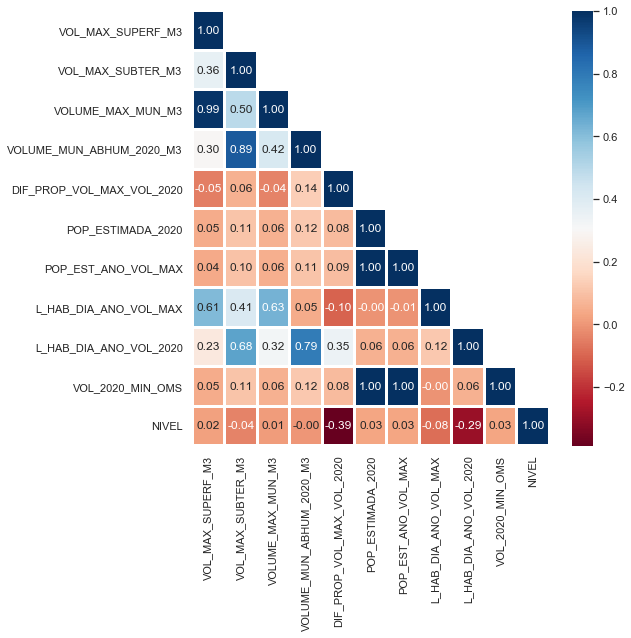

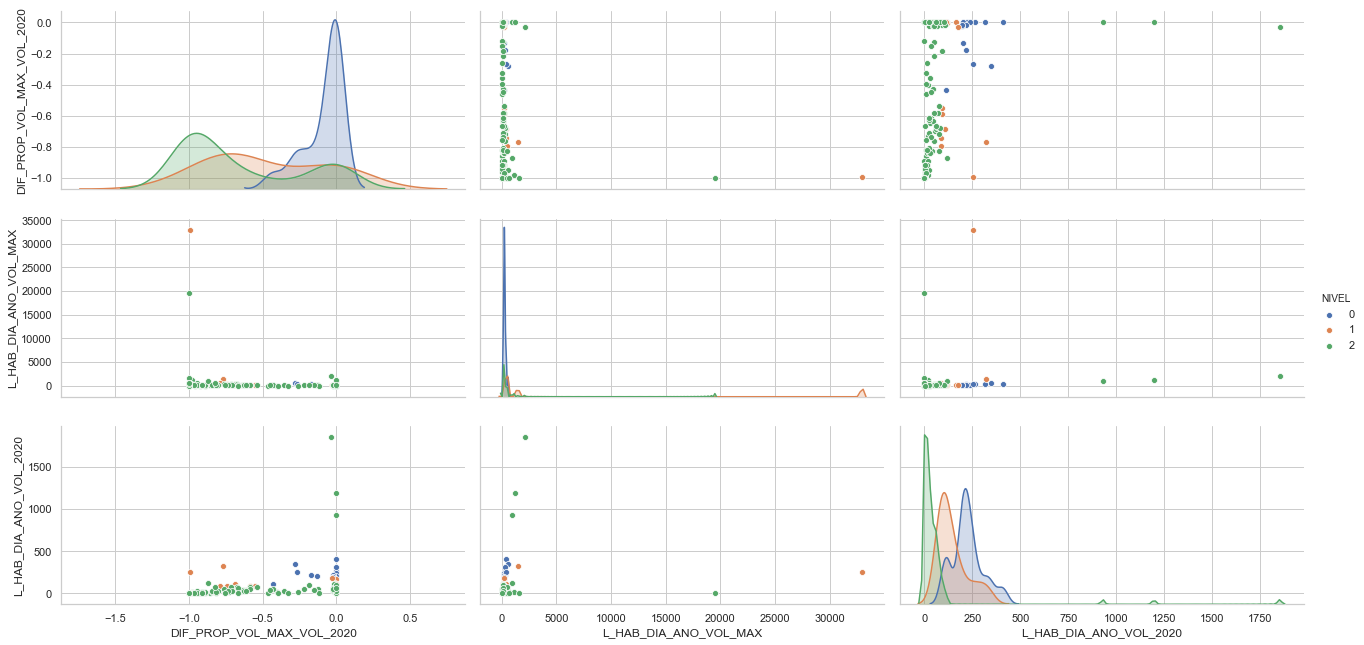

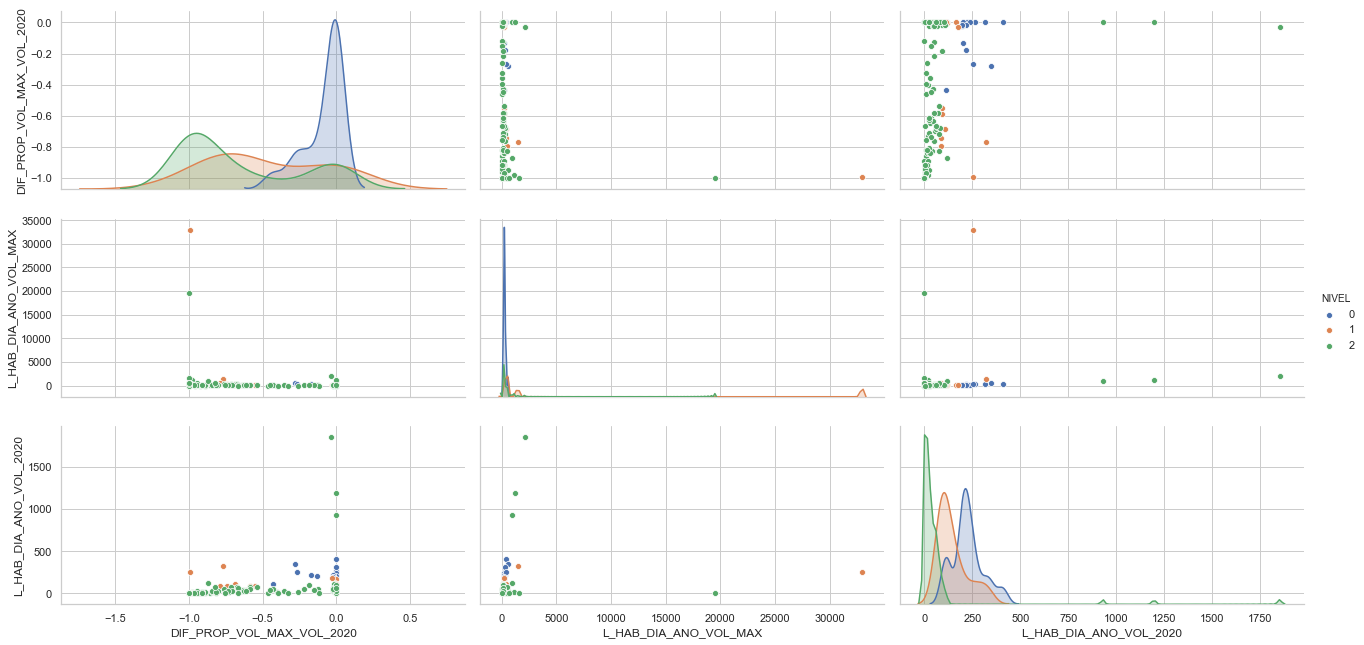

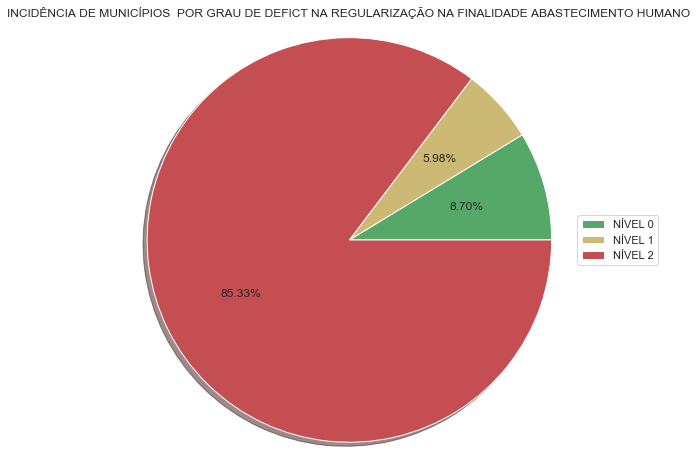

AB_HUM_MODEL_TREE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   VOL_MAX_SUPERF_M3          184 non-null    float32
 1   VOL_MAX_SUBTER_M3          184 non-null    float32
 2   VOLUME_MAX_MUN_M3          184 non-null    float32
 3   VOLUME_MUN_ABHUM_2020_M3   184 non-null    float32
 4   DIF_PROP_VOL_MAX_VOL_2020  184 non-null    float32
 5   POP_ESTIMADA_2020          184 non-null    int32  
 6   POP_EST_ANO_VOL_MAX        184 non-null    int32  
 7   L_HAB_DIA_ANO_VOL_MAX      184 non-null    float32
 8   L_HAB_DIA_ANO_VOL_2020     184 non-null    float32
 9   VOL_2020_MIN_OMS           184 non-null    float32
 10  NIVEL                      184 non-null    int32  
dtypes: float32(8), int32(3)
memory usage: 8.0 KB
AB_HUM_TREE_COPIA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data colu

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

Classificador de árvore de decisão criado
Importância do atributo na definição do resultado da classificação

VOL_MAX_SUPERF_M3:0.0
VOL_MAX_SUBTER_M3:0.0
VOLUME_MAX_MUN_M3:0.0
VOLUME_MUN_ABHUM_2020_M3:0.08213702398349525
DIF_PROP_VOL_MAX_VOL_2020:0.1315279391497492
POP_ESTIMADA_2020:0.0
POP_EST_ANO_VOL_MAX:0.0
L_HAB_DIA_ANO_VOL_MAX:0.10214476059485947
L_HAB_DIA_ANO_VOL_2020:0.684190276271896
VOL_2020_MIN_OMS:0.0

Resultado da predição
[2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 1 2]

          Relatório de classificação 

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.25      1.00      0.40         1
           2       1.00      0.94      0.97        34

    accuracy                           0.92        37
   macro avg       0.75      0.81      0.68        37
weighted avg       0.98      0.92      0.94        37

BALANCEAMENTO DOS DADOS COM Under-Sampling (RUS)
0    10
1    10

C:\Users\55859\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\55859\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\55859\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\55859\anaconda3\lib\site-packages\sklearn\metr

BALANCEAMENTO DOS DADOS COM Over-Sampling (ADASYN)
2    123
0    122
1    119
dtype: int64

Resultado da predição
[0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0]

          Relatório de classificação 

              precision    recall  f1-score   support

           0       0.02      1.00      0.04         1
           1       0.00      0.00      0.00         4
           2       1.00      0.14      0.24        51

    accuracy                           0.14        56
   macro avg       0.34      0.38      0.09        56
weighted avg       0.91      0.14      0.22        56



C:\Users\55859\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\55859\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\55859\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dimensões dos conjuntos de treino e teste:
Entrada de divisão de treinamento:  (128, 10)
Testando entrada de divisão:  (56, 10)
Classificador de árvore de decisão criado
Importância do atributo na definição do resultado da classificação

VOL_MAX_SUPERF_M3:0.0
VOL_MAX_SUBTER_M3:0.0
VOLUME_MAX_MUN_M3:0.0
VOLUME_MUN_ABHUM_2020_M3:0.0
DIF_PROP_VOL_MAX_VOL_2020:0.1035162675980187
POP_ESTIMADA_2020:0.0
POP_EST_ANO_VOL_MAX:0.07421365415277578
L_HAB_DIA_ANO_VOL_MAX:0.20673803656844675
L_HAB_DIA_ANO_VOL_2020:0.596978628142565
VOL_2020_MIN_OMS:0.018553413538193946

Resultado da predição
[2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 1 2
 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 0]

          Relatório de classificação 

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.40      1.00      0.57         2
           2       1.00      0.96      0.98        51

    accuracy                           0.95

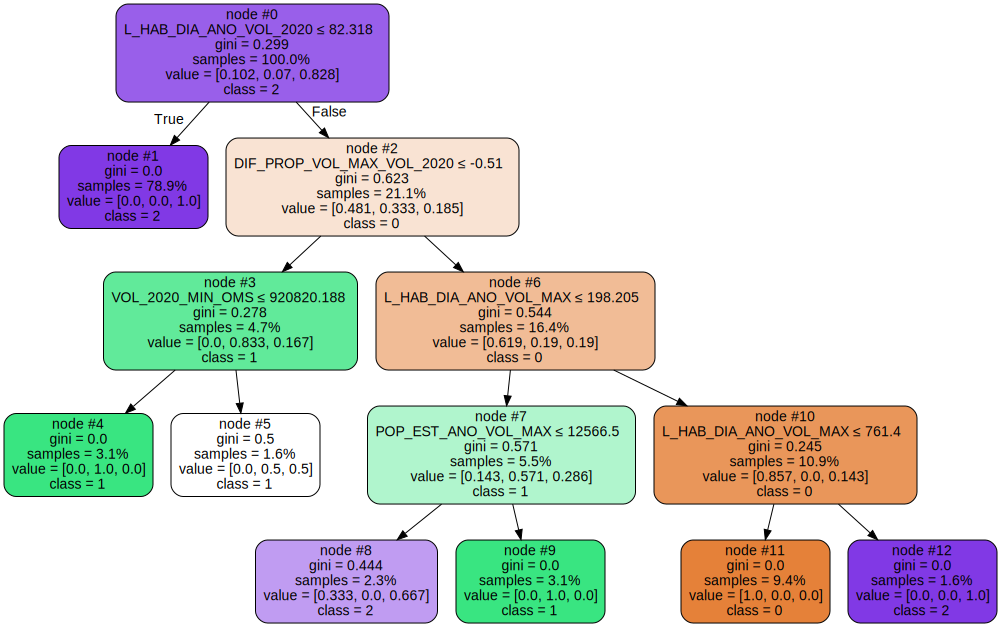

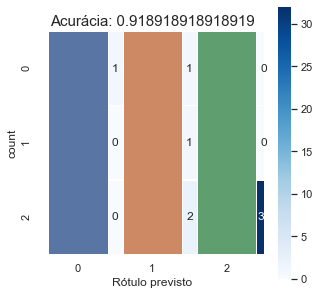

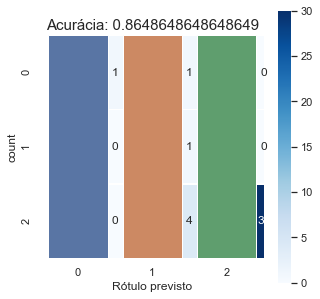

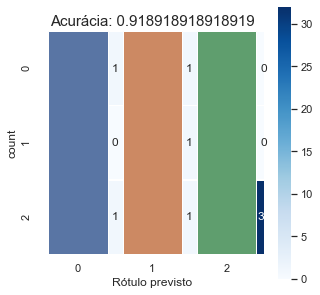

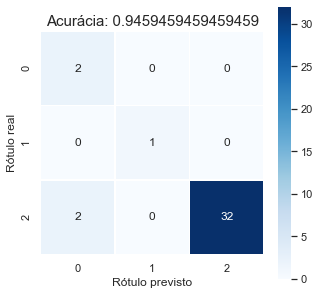

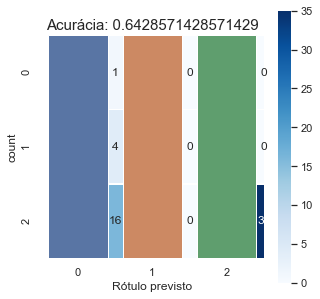

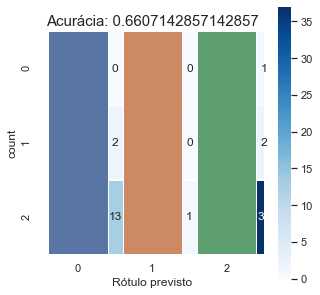

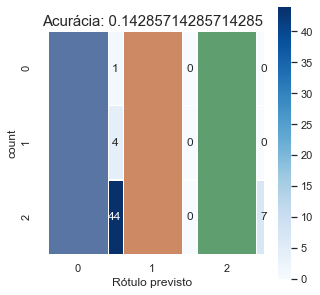

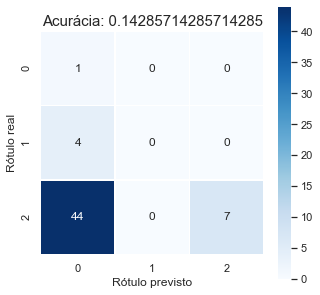

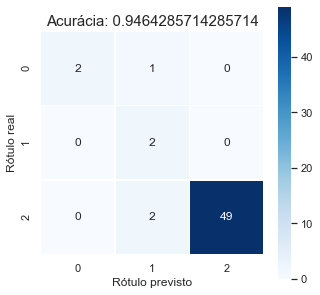

In [8]:
##########  28H

#CRIANDO UM DATAFRAME PARA USO NA ÁRVORE DE  DECISÃO COM OS DADOS LEVANTADOS NA FINALIDADE ABASTECIMENTO HUMANO
AB_HUM_MODEL_TREE = DIREITO_DE_USO_AB_HUM_MAX.copy()

#REDUZINDO OS NÍVEIS DE REGULARIZAÇÃO DA FINALIDADE ABASTECIMENTO HUMANO A 03 FAIXAS
lista_faixa_reg_ab_hum = []
faixa_ab_hum = AB_HUM_MODEL_TREE['REG_AB_HUM']
for abhum in faixa_ab_hum:
    if abhum <= 4:
        regabhum = 0
        lista_faixa_reg_ab_hum.append(regabhum)
    if abhum >= 6:
        regabhum = 2
        lista_faixa_reg_ab_hum.append(regabhum)
    if abhum > 4 and abhum < 6  :
        regabhum = 1
        lista_faixa_reg_ab_hum.append(regabhum)
AB_HUM_MODEL_TREE['NIVEL'] = lista_faixa_reg_ab_hum
 
#GERANDO NOVO ÍNDICE COM SEQUÊNCIA UNIFORME
AB_HUM_MODEL_TREE = AB_HUM_MODEL_TREE.reset_index() 

#SEPARANDO  COLUNAS QUE NÃO HÁ INTERESSE
conj_colunas_AB_HUM_MODEL_TREE=set(AB_HUM_MODEL_TREE.columns.values.tolist())#Criando uma lista com os nomes das colunas
conj_colunas_AB_HUM_MODEL_TREE_mantidas = {'DIF_PROP_VOL_MAX_VOL_2020','L_HAB_DIA_ANO_VOL_2020','L_HAB_DIA_ANO_VOL_MAX','POP_ESTIMADA_2020','POP_EST_ANO_VOL_MAX','VOLUME_MAX_MUN_M3','VOLUME_MUN_ABHUM2020_M3','VOL_2020_MIN_OMS','VOL_SUBTER_M3','VOL_SUPERF_M3','NIVEL'}# Conjunto de colunas que permanecerão
conj_colunas_remover = conj_colunas_AB_HUM_MODEL_TREE - conj_colunas_AB_HUM_MODEL_TREE_mantidas#Colunas a remover

#REMOVER COLUNAS SELECIONADAS
AB_HUM_MODEL_TREE = AB_HUM_MODEL_TREE.drop(columns=conj_colunas_remover)# Removendo as colunas  

#RENOMEAR  COLUNAS
AB_HUM_MODEL_TREE = AB_HUM_MODEL_TREE.rename(columns={'VOL_SUPERF_M3':'VOL_MAX_SUPERF_M3','VOL_SUBTER_M3':'VOL_MAX_SUBTER_M3','VOLUME_MUN_ABHUM2020_M3':'VOLUME_MUN_ABHUM_2020_M3'})

#ALTERANDO A FORMATAÇÃO DO TIPO DE COLUNA - REDUZIR A MEMÓRIA USADA
AB_HUM_MODEL_TREE.VOL_MAX_SUBTER_M3  = AB_HUM_MODEL_TREE.VOL_MAX_SUBTER_M3.astype('float32')
AB_HUM_MODEL_TREE.VOLUME_MAX_MUN_M3  = AB_HUM_MODEL_TREE.VOLUME_MAX_MUN_M3.astype('float32')
AB_HUM_MODEL_TREE.VOLUME_MUN_ABHUM_2020_M3  = AB_HUM_MODEL_TREE.VOLUME_MUN_ABHUM_2020_M3.astype('float32')
AB_HUM_MODEL_TREE.DIF_PROP_VOL_MAX_VOL_2020  = AB_HUM_MODEL_TREE.DIF_PROP_VOL_MAX_VOL_2020.astype('float32')
AB_HUM_MODEL_TREE.L_HAB_DIA_ANO_VOL_MAX  = AB_HUM_MODEL_TREE.L_HAB_DIA_ANO_VOL_MAX.astype('float32')
AB_HUM_MODEL_TREE.L_HAB_DIA_ANO_VOL_2020   = AB_HUM_MODEL_TREE.L_HAB_DIA_ANO_VOL_2020.astype('float32')
AB_HUM_MODEL_TREE.POP_ESTIMADA_2020   = AB_HUM_MODEL_TREE.POP_ESTIMADA_2020.astype('int32')
AB_HUM_MODEL_TREE.VOL_2020_MIN_OMS = AB_HUM_MODEL_TREE.VOL_2020_MIN_OMS .astype('float32')
AB_HUM_MODEL_TREE.NIVEL  = AB_HUM_MODEL_TREE.NIVEL.astype('int32')

#OBSERVANDO AS CONFIGURAÇÕES DO DATAFRAME
AB_HUM_MODEL_TREE.info()

#VERIFICANDO A PRESENÇA DE NAN
AB_HUM_MODEL_TREE.isnull().any()

# MATRIZ DE CORRELAÇÕES
def plot_corr(corr):
    # Cortaremos a metade de cima pois é o espelho da metade de baixo
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask,1)] = True
    plt.figure(figsize=(8, 8))
    sns.heatmap(corr, mask=mask, cmap='RdBu', annot = True, fmt=".2f", linewidths=2)
# Calculando a correlação
corr = AB_HUM_MODEL_TREE.corr() 
plot_corr(corr)
plt.savefig('matriz_correlation.png')
print('MATRIZ DE CORRELAÇÕES')
print('Totalmente azul     (+1) => correlação máxima')
print('Totalmente vermelho (-1) => correlação inversa')
print('Totalmente Branco   ( 0) => sem qualquer correlação')

#CHECANDO CORRELAÇÕES
corr_ab_corr_ab_hum_L3= sns.pairplot(data=AB_HUM_MODEL_TREE ,  hue = 'NIVEL',height =3, aspect =2, vars = ['DIF_PROP_VOL_MAX_VOL_2020','L_HAB_DIA_ANO_VOL_MAX', 'L_HAB_DIA_ANO_VOL_2020',])
corr_ab_corr_ab_hum_L3 # Exibe a imagem das correlações
plt.savefig('corr_ab_corr_ab_hum_L3.png') # Salva um arquivo com a imagem das correlações na pasta de trabalho
print("NIVEL DE DEFICIT NA REGULARIZAÇÃO - CORRELAÇÕES ENTRE ATRIBUTOS")

#OBSERVANDO ATRIBUTOS EM RELAÇÃO AO ATRIBUTO ALVO
corr_ab_corr_ab_hum_L3= sns.pairplot(data=AB_HUM_MODEL_TREE ,  hue = 'NIVEL',height =3, aspect =2, vars = ['DIF_PROP_VOL_MAX_VOL_2020','L_HAB_DIA_ANO_VOL_MAX', 'L_HAB_DIA_ANO_VOL_2020',])
corr_ab_corr_ab_hum_L3 # Exibe a imagem das correlações
plt.savefig('corr_ab_corr_ab_hum_L3.png') # Salva um arquivo com a imagem das correlações na pasta de trabalho
print("NÍVEL DE DEFICIT NA REGULARIZAÇÃO")

#INCIDÊNCIA DE MUNICÍPIOS  POR GRAU DE DEFICT NA REGULARIZAÇÃO NA FINALIDADE ABASTECIMENTO HUMANO
ZERO = len(AB_HUM_MODEL_TREE.NIVEL.loc[(AB_HUM_MODEL_TREE['NIVEL']) == 0])# Calcula a quantidade
UM =  len(AB_HUM_MODEL_TREE.NIVEL.loc[(AB_HUM_MODEL_TREE['NIVEL']) == 1])# Calcula a quantidade
DOIS = len(AB_HUM_MODEL_TREE.NIVEL.loc[(AB_HUM_MODEL_TREE['NIVEL']) == 2])# Calcula a quantidade
mun_nivel_faixa = [ZERO, UM, DOIS]
labelsF = ['NÍVEL 0', 'NÍVEL 1','NÍVEL 2']
fig, axF = plt.subplots(figsize=(8,8),subplot_kw=dict(aspect="equal")) #Criando área para plotar o gráfico e definindo seu tamando
coresF = ['g','y','r'] # Definindo as cores 
#explodeF = (0.1,0.1,0,1) # Define nível de separabilidade entre as partes, ordem do vetor representa as partes
plt.pie(mun_nivel_faixa,  autopct='%1.2f%%', shadow=True, colors = coresF) # Define o formato de visualização com saída em 1.2%%, sombras e a separação entre as partes
plt.legend(labelsF, loc=0)# Insere a legenda e a localização da legenda
axF.legend(labelsF,loc="center left",bbox_to_anchor=(1,0,0.5,1))# Insere a legenda e a localização da legenda
axF.set_title("INCIDÊNCIA DE MUNICÍPIOS  POR GRAU DE DEFICT NA REGULARIZAÇÃO NA FINALIDADE ABASTECIMENTO HUMANO")#Título do gráfico
plt.axis('equal')# Define que o gráfico será plotado em círculo
plt.show()

#SEPARANDO VARIÁVEIS:  ATRIBUTOS E ALVO
alvo = AB_HUM_MODEL_TREE['NIVEL'] # definindo o alvo
AB_HUM_TREE_COPIA = AB_HUM_MODEL_TREE.copy()
AB_HUM_TREE_COPIA = AB_HUM_TREE_COPIA.drop('NIVEL', axis =1)

print('AB_HUM_MODEL_TREE')
AB_HUM_MODEL_TREE.info()

print('AB_HUM_TREE_COPIA')
AB_HUM_TREE_COPIA.info()

# DEFININDO A BASE SEM RÓTULO NO ALVO NA VARIÁVEL 'X'
X = AB_HUM_TREE_COPIA # Definindo os atributos

# CODIFICANDO A VARIÁVEL 
LE = LabelEncoder()
alvo = LE.fit_transform(alvo)

#DEFININDO A VARIÁVEL 'Y' (alvo)
y = alvo

#DIVIDINDO O CONJUNTO DE DADOS EM CONJUNTOS DE TREINAMENTO E TESTE, SENDO 20% DE REGISTROS SELECIONADOS ALEATORIAMENTE COM SEMENTE 26 PARA TESTE
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 26)
print('Dimensões dos conjuntos de treino e teste:')
print("Entrada de divisão de treinamento: ", X_train.shape)
print("Testando entrada de divisão: ", X_test.shape)

#RENDERIZANDO A ÁRVORE DE FORMA INTERATIVA: 

# MATRIZ DE RECURSOS
X,y = AB_HUM_TREE_COPIA, AB_HUM_MODEL_TREE['NIVEL']

#RÓTULOS DE RECURSOS
features_label = AB_HUM_TREE_COPIA.columns

# ETIQUETA DE CLASSE
class_label = ['0','1','2']
def plot_tree(crit, split, depth, ms_split, ms_leaf=0.2):#Definindo uma função para receber os parâmetros de controle
    estimator = DecisionTreeClassifier(
           random_state = 26 
          ,criterion = crit
          ,splitter = split
          ,max_depth = depth
          ,min_samples_split=ms_split
          ,min_samples_leaf=ms_leaf
    )
    estimator.fit(X, y)
    graph = Source(export_graphviz(estimator
      , out_file=None
      , feature_names=features_label
      , class_names=class_label
      , impurity=True
      , filled = True
      , node_ids=True))
    display(SVG(graph.pipe(format='svg')))
    return estimator
inter=interactive(plot_tree 
   , crit = ["gini", "entropy"] # Métrica adotada.
   , split = ["best", "random"] # Estratégia utilizada para dividir o nó de decisão.
   , depth=[1,2,3,4,5,10,20,30] # Profundidade máxima da árvore.
   , ms_split=(2,5) # Número de amostras mínimas para considerar um nó para divisão.
   , ms_leaf=(1,5)) # Número de amostras mínimas no nível folha.
display(inter)

###  ALGORITMO ÁRVORE DE DECISÃO 

# INSTANCIANDO O CLASSIFICADOR:
dtree=DecisionTreeClassifier(criterion = 'gini' , max_depth = 5, min_samples_split= 5, min_samples_leaf= 2)

# TREINANDO O MODELO DE ARVORE DE DECISÃO:
dtree = dtree.fit(X_train,y_train)
print('Classificador de árvore de decisão criado')

#IMPORTÂNCIA DA COLUNA NA DEFINIÇÃO DO RESULTADO DA CLASSIFICAÇÃO
print ('Importância do atributo na definição do resultado da classificação')
print('')
for feature,importancia in zip(AB_HUM_TREE_COPIA.columns,dtree.feature_importances_):
    print("{}:{}".format(feature, importancia))
    
# RESULTADO DA CLASSIFICAÇÃO
y_pred = dtree.predict(X_test)
resultado = y_pred
print('')
print('Resultado da predição')
print (y_pred)
print('')
print("          Relatório de classificação ")
print('')
print(metrics.classification_report(y_test,resultado))
    
# MATRIZ DE CONFUSÃO
cm = confusion_matrix(y_test, y_pred) 
plt.figure(figsize=(5,5))
mconf = sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Rótulo real')
plt.xlabel('Rótulo previsto')
all_sample_title = 'Acurácia: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)
mconf.figure.savefig('matriz_confusao.png')

#CROSS VALIDATION 

#INSERINDO OS PARÂMETROS NO MODELO 
scores5 = cross_val_score(dtree, X, y, cv=5, scoring='accuracy')

#IMPRIMINDO
scores5

#MÉDIA DOS RESULTADOS DOS SCORES
scores5 .mean()

#INSERINDO NOVOS OS PARÂMETROS NO MODELO
scores10 = cross_val_score(dtree, X, y, cv=10, scoring='accuracy')

#IMPRIMINDO
scores10

#MÉDIA DOS RESULTADOS DOS SCORES
scores10.mean()

#BALANCEAMENTO DOS DADOS COM Under-Sampling (RUS)

print('BALANCEAMENTO DOS DADOS COM Under-Sampling (RUS)')

# BALANCEAMENTO DOS DADOS
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train) # Balanceando dados de treino

# VER O BALANCEAMENTO DAS CLASSES
print(pd.Series(y_rus).value_counts())

# PLOTAR A NOVA DISTRIBUIÇÃO DE CLASSES
sns.countplot(y_rus);

# INSTANCIANDO O CLASSIFICADOR:
model_tree_rus = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_split= 5, min_samples_leaf= 2)

# TREINANDO O MODELO DE ARVORE DE DECISÃO COM DADOS RUS
model_tree_rus.fit(X_rus, y_rus)

# RESULTADO DA CLASSIFICAÇÃO
y_pred_tree_rus = model_tree_rus.predict(X_test)

#AVALIAÇÃO DO MODELO 
print("          Relatório de classificação ")
print('')
print(metrics.classification_report(y_test,y_pred_tree_rus))

# MATRIZ DE CONFUSÃO
cm_rus = confusion_matrix(y_test, y_pred_tree_rus)
plt.figure(figsize=(5,5))
mconf_rus = sns.heatmap(data=cm_rus,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Rótulo real')
plt.xlabel('Rótulo previsto')
all_sample_title = 'Acurácia: {0}'.format(model_tree_rus.score(X_test, y_test))
plt.title(all_sample_title, size = 15)


# BALANCEAMENTO DOS DADOS COM Over-Sampling (SMOTE)

print('BALANCEAMENTO DOS DADOS COM Over-Sampling (SMOTE)')

# BALANCEAMENTO DOS DADOS
smo = SMOTE()
X_smo, y_smo = smo.fit_resample(X_train, y_train) 

# CHECAR O BALANCEAMENTO DAS CLASSES
print(pd.Series(y_smo).value_counts())

# PLOTAR A NOVA DISTRIBUIÇÃO DE CLASSES
sns.countplot(y_smo);


# INSTANCIANDO O CLASSIFICADOR:
model_tree_smo = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_split= 5, min_samples_leaf= 2)

# TREINANDO O MODELO DE ARVORE DE DECISÃO: COM DADOS SMOTE
model_tree_smo.fit(X_smo, y_smo)

# RESULTADO DA CLASSIFICAÇÃO
y_pred_tree_smo = model_tree_smo.predict(X_test)
print("          Relatório de classificação ")
print('')
print(metrics.classification_report(y_test,y_pred_tree_smo))

# MATRIZ DE CONFUSÃO
cm_smo = confusion_matrix(y_test, y_pred_tree_smo)
plt.figure(figsize=(5,5))
mconf_smo = sns.heatmap(data=cm_smo,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Rótulo real')
plt.xlabel('Rótulo previsto')
all_sample_title = 'Acurácia: {0}'.format(model_tree_smo.score(X_test, y_test))
plt.title(all_sample_title, size = 15)


#BALANCEAMENTO DOS DADOS COM Over-Sampling (ADASYN)

print('BALANCEAMENTO DOS DADOS COM Over-Sampling (ADASYN)')

# BALANCEAMENTO DOS DADOS

ada = ADASYN()
X_ada, y_ada = ada.fit_resample(X_train, y_train)

# CHECAR O BALANCEAMENTO DAS CLASSES
print(pd.Series(y_ada).value_counts())

# PLOTAR A NOVA DISTRIBUIÇÃO DE CLASSES
sns.countplot(y_ada);

# INSTANCIANDO O CLASSIFICADOR:
model_tree_ada = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, min_samples_split= 5, min_samples_leaf= 2)

# TREINANDO O MODELO DE ARVORE DE DECISÃO: COM DADOS ADASYN
model_tree_ada.fit(X_ada, y_ada)

# RESULTADO DA CLASSIFICAÇÃO
y_pred_tree_ada = model_tree_ada.predict(X_test)
print("          Relatório de classificação ")
print('')
print(metrics.classification_report(y_test,y_pred_tree_ada))

# MATRIZ DE CONFUSÃO
cm_ada = confusion_matrix(y_test, y_pred_tree_ada)
plt.figure(figsize=(5,5))
mconf_ada = sns.heatmap(data=cm_ada,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Rótulo real')
plt.xlabel('Rótulo previsto')
all_sample_title = 'Acurácia: {0}'.format(model_tree_ada.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

#CROSS VALIDATION (RUS)   

#INSERINDO OS PARÂMETROS NO MODELO
scores_tree_rus5 = cross_val_score(model_tree_rus, X, y, cv=5, scoring='accuracy')

#IMPRIMINDO
scores_tree_rus5

#MÉDIA DOS RESULTADOS DOS SCORES
scores_tree_rus5.mean()

#INSERINDO OS PARÂMETROS NO MODELO
scores_tree_rus10 = cross_val_score(model_tree_rus, X, y, cv=10, scoring='accuracy')

#IMPRIMINDO
scores_tree_rus10

#MÉDIA DOS RESULTADOS DOS SCORES
scores_tree_rus10.mean()

#CROSS VALIDATION (SMOTE)

#INSERINDO OS PARÂMETROS NO MODELO
scores_tree_smo5 = cross_val_score(model_tree_smo, X, y, cv=5, scoring='accuracy')

#IMPRIMINDO
scores_tree_smo5

#MÉDIA DOS RESULTADOS DOS SCORES
scores_tree_smo5.mean()

#INSERINDO OS PARÂMETROS NO MODELO
scores_tree_smo10 = cross_val_score(model_tree_smo, X, y, cv=10, scoring='accuracy')

#IMPRIMINDO
scores_tree_smo10 

#MÉDIA DOS RESULTADOS DOS SCORES
scores_tree_smo10 .mean()

#CROSS VALIDATION (ADASYN)

#INSERINDO OS PARÂMETROS NO MODELO
scores_tree_ada5 = cross_val_score(model_tree_ada, X, y, cv=5, scoring='accuracy')

#IMPRIMINDO
scores_tree_ada5

#MÉDIA DOS RESULTADOS DOS SCORES
scores_tree_ada5.mean()

#INSERINDO OS PARÂMETROS NO MODELO
scores_tree_ada10 = cross_val_score(model_tree_ada, X, y, cv=10, scoring='accuracy')

#IMPRIMINDO
scores_tree_ada10 

#MÉDIA DOS RESULTADOS DOS SCORES
scores_tree_ada10.mean()

# CLASSIFICAÇÃO NAIVE BAYES

# CRIAR CÓPIA DO DATAFRAME ROTULADO
AB_HUM_MODEL_bayes = AB_HUM_MODEL_TREE.copy()

# SEPARAR OS DADOS ENTRE MATRIZ RECURSOS E ALVO
Xnb = AB_HUM_MODEL_bayes.drop('NIVEL', axis=1)
ynb = AB_HUM_MODEL_bayes['NIVEL']

#DIVIDIR OS DADOS EM TREINO E TESTE
Xnb_train, Xnb_test, ynb_train, ynb_test = train_test_split(Xnb, ynb, test_size=0.3,random_state=109) 

#INSTANCIAR O CLASSIFICADOR
gnb = GaussianNB()

#TREINAR COM OS DADOS RESERVADOS PARA TREINO
gnb.fit(Xnb_train, ynb_train)
    
# RESULTADO DA CLASSIFICAÇÃO
ynb_pred_gnb = gnb.predict(Xnb_test)
#resultado = ynb_pred_gnb
print('')
print('Resultado da predição')
print (ynb_pred_gnb)
print('')
print("          Relatório de classificação ")
print('')
print(metrics.classification_report(ynb_test,ynb_pred_gnb))
    
# MATRIZ DE CONFUSÃO
cm_gnb = confusion_matrix(ynb_test, ynb_pred_gnb)
plt.figure(figsize=(5,5))
mconf_gnb = sns.heatmap(data=cm_gnb ,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Rótulo real')
plt.xlabel('Rótulo previsto')
all_sample_title = 'Acurácia: {0}'.format(gnb.score(Xnb_test, ynb_test))
plt.title(all_sample_title, size = 15)
#mconf_gnb.figure.savefig('matriz_confusao.png')

#CROSS VALIDATINON NB

#INSERINDO OS PARÂMETROS NO MODELO
scores_gnb5 = cross_val_score(gnb, Xnb, ynb, cv=5, scoring='accuracy')

#IMPRIMINDO
scores_gnb5

#MÉDIA DOS RESULTADOS DOS SCORES
scores_gnb5.mean() 

#INSERINDO OS PARÂMETROS NO MODELO
scores_gnb10 = cross_val_score(gnb, Xnb, ynb, cv=10, scoring='accuracy')

#IMPRIMINDO
scores_gnb10

#MÉDIA DOS RESULTADOS DOS SCORES
scores_gnb10.mean() 

#BALANCEAMENTO DOS DADOS COM Under-Sampling (RUS)
print('BALANCEAMENTO DOS DADOS COM Under-Sampling (RUS)')

# BALANCEAMENTO DOS DADOS
rus_nb = RandomUnderSampler()
X_rus_nb, y_rus_nb = rus_nb.fit_resample(X_train, y_train) # Balanceando dados de treino

# VER O BALANCEAMENTO DAS CLASSES
print(pd.Series(y_rus_nb).value_counts())

# PLOTAR A NOVA DISTRIBUIÇÃO DE CLASSES
sns.countplot(y_rus_nb);

#INSTANCIAR O CLASSIFICADOR
gnb_rus = GaussianNB()

#TREINAR COM OS DADOS RESERVADOS PARA TREINO
gnb_rus.fit(X_rus_nb, y_rus_nb)
  
# RESULTADO DA CLASSIFICAÇÃO
ynb_pred_gnb_rus = gnb_rus.predict(Xnb_test)
print('')
print('Resultado da predição')
print (ynb_pred_gnb_rus)
print('')
print("          Relatório de classificação ")
print('')
print(metrics.classification_report(ynb_test,ynb_pred_gnb_rus))
    
# MATRIZ DE CONFUSÃO
cm_gnb_rus = confusion_matrix(ynb_test, ynb_pred_gnb_rus)
plt.figure(figsize=(5,5))
mconf_gnb_rus= sns.heatmap(data=cm_gnb_rus ,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Rótulo real')
plt.xlabel('Rótulo previsto')
all_sample_title = 'Acurácia: {0}'.format(gnb_rus.score(Xnb_test, ynb_test))
plt.title(all_sample_title, size = 15)

# BALANCEAMENTO DOS DADOS COM Over-Sampling (SMOTE)
print('BALANCEAMENTO DOS DADOS COM Over-Sampling (SMOTE)')

# BALANCEAMENTO DOS DADOS
smo_nb = SMOTE()
X_smo_nb, y_smo_nb = smo_nb.fit_resample(X_train, y_train) 

# CHECAR O BALANCEAMENTO DAS CLASSES
print(pd.Series(y_smo_nb).value_counts())

# PLOTAR A NOVA DISTRIBUIÇÃO DE CLASSES
sns.countplot(y_smo_nb);

#INSTANCIAR O CLASSIFICADOR
gnb_smo = GaussianNB()

#TREINAR COM OS DADOS RESERVADOS PARA TREINO
gnb_smo.fit(X_smo_nb, y_smo_nb)
  
# RESULTADO DA CLASSIFICAÇÃO
ynb_pred_gnb_smo = gnb_smo.predict(Xnb_test)
print('')
print('Resultado da predição')
print (ynb_pred_gnb_smo)
print('')
print("          Relatório de classificação ")
print('')
print(metrics.classification_report(ynb_test,ynb_pred_gnb_smo))
    
# MATRIZ DE CONFUSÃO
cm_gnb_smo = confusion_matrix(ynb_test, ynb_pred_gnb_smo)
plt.figure(figsize=(5,5))
mconf_gnb_smo= sns.heatmap(data=cm_gnb_smo ,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Rótulo real')
plt.xlabel('Rótulo previsto')
all_sample_title = 'Acurácia: {0}'.format(gnb_smo.score(Xnb_test, ynb_test))
plt.title(all_sample_title, size = 15)

#BALANCEAMENTO DOS DADOS COM Over-Sampling (ADASYN)
print('BALANCEAMENTO DOS DADOS COM Over-Sampling (ADASYN)')

# BALANCEAMENTO DOS DADOS
ada_nb = ADASYN()
X_ada_nb, y_ada_nb = ada_nb.fit_resample(X_train, y_train)

# CHECAR O BALANCEAMENTO DAS CLASSES
print(pd.Series(y_ada_nb).value_counts())

# PLOTAR A NOVA DISTRIBUIÇÃO DE CLASSES
sns.countplot(y_ada_nb);

#INSTANCIAR O CLASSIFICADOR
gnb_ada = GaussianNB()

#TREINAR COM OS DADOS RESERVADOS PARA TREINO
gnb_ada.fit(X_ada_nb, y_ada_nb)

# RESULTADO DA CLASSIFICAÇÃO
ynb_pred_gnb_ada = gnb_ada.predict(Xnb_test)
#resultado = ynb_pred_gnb_ada
print('')
print('Resultado da predição')
print (ynb_pred_gnb_ada )
print('')
print("          Relatório de classificação ")
print('')
print(metrics.classification_report(ynb_test,ynb_pred_gnb_ada))
    
# MATRIZ DE CONFUSÃO
cm_gnb_ada = confusion_matrix(ynb_test, ynb_pred_gnb_ada)
plt.figure(figsize=(5,5))
mconf_gnb_ada = sns.heatmap(data=cm_gnb_ada ,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Rótulo real')
plt.xlabel('Rótulo previsto')
all_sample_title = 'Acurácia: {0}'.format(gnb_ada.score(Xnb_test, ynb_test))
plt.title(all_sample_title, size = 15)

#CROSS VALIDATINON NB RUS

#INSERINDO OS PARÂMETROS NO MODELO
scores_gnb_rus5 = cross_val_score(gnb_rus, Xnb, ynb, cv=5, scoring='accuracy')

#IMPRIMINDO
scores_gnb_rus5

#MÉDIA DOS RESULTADOS DOS SCORES
scores_gnb_rus5.mean() 

#INSERINDO OS PARÂMETROS NO MODELO
scores_gnb_rus10 = cross_val_score(gnb_rus, Xnb, ynb, cv=10, scoring='accuracy')

#IMPRIMINDO
scores_gnb_rus10

#MÉDIA DOS RESULTADOS DOS SCORES
scores_gnb_rus10.mean() 

#CROSS VALIDATINON NB SMOTE

#INSERINDO OS PARÂMETROS NO MODELO
scores_gnb_smo5 = cross_val_score(gnb_smo, Xnb, ynb, cv=5, scoring='accuracy')

#IMPRIMINDO
scores_gnb_smo5

#MÉDIA DOS RESULTADOS DOS SCORES
scores_gnb_smo5.mean() 

#INSERINDO OS PARÂMETROS NO MODELO
scores_gnb_smo10 = cross_val_score(gnb_smo, Xnb, ynb, cv=10, scoring='accuracy')

#IMPRIMINDO
scores_gnb_smo10

#MÉDIA DOS RESULTADOS DOS SCORES
scores_gnb_smo10.mean() 

#CROSS VALIDATINON NB ADANYS

#INSERINDO OS PARÂMETROS NO MODELO
scores_gnb_ada_nb5 = cross_val_score(gnb_ada, Xnb, ynb, cv=5, scoring='accuracy')

#IMPRIMINDO
scores_gnb_ada_nb5

#MÉDIA DOS RESULTADOS DOS SCORES
scores_gnb_ada_nb5.mean() 

#INSERINDO OS PARÂMETROS NO MODELO
scores_gnb_ada_nb10 = cross_val_score(gnb_ada, Xnb, ynb, cv=10, scoring='accuracy')

#IMPRIMINDO
scores_gnb_ada_nb10

#MÉDIA DOS RESULTADOS DOS SCORES
scores_gnb_ada_nb10.mean() 
#DIVIDINDO O CONJUNTO DE DADOS EM CONJUNTOS DE TREINAMENTO E TESTE, SENDO 30% DE REGISTROS SELECIONADOS ALEATORIAMENTE COM SEMENTE 26 PARA TESTE

X3 = X.copy()
y3 = y.copy()

X3_train, X3_test, y3_train, y3_test = train_test_split(X3 , y3, test_size = 0.3, random_state = 26)
print('Dimensões dos conjuntos de treino e teste:')
print("Entrada de divisão de treinamento: ", X3_train.shape)
print("Testando entrada de divisão: ", X3_test.shape)

###  ALGORITMO ÁRVORE DE DECISÃO 

# INSTANCIANDO O CLASSIFICADOR:
dtree3=DecisionTreeClassifier(criterion = 'gini' , max_depth = 5, min_samples_split= 5, min_samples_leaf= 2)

# TREINANDO O MODELO DE ÁRVORE DE DECISÃO:
dtree3 = dtree3.fit(X3_train,y3_train)
print('Classificador de árvore de decisão criado')

#IMPORTÂNCIA DA COLUNA NA DEFINIÇÃO DO RESULTADO DA CLASSIFICAÇÃO
print ('Importância do atributo na definição do resultado da classificação')
print('')
for feature,importancia in zip(AB_HUM_TREE_COPIA.columns,dtree3.feature_importances_):
    print("{}:{}".format(feature, importancia))
    
# RESULTADO DA CLASSIFICAÇÃO
y3_pred = dtree3.predict(X3_test)
resultado = y3_pred
print('')
print('Resultado da predição')
print (y3_pred)
print('')
print("          Relatório de classificação ")
print('')
print(metrics.classification_report(y3_test,resultado))
    
# MATRIZ DE CONFUSÃO
cm3 = confusion_matrix(y3_test, y3_pred) 
plt.figure(figsize=(5,5))
mconf3 = sns.heatmap(data=cm3,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Rótulo real')
plt.xlabel('Rótulo previsto')
all_sample_title = 'Acurácia: {0}'.format(dtree3.score(X3_test, y3_test))
plt.title(all_sample_title, size = 15)
#mconf.figure.savefig('matriz_confusao.png')


# RENDERIZANDO A ÁRVORE DE FORMA GRÁFICA
dot_data = export_graphviz(
            dtree3,
            out_file=None,
            feature_names=X3.columns,
            class_names=['0','1','2'],
            filled=True, rounded=True,
            proportion=True,
            node_ids=True,
            rotate=False,
            label='all',
            special_characters=True
            )
graph = graphviz.Source(dot_data)
graph




In [7]:
##########  30

#CRIANDO UM DATAFRAME PARA USO NO POWER BI_ESTAGIOS COM OS DADOS LEVANTADOS NA FINALIDADE ABASTECIMENTO HUMANO
AB_HUM_PWBI_ESTAGIOS = DIREITO_DE_USO_AB_HUM_MAX.copy()

#REDUZINDO OS NÍVEIS DE REGULARIZAÇÃO DA FINALIDADE ABASTECIMENTO HUMANO A 03 FAIXAS
lista_faixa_reg_ab_hum = []
faixa_ab_hum = AB_HUM_PWBI_ESTAGIOS['REG_AB_HUM']
for abhum in faixa_ab_hum:
    if abhum <= 4:
        regabhum = 'TERCEO'
        lista_faixa_reg_ab_hum.append(regabhum)
    if abhum >= 6:
        regabhum = 'PRIMEIRO'
        lista_faixa_reg_ab_hum.append(regabhum)
    if abhum > 4 and abhum < 6  :
        regabhum = 'SEGUNDO'
        lista_faixa_reg_ab_hum.append(regabhum)
AB_HUM_PWBI_ESTAGIOS['NIVEL'] = lista_faixa_reg_ab_hum
 
#GERANDO NOVO ÍNDICE COM SEQUÊNCIA UNIFORME
AB_HUM_PWBI_ESTAGIOS = AB_HUM_PWBI_ESTAGIOS.reset_index() 

#SEPARANDO  COLUNAS QUE NÃO HÁ INTERESSE
conj_colunas_AB_HUM_PWBI_ESTAGIOS=set(AB_HUM_PWBI_ESTAGIOS.columns.values.tolist())#Criando uma lista com os nomes das colunas
conj_colunas_AB_HUM_PWBI_ESTAGIOS_mantidas = {'Nome Município','MUNICIPIO', 'CD_IBGE','DIF_PROP_VOL_MAX_VOL_2020','L_HAB_DIA_ANO_VOL_2020','L_HAB_DIA_ANO_VOL_MAX','POP_ESTIMADA_2020','POP_EST_ANO_VOL_MAX','VOLUME_MAX_MUN_M3','VOLUME_MUN_ABHUM2020_M3','VOL_2020_MIN_OMS','VOL_SUBTER_M3','VOL_SUPERF_M3','NIVEL'}# Conjunto de colunas que permanecerão
conj_colunas_remover = conj_colunas_AB_HUM_PWBI_ESTAGIOS - conj_colunas_AB_HUM_PWBI_ESTAGIOS_mantidas#Colunas a remover

#REMOVER COLUNAS SELECIONADAS
AB_HUM_PWBI_ESTAGIOS = AB_HUM_PWBI_ESTAGIOS.drop(columns=conj_colunas_remover)# Removendo as colunas  

#RENOMEAR  COLUNAS
AB_HUM_PWBI_ESTAGIOS = AB_HUM_PWBI_ESTAGIOS.rename(columns={'VOL_SUPERF_M3':'VOL_MAX_SUPERF_M3','VOL_SUBTER_M3':'VOL_MAX_SUBTER_M3','VOLUME_MUN_ABHUM2020_M3':'VOLUME_MUN_ABHUM_2020_M3'})

#ALTERANDO A FORMATAÇÃO DO TIPO DE COLUNA - REDUZIR A MEMÓRIA USADA
AB_HUM_PWBI_ESTAGIOS.VOL_MAX_SUBTER_M3  = AB_HUM_PWBI_ESTAGIOS.VOL_MAX_SUBTER_M3.astype('float32')
AB_HUM_PWBI_ESTAGIOS.VOLUME_MAX_MUN_M3  = AB_HUM_PWBI_ESTAGIOS.VOLUME_MAX_MUN_M3.astype('float32')
AB_HUM_PWBI_ESTAGIOS.VOLUME_MUN_ABHUM_2020_M3  = AB_HUM_PWBI_ESTAGIOS.VOLUME_MUN_ABHUM_2020_M3.astype('float32')
AB_HUM_PWBI_ESTAGIOS.DIF_PROP_VOL_MAX_VOL_2020  = AB_HUM_PWBI_ESTAGIOS.DIF_PROP_VOL_MAX_VOL_2020.astype('float32')
AB_HUM_PWBI_ESTAGIOS.L_HAB_DIA_ANO_VOL_MAX  = AB_HUM_PWBI_ESTAGIOS.L_HAB_DIA_ANO_VOL_MAX.astype('float32')
AB_HUM_PWBI_ESTAGIOS.L_HAB_DIA_ANO_VOL_2020   = AB_HUM_PWBI_ESTAGIOS.L_HAB_DIA_ANO_VOL_2020.astype('float32')
AB_HUM_PWBI_ESTAGIOS.POP_ESTIMADA_2020   = AB_HUM_PWBI_ESTAGIOS.POP_ESTIMADA_2020.astype('int32')
AB_HUM_PWBI_ESTAGIOS.VOL_2020_MIN_OMS = AB_HUM_PWBI_ESTAGIOS.VOL_2020_MIN_OMS .astype('float32')
AB_HUM_PWBI_ESTAGIOS.NIVEL  = AB_HUM_PWBI_ESTAGIOS.NIVEL.astype('str')

#AB_HUM_PWBI_ESTAGIOS.to_excel('AB_HUM_PWBI_ESTAGIOS.xlsx',encoding='utf-8',index=F